## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN'])
            
# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
0,6.824,9.240,1912,784,-0.731,2.576,2.33,0.445070,13,35.145074,360.273487,0.488754,0.072792
1,8.189,9.622,2005,818,0.585,2.915,2.47,12.465903,24,36.135511,323.958625,0.501683,0.098347
2,8.380,9.589,2001,818,0.779,2.882,2.44,13.028298,18,35.938764,299.438354,0.540056,0.187811
3,8.137,9.449,2040,833,0.517,2.724,2.55,2.128231,15,35.908361,319.773395,0.480991,0.020686
4,7.696,9.401,1758,717,0.224,2.826,2.14,12.171553,8,38.062522,353.104284,0.505257,0.106549


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.6 KB


In [7]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [8]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.252563,2.464709,3.570291,3.368496,11.378641,35.164575,327.115078,0.393571,0.073579
std,1.64946,1.472424,4988.505540,2019.773384,1.104610,0.904675,6.089170,4.845054,9.139568,5.338700,167.617957,0.151801,0.056017
min,3.52600,6.075000,423.000000,98.000000,-3.033000,0.391000,0.480000,-0.018586,2.000000,20.570709,0.091058,0.033797,-0.062450
25%,6.31900,7.664000,635.500000,199.500000,-0.727500,1.803000,0.710000,0.482279,5.000000,31.746440,283.887328,0.407228,0.027204
50%,6.95700,8.472000,1145.000000,362.000000,-0.025000,2.603000,1.290000,0.642883,8.000000,36.135511,353.034542,0.449670,0.063714
75%,7.91350,9.421000,2423.500000,966.000000,0.516500,3.159000,2.960000,3.921804,15.000000,39.139044,448.017711,0.476635,0.110983
max,11.36700,13.864000,25173.000000,10477.000000,1.652000,4.659000,36.590000,17.862923,56.000000,45.825416,652.546648,0.555648,0.241284


# Selecting working columns for the XGBoost algorithms

In [9]:
# Choosing the predictor and independent variables
predictor = "ln_Tag_Cs"
indep_variables = ['mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN']


In [10]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  \
0         6.824       9.240           1912            784     -0.731   
1         8.189       9.622           2005            818      0.585   
2         8.380       9.589           2001            818      0.779   
3         8.137       9.449           2040            833      0.517   
4         7.696       9.401           1758            717      0.224   
..          ...         ...            ...            ...        ...   
98        8.071       8.434           2548           1012      0.228   
99        7.993      10.042           2267            908      0.266   
100       8.343      10.488           2441            975      0.543   
101       3.638       6.399            632            269     -2.811   
102       4.787       6.877            676            292     -1.728   

     ln_Tag_Sr  AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  \
0        2.576       2.33    0.445070     13  35.145074   360.2

In [11]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [12]:
# Columns in "X" data collections
X.head()

,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
0,0.445070,13,35.145074,360.273487,0.488754,0.072792
1,12.465903,24,36.135511,323.958625,0.501683,0.098347
2,13.028298,18,35.938764,299.438354,0.540056,0.187811
3,2.128231,15,35.908361,319.773395,0.480991,0.020686
4,12.171553,8,38.062522,353.104284,0.505257,0.106549


In [13]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.731
1,0.585
2,0.779
3,0.517
4,0.224


# Create first XGBoost model for estimate varibiality of output stats

In [14]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [15]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [16]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [17]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.2166857358270522, -0.39447988134829814, -0.31581978759690577]
    Mean: -0.165
    Std: 0.271

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.16973307 1.22210588 1.08042537]
    Mean: 1.157
    Std: 0.058

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8217066048439059, 0.9531262737784315, 0.8242042799609548]
    Mean: 0.866
    Std: 0.061

 --------------------


# Add optimal hyperparameters for XGBoost model

In [18]:
# Hyperparameters data for the next step/stage
p1 = 0.6121347432766997                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.14283253781452027                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.02424561467798947                  # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 59           # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.49943035086288745                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6121347432766997
Gamma: 0.14283253781452027
Learning_rate: 0.02424561467798947
Max_depth: 3
N_estimators: 59
Subsample: 0.49943035086288745


# Estimation of predictive quality to basic XGBoost models using Loops

In [19]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.31382	validation_1-rmse:1.33315
[1]	validation_0-rmse:1.29904	validation_1-rmse:1.32504
[2]	validation_0-rmse:1.28285	validation_1-rmse:1.31226
[3]	validation_0-rmse:1.26897	validation_1-rmse:1.30919
[4]	validation_0-rmse:1.25717	validation_1-rmse:1.29554


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.24662	validation_1-rmse:1.28323
[6]	validation_0-rmse:1.23293	validation_1-rmse:1.26643
[7]	validation_0-rmse:1.22128	validation_1-rmse:1.25339
[8]	validation_0-rmse:1.20914	validation_1-rmse:1.24361
[9]	validation_0-rmse:1.19716	validation_1-rmse:1.23267
[10]	validation_0-rmse:1.18302	validation_1-rmse:1.21943
[11]	validation_0-rmse:1.17090	validation_1-rmse:1.20925
[12]	validation_0-rmse:1.16079	validation_1-rmse:1.20635
[13]	validation_0-rmse:1.15051	validation_1-rmse:1.19617
[14]	validation_0-rmse:1.13891	validation_1-rmse:1.18439
[15]	validation_0-rmse:1.13047	validation_1-rmse:1.17999
[16]	validation_0-rmse:1.11554	validation_1-rmse:1.16492
[17]	validation_0-rmse:1.10715	validation_1-rmse:1.15401
[18]	validation_0-rmse:1.09775	validation_1-rmse:1.14346
[19]	validation_0-rmse:1.08973	validation_1-rmse:1.13268
[20]	validation_0-rmse:1.07747	validation_1-rmse:1.12628
[21]	validation_0-rmse:1.06356	validation_1-rmse:1.11123
[22]	validation_0-rmse:1.05207	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36093	validation_1-rmse:1.11418
[1]	validation_0-rmse:1.34228	validation_1-rmse:1.10034


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32331	validation_1-rmse:1.09109
[3]	validation_0-rmse:1.30553	validation_1-rmse:1.09194
[4]	validation_0-rmse:1.29003	validation_1-rmse:1.08269
[5]	validation_0-rmse:1.27447	validation_1-rmse:1.07596
[6]	validation_0-rmse:1.25793	validation_1-rmse:1.07395
[7]	validation_0-rmse:1.23822	validation_1-rmse:1.07182
[8]	validation_0-rmse:1.22353	validation_1-rmse:1.07087
[9]	validation_0-rmse:1.21169	validation_1-rmse:1.06557
[10]	validation_0-rmse:1.20047	validation_1-rmse:1.06247
[11]	validation_0-rmse:1.18631	validation_1-rmse:1.05928
[12]	validation_0-rmse:1.16856	validation_1-rmse:1.05867
[13]	validation_0-rmse:1.15450	validation_1-rmse:1.05394
[14]	validation_0-rmse:1.14119	validation_1-rmse:1.05482
[15]	validation_0-rmse:1.13020	validation_1-rmse:1.05309
[16]	validation_0-rmse:1.11640	validation_1-rmse:1.04246
[17]	validation_0-rmse:1.10459	validation_1-rmse:1.03486
[18]	validation_0-rmse:1.08928	validation_1-rmse:1.03196
[19]	validation_0-rmse:1.07684	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30635	validation_1-rmse:1.35764
[1]	validation_0-rmse:1.28924	validation_1-rmse:1.35004
[2]	validation_0-rmse:1.27194	validation_1-rmse:1.33934
[3]	validation_0-rmse:1.25664	validation_1-rmse:1.32871
[4]	validation_0-rmse:1.24863	validation_1-rmse:1.32104
[5]	validation_0-rmse:1.23126	validation_1-rmse:1.31198
[6]	validation_0-rmse:1.22175	validation_1-rmse:1.30291


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.21122	validation_1-rmse:1.29560
[8]	validation_0-rmse:1.19641	validation_1-rmse:1.28615
[9]	validation_0-rmse:1.18265	validation_1-rmse:1.27859
[10]	validation_0-rmse:1.17121	validation_1-rmse:1.26629
[11]	validation_0-rmse:1.15370	validation_1-rmse:1.26009
[12]	validation_0-rmse:1.14007	validation_1-rmse:1.24929
[13]	validation_0-rmse:1.12782	validation_1-rmse:1.24140
[14]	validation_0-rmse:1.11602	validation_1-rmse:1.22784
[15]	validation_0-rmse:1.10582	validation_1-rmse:1.22213
[16]	validation_0-rmse:1.09159	validation_1-rmse:1.21273
[17]	validation_0-rmse:1.07991	validation_1-rmse:1.20639
[18]	validation_0-rmse:1.07457	validation_1-rmse:1.20163
[19]	validation_0-rmse:1.06407	validation_1-rmse:1.19636
[20]	validation_0-rmse:1.05277	validation_1-rmse:1.19170
[21]	validation_0-rmse:1.04007	validation_1-rmse:1.18390
[22]	validation_0-rmse:1.03120	validation_1-rmse:1.17480
[23]	validation_0-rmse:1.02138	validation_1-rmse:1.17020
[24]	validation_0-rmse:1.01438	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31330	validation_1-rmse:1.32264
[1]	validation_0-rmse:1.29391	validation_1-rmse:1.30831
[2]	validation_0-rmse:1.27836	validation_1-rmse:1.30678
[3]	validation_0-rmse:1.26043	validation_1-rmse:1.29788
[4]	validation_0-rmse:1.24444	validation_1-rmse:1.28754
[5]	validation_0-rmse:1.22690	validation_1-rmse:1.27497


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.21361	validation_1-rmse:1.25895
[7]	validation_0-rmse:1.20003	validation_1-rmse:1.24819
[8]	validation_0-rmse:1.18417	validation_1-rmse:1.23886
[9]	validation_0-rmse:1.17384	validation_1-rmse:1.23260
[10]	validation_0-rmse:1.16799	validation_1-rmse:1.22895
[11]	validation_0-rmse:1.15409	validation_1-rmse:1.22305
[12]	validation_0-rmse:1.14095	validation_1-rmse:1.21159
[13]	validation_0-rmse:1.12537	validation_1-rmse:1.20517
[14]	validation_0-rmse:1.11260	validation_1-rmse:1.19729
[15]	validation_0-rmse:1.09933	validation_1-rmse:1.18514
[16]	validation_0-rmse:1.08936	validation_1-rmse:1.18613
[17]	validation_0-rmse:1.07595	validation_1-rmse:1.17479
[18]	validation_0-rmse:1.06407	validation_1-rmse:1.16496
[19]	validation_0-rmse:1.05165	validation_1-rmse:1.15274
[20]	validation_0-rmse:1.03908	validation_1-rmse:1.14786
[21]	validation_0-rmse:1.02658	validation_1-rmse:1.14378
[22]	validation_0-rmse:1.01544	validation_1-rmse:1.13726
[23]	validation_0-rmse:1.00896	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27950	validation_1-rmse:1.45716
[1]	validation_0-rmse:1.26495	validation_1-rmse:1.43767
[2]	validation_0-rmse:1.24771	validation_1-rmse:1.41726
[3]	validation_0-rmse:1.23494	validation_1-rmse:1.40792
[4]	validation_0-rmse:1.21819	validation_1-rmse:1.38904


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.20029	validation_1-rmse:1.36721
[6]	validation_0-rmse:1.18458	validation_1-rmse:1.35534
[7]	validation_0-rmse:1.17421	validation_1-rmse:1.34503
[8]	validation_0-rmse:1.16281	validation_1-rmse:1.33576
[9]	validation_0-rmse:1.15063	validation_1-rmse:1.32065
[10]	validation_0-rmse:1.13856	validation_1-rmse:1.30941
[11]	validation_0-rmse:1.12616	validation_1-rmse:1.30306
[12]	validation_0-rmse:1.11099	validation_1-rmse:1.28930
[13]	validation_0-rmse:1.09718	validation_1-rmse:1.27450
[14]	validation_0-rmse:1.08568	validation_1-rmse:1.25959
[15]	validation_0-rmse:1.07412	validation_1-rmse:1.25215
[16]	validation_0-rmse:1.06545	validation_1-rmse:1.24541
[17]	validation_0-rmse:1.05668	validation_1-rmse:1.23167
[18]	validation_0-rmse:1.04486	validation_1-rmse:1.21897
[19]	validation_0-rmse:1.03068	validation_1-rmse:1.20624
[20]	validation_0-rmse:1.02182	validation_1-rmse:1.19508
[21]	validation_0-rmse:1.01227	validation_1-rmse:1.18053
[22]	validation_0-rmse:1.00318	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34879	validation_1-rmse:1.14946


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33110	validation_1-rmse:1.13688
[2]	validation_0-rmse:1.31691	validation_1-rmse:1.13307
[3]	validation_0-rmse:1.29516	validation_1-rmse:1.12618
[4]	validation_0-rmse:1.28226	validation_1-rmse:1.11620
[5]	validation_0-rmse:1.26619	validation_1-rmse:1.10852
[6]	validation_0-rmse:1.25568	validation_1-rmse:1.10050
[7]	validation_0-rmse:1.24125	validation_1-rmse:1.09575
[8]	validation_0-rmse:1.22323	validation_1-rmse:1.09093
[9]	validation_0-rmse:1.21607	validation_1-rmse:1.08028
[10]	validation_0-rmse:1.20044	validation_1-rmse:1.07223
[11]	validation_0-rmse:1.18406	validation_1-rmse:1.05683
[12]	validation_0-rmse:1.17144	validation_1-rmse:1.05387
[13]	validation_0-rmse:1.15994	validation_1-rmse:1.04975
[14]	validation_0-rmse:1.14791	validation_1-rmse:1.04637
[15]	validation_0-rmse:1.13208	validation_1-rmse:1.04060
[16]	validation_0-rmse:1.12338	validation_1-rmse:1.03137
[17]	validation_0-rmse:1.10956	validation_1-rmse:1.02545
[18]	validation_0-rmse:1.10081	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.24966	validation_1-rmse:1.54753
[1]	validation_0-rmse:1.23375	validation_1-rmse:1.53370
[2]	validation_0-rmse:1.21555	validation_1-rmse:1.52777
[3]	validation_0-rmse:1.20011	validation_1-rmse:1.51732
[4]	validation_0-rmse:1.18199	validation_1-rmse:1.50184
[5]	validation_0-rmse:1.16816	validation_1-rmse:1.49345
[6]	validation_0-rmse:1.15475	validation_1-rmse:1.48759
[7]	validation_0-rmse:1.14428	validation_1-rmse:1.48319
[8]	validation_0-rmse:1.13062	validation_1-rmse:1.47715
[9]	validation_0-rmse:1.11660	validation_1-rmse:1.46978
[10]	validation_0-rmse:1.10647	validation_1-rmse:1.46644
[11]	validation_0-rmse:1.09608	validation_1-rmse:1.45448
[12]	validation_0-rmse:1.08141	validation_1-rmse:1.43792
[13]	validation_0-rmse:1.06996	validation_1-rmse:1.43003
[14]	validation_0-rmse:1.05522	validation_1-rmse:1.42597
[15]	validation_0-rmse:1.04763	validation_1-rmse:1.42710
[16]	validation_0-rmse:1.03219	validation_1-rmse:1.41781
[17]	validation_0-rmse:1.02057	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.26343	validation_1-rmse:1.50707
[1]	validation_0-rmse:1.24934	validation_1-rmse:1.49088
[2]	validation_0-rmse:1.23722	validation_1-rmse:1.47648
[3]	validation_0-rmse:1.22531	validation_1-rmse:1.46303
[4]	validation_0-rmse:1.21244	validation_1-rmse:1.45299
[5]	validation_0-rmse:1.19652	validation_1-rmse:1.44007
[6]	validation_0-rmse:1.18193	validation_1-rmse:1.42417
[7]	validation_0-rmse:1.17070	validation_1-rmse:1.41348
[8]	validation_0-rmse:1.15744	validation_1-rmse:1.40113
[9]	validation_0-rmse:1.14755	validation_1-rmse:1.38924
[10]	validation_0-rmse:1.13830	validation_1-rmse:1.38037
[11]	validation_0-rmse:1.12602	validation_1-rmse:1.36792
[12]	validation_0-rmse:1.11297	validation_1-rmse:1.35467
[13]	validation_0-rmse:1.09979	validation_1-rmse:1.34877
[14]	validation_0-rmse:1.08458	validation_1-rmse:1.33520
[15]	validation_0-rmse:1.07223	validation_1-rmse:1.32381
[16]	validation_0-rmse:1.06331	validation_1-rmse:1.31376
[17]	validation_0-rmse:1.05312	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.35492	validation_1-rmse:1.14747
[1]	validation_0-rmse:1.33789	validation_1-rmse:1.13579
[2]	validation_0-rmse:1.32217	validation_1-rmse:1.13508
[3]	validation_0-rmse:1.30631	validation_1-rmse:1.12065
[4]	validation_0-rmse:1.28668	validation_1-rmse:1.10195
[5]	validation_0-rmse:1.27603	validation_1-rmse:1.09516
[6]	validation_0-rmse:1.26158	validation_1-rmse:1.08764
[7]	validation_0-rmse:1.25056	validation_1-rmse:1.08727
[8]	validation_0-rmse:1.23839	validation_1-rmse:1.07742
[9]	validation_0-rmse:1.22338	validation_1-rmse:1.06903
[10]	validation_0-rmse:1.20688	validation_1-rmse:1.05675
[11]	validation_0-rmse:1.19399	validation_1-rmse:1.05032
[12]	validation_0-rmse:1.17831	validation_1-rmse:1.03938
[13]	validation_0-rmse:1.16770	validation_1-rmse:1.03203
[14]	validation_0-rmse:1.15156	validation_1-rmse:1.02128
[15]	validation_0-rmse:1.14065	validation_1-rmse:1.01235
[16]	validation_0-rmse:1.12937	validation_1-rmse:1.00528
[17]	validation_0-rmse:1.11752	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.25043	validation_1-rmse:1.55552
[1]	validation_0-rmse:1.23988	validation_1-rmse:1.54664
[2]	validation_0-rmse:1.22852	validation_1-rmse:1.53366
[3]	validation_0-rmse:1.21220	validation_1-rmse:1.53100
[4]	validation_0-rmse:1.19753	validation_1-rmse:1.51796
[5]	validation_0-rmse:1.18361	validation_1-rmse:1.50750
[6]	validation_0-rmse:1.16916	validation_1-rmse:1.49314
[7]	validation_0-rmse:1.15608	validation_1-rmse:1.47958
[8]	validation_0-rmse:1.14960	validation_1-rmse:1.47539
[9]	validation_0-rmse:1.14276	validation_1-rmse:1.46952
[10]	validation_0-rmse:1.13054	validation_1-rmse:1.45724
[11]	validation_0-rmse:1.11779	validation_1-rmse:1.44504
[12]	validation_0-rmse:1.10758	validation_1-rmse:1.43711
[13]	validation_0-rmse:1.10012	validation_1-rmse:1.43312
[14]	validation_0-rmse:1.08750	validation_1-rmse:1.42130
[15]	validation_0-rmse:1.07837	validation_1-rmse:1.41282
[16]	validation_0-rmse:1.07005	validation_1-rmse:1.40898
[17]	validation_0-rmse:1.05551	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.30002	validation_1-rmse:1.38393


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.28469	validation_1-rmse:1.37402
[2]	validation_0-rmse:1.26463	validation_1-rmse:1.35593
[3]	validation_0-rmse:1.25107	validation_1-rmse:1.34490
[4]	validation_0-rmse:1.24134	validation_1-rmse:1.33509
[5]	validation_0-rmse:1.22436	validation_1-rmse:1.31948
[6]	validation_0-rmse:1.20855	validation_1-rmse:1.30947
[7]	validation_0-rmse:1.19807	validation_1-rmse:1.30154
[8]	validation_0-rmse:1.18358	validation_1-rmse:1.28882
[9]	validation_0-rmse:1.16780	validation_1-rmse:1.27564
[10]	validation_0-rmse:1.15308	validation_1-rmse:1.26270
[11]	validation_0-rmse:1.13989	validation_1-rmse:1.25783
[12]	validation_0-rmse:1.12449	validation_1-rmse:1.25043
[13]	validation_0-rmse:1.11418	validation_1-rmse:1.24253
[14]	validation_0-rmse:1.09815	validation_1-rmse:1.23037
[15]	validation_0-rmse:1.08803	validation_1-rmse:1.21818
[16]	validation_0-rmse:1.07411	validation_1-rmse:1.20988
[17]	validation_0-rmse:1.06106	validation_1-rmse:1.20033
[18]	validation_0-rmse:1.05354	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.25392	validation_1-rmse:1.54320


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23858	validation_1-rmse:1.53126
[2]	validation_0-rmse:1.22029	validation_1-rmse:1.52249
[3]	validation_0-rmse:1.20438	validation_1-rmse:1.51120
[4]	validation_0-rmse:1.18963	validation_1-rmse:1.50722
[5]	validation_0-rmse:1.17395	validation_1-rmse:1.49870
[6]	validation_0-rmse:1.16805	validation_1-rmse:1.49134
[7]	validation_0-rmse:1.15486	validation_1-rmse:1.48261
[8]	validation_0-rmse:1.13889	validation_1-rmse:1.47463
[9]	validation_0-rmse:1.12500	validation_1-rmse:1.46610
[10]	validation_0-rmse:1.11483	validation_1-rmse:1.46268
[11]	validation_0-rmse:1.10525	validation_1-rmse:1.45722
[12]	validation_0-rmse:1.09058	validation_1-rmse:1.45276
[13]	validation_0-rmse:1.07823	validation_1-rmse:1.44445
[14]	validation_0-rmse:1.06438	validation_1-rmse:1.43324
[15]	validation_0-rmse:1.05511	validation_1-rmse:1.42613
[16]	validation_0-rmse:1.04263	validation_1-rmse:1.41876
[17]	validation_0-rmse:1.02934	validation_1-rmse:1.41085
[18]	validation_0-rmse:1.01745	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.36004	validation_1-rmse:1.11965
[1]	validation_0-rmse:1.34078	validation_1-rmse:1.10931
[2]	validation_0-rmse:1.32029	validation_1-rmse:1.10114
[3]	validation_0-rmse:1.29965	validation_1-rmse:1.08998
[4]	validation_0-rmse:1.28626	validation_1-rmse:1.09261
[5]	validation_0-rmse:1.26568	validation_1-rmse:1.08974
[6]	validation_0-rmse:1.25005	validation_1-rmse:1.08903
[7]	validation_0-rmse:1.23532	validation_1-rmse:1.08615
[8]	validation_0-rmse:1.22101	validation_1-rmse:1.08883
[9]	validation_0-rmse:1.20568	validation_1-rmse:1.08901
[10]	validation_0-rmse:1.19024	validation_1-rmse:1.08929
[11]	validation_0-rmse:1.17710	validation_1-rmse:1.08582
[12]	validation_0-rmse:1.16522	validation_1-rmse:1.08116
[13]	validation_0-rmse:1.15159	validation_1-rmse:1.07736
[14]	validation_0-rmse:1.13483	validation_1-rmse:1.07653
[15]	validation_0-rmse:1.12447	validation_1-rmse:1.07348
[16]	validation_0-rmse:1.11395	validation_1-rmse:1.06459
[17]	validation_0-rmse:1.09994	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.29251	validation_1-rmse:1.42389
[1]	validation_0-rmse:1.27763	validation_1-rmse:1.42341
[2]	validation_0-rmse:1.26705	validation_1-rmse:1.41362
[3]	validation_0-rmse:1.25524	validation_1-rmse:1.40358
[4]	validation_0-rmse:1.24051	validation_1-rmse:1.39581
[5]	validation_0-rmse:1.22665	validation_1-rmse:1.38487
[6]	validation_0-rmse:1.21503	validation_1-rmse:1.37186
[7]	validation_0-rmse:1.19672	validation_1-rmse:1.35822
[8]	validation_0-rmse:1.18095	validation_1-rmse:1.34226
[9]	validation_0-rmse:1.16649	validation_1-rmse:1.33117
[10]	validation_0-rmse:1.15238	validation_1-rmse:1.32527
[11]	validation_0-rmse:1.13770	validation_1-rmse:1.31835
[12]	validation_0-rmse:1.12202	validation_1-rmse:1.30678
[13]	validation_0-rmse:1.10860	validation_1-rmse:1.29400
[14]	validation_0-rmse:1.09534	validation_1-rmse:1.28535
[15]	validation_0-rmse:1.08572	validation_1-rmse:1.27794
[16]	validation_0-rmse:1.07100	validation_1-rmse:1.27002
[17]	validation_0-rmse:1.05785	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.34173	validation_1-rmse:1.21976
[1]	validation_0-rmse:1.32253	validation_1-rmse:1.20198
[2]	validation_0-rmse:1.30618	validation_1-rmse:1.18994
[3]	validation_0-rmse:1.29121	validation_1-rmse:1.17940
[4]	validation_0-rmse:1.27624	validation_1-rmse:1.16854
[5]	validation_0-rmse:1.25993	validation_1-rmse:1.15433
[6]	validation_0-rmse:1.24846	validation_1-rmse:1.14590
[7]	validation_0-rmse:1.23498	validation_1-rmse:1.14372
[8]	validation_0-rmse:1.21916	validation_1-rmse:1.13948
[9]	validation_0-rmse:1.20355	validation_1-rmse:1.13155
[10]	validation_0-rmse:1.18553	validation_1-rmse:1.12798
[11]	validation_0-rmse:1.17774	validation_1-rmse:1.11896
[12]	validation_0-rmse:1.15885	validation_1-rmse:1.11126
[13]	validation_0-rmse:1.14559	validation_1-rmse:1.10716
[14]	validation_0-rmse:1.13376	validation_1-rmse:1.10313
[15]	validation_0-rmse:1.12148	validation_1-rmse:1.09615
[16]	validation_0-rmse:1.11197	validation_1-rmse:1.09528
[17]	validation_0-rmse:1.09750	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37324	validation_1-rmse:1.04265


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35909	validation_1-rmse:1.03788
[2]	validation_0-rmse:1.34676	validation_1-rmse:1.02573
[3]	validation_0-rmse:1.33406	validation_1-rmse:1.02366
[4]	validation_0-rmse:1.31895	validation_1-rmse:1.01989
[5]	validation_0-rmse:1.30419	validation_1-rmse:1.01537
[6]	validation_0-rmse:1.28578	validation_1-rmse:1.00742
[7]	validation_0-rmse:1.27246	validation_1-rmse:0.99513
[8]	validation_0-rmse:1.25480	validation_1-rmse:0.98690
[9]	validation_0-rmse:1.24349	validation_1-rmse:0.98188
[10]	validation_0-rmse:1.22967	validation_1-rmse:0.97098
[11]	validation_0-rmse:1.21526	validation_1-rmse:0.96536
[12]	validation_0-rmse:1.19780	validation_1-rmse:0.95828
[13]	validation_0-rmse:1.18719	validation_1-rmse:0.94914
[14]	validation_0-rmse:1.17473	validation_1-rmse:0.94193
[15]	validation_0-rmse:1.16512	validation_1-rmse:0.93882
[16]	validation_0-rmse:1.15041	validation_1-rmse:0.93748
[17]	validation_0-rmse:1.13759	validation_1-rmse:0.93021
[18]	validation_0-rmse:1.12532	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.34155	validation_1-rmse:1.18994
[1]	validation_0-rmse:1.32489	validation_1-rmse:1.17685
[2]	validation_0-rmse:1.30891	validation_1-rmse:1.16847
[3]	validation_0-rmse:1.29423	validation_1-rmse:1.15933
[4]	validation_0-rmse:1.28151	validation_1-rmse:1.15259
[5]	validation_0-rmse:1.26944	validation_1-rmse:1.14281
[6]	validation_0-rmse:1.25265	validation_1-rmse:1.13443
[7]	validation_0-rmse:1.24155	validation_1-rmse:1.12803
[8]	validation_0-rmse:1.23010	validation_1-rmse:1.12053
[9]	validation_0-rmse:1.21860	validation_1-rmse:1.11059
[10]	validation_0-rmse:1.20961	validation_1-rmse:1.10530
[11]	validation_0-rmse:1.19488	validation_1-rmse:1.09892
[12]	validation_0-rmse:1.17935	validation_1-rmse:1.09034
[13]	validation_0-rmse:1.16843	validation_1-rmse:1.08142
[14]	validation_0-rmse:1.15615	validation_1-rmse:1.07180
[15]	validation_0-rmse:1.14200	validation_1-rmse:1.06320
[16]	validation_0-rmse:1.12911	validation_1-rmse:1.05322
[17]	validation_0-rmse:1.11780	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37151	validation_1-rmse:1.06287


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.34992	validation_1-rmse:1.05007
[2]	validation_0-rmse:1.33117	validation_1-rmse:1.03797
[3]	validation_0-rmse:1.31844	validation_1-rmse:1.02681
[4]	validation_0-rmse:1.30448	validation_1-rmse:1.01702
[5]	validation_0-rmse:1.29433	validation_1-rmse:1.00688
[6]	validation_0-rmse:1.28054	validation_1-rmse:0.99728
[7]	validation_0-rmse:1.26482	validation_1-rmse:0.98330
[8]	validation_0-rmse:1.25515	validation_1-rmse:0.97769
[9]	validation_0-rmse:1.24278	validation_1-rmse:0.97255
[10]	validation_0-rmse:1.23381	validation_1-rmse:0.96242
[11]	validation_0-rmse:1.21757	validation_1-rmse:0.95328
[12]	validation_0-rmse:1.20783	validation_1-rmse:0.94486
[13]	validation_0-rmse:1.19703	validation_1-rmse:0.93244
[14]	validation_0-rmse:1.18228	validation_1-rmse:0.92933
[15]	validation_0-rmse:1.17018	validation_1-rmse:0.92460
[16]	validation_0-rmse:1.15563	validation_1-rmse:0.91518
[17]	validation_0-rmse:1.14337	validation_1-rmse:0.90975
[18]	validation_0-rmse:1.13331	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35468	validation_1-rmse:1.14935


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33600	validation_1-rmse:1.13843
[2]	validation_0-rmse:1.32181	validation_1-rmse:1.12622
[3]	validation_0-rmse:1.30424	validation_1-rmse:1.11812
[4]	validation_0-rmse:1.29038	validation_1-rmse:1.11259
[5]	validation_0-rmse:1.27381	validation_1-rmse:1.10637
[6]	validation_0-rmse:1.25933	validation_1-rmse:1.10074
[7]	validation_0-rmse:1.24447	validation_1-rmse:1.08770
[8]	validation_0-rmse:1.23058	validation_1-rmse:1.07936
[9]	validation_0-rmse:1.22593	validation_1-rmse:1.07659
[10]	validation_0-rmse:1.21042	validation_1-rmse:1.06586
[11]	validation_0-rmse:1.20193	validation_1-rmse:1.06678
[12]	validation_0-rmse:1.18471	validation_1-rmse:1.05625
[13]	validation_0-rmse:1.17225	validation_1-rmse:1.05165
[14]	validation_0-rmse:1.15928	validation_1-rmse:1.04539
[15]	validation_0-rmse:1.14847	validation_1-rmse:1.04040
[16]	validation_0-rmse:1.13595	validation_1-rmse:1.03411
[17]	validation_0-rmse:1.12249	validation_1-rmse:1.02377
[18]	validation_0-rmse:1.11471	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.36843	validation_1-rmse:1.07960
[1]	validation_0-rmse:1.35215	validation_1-rmse:1.06825
[2]	validation_0-rmse:1.33188	validation_1-rmse:1.05433
[3]	validation_0-rmse:1.31492	validation_1-rmse:1.04080
[4]	validation_0-rmse:1.30161	validation_1-rmse:1.03551
[5]	validation_0-rmse:1.28878	validation_1-rmse:1.03290
[6]	validation_0-rmse:1.27693	validation_1-rmse:1.02470
[7]	validation_0-rmse:1.25778	validation_1-rmse:1.01897
[8]	validation_0-rmse:1.24341	validation_1-rmse:1.00857
[9]	validation_0-rmse:1.22741	validation_1-rmse:1.00496
[10]	validation_0-rmse:1.21623	validation_1-rmse:0.99978
[11]	validation_0-rmse:1.20084	validation_1-rmse:0.99666
[12]	validation_0-rmse:1.18383	validation_1-rmse:0.98399
[13]	validation_0-rmse:1.16843	validation_1-rmse:0.97450
[14]	validation_0-rmse:1.15890	validation_1-rmse:0.96668
[15]	validation_0-rmse:1.14301	validation_1-rmse:0.95818
[16]	validation_0-rmse:1.13108	validation_1-rmse:0.95547
[17]	validation_0-rmse:1.11880	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25298	validation_1-rmse:1.53243


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23389	validation_1-rmse:1.51974
[2]	validation_0-rmse:1.21917	validation_1-rmse:1.51065
[3]	validation_0-rmse:1.20662	validation_1-rmse:1.50290
[4]	validation_0-rmse:1.19091	validation_1-rmse:1.48937
[5]	validation_0-rmse:1.17511	validation_1-rmse:1.48084
[6]	validation_0-rmse:1.16400	validation_1-rmse:1.47446
[7]	validation_0-rmse:1.14919	validation_1-rmse:1.46574
[8]	validation_0-rmse:1.13689	validation_1-rmse:1.45942
[9]	validation_0-rmse:1.12336	validation_1-rmse:1.44832
[10]	validation_0-rmse:1.11159	validation_1-rmse:1.44057
[11]	validation_0-rmse:1.10467	validation_1-rmse:1.43273
[12]	validation_0-rmse:1.09218	validation_1-rmse:1.42472
[13]	validation_0-rmse:1.08018	validation_1-rmse:1.41631
[14]	validation_0-rmse:1.06984	validation_1-rmse:1.40856
[15]	validation_0-rmse:1.06547	validation_1-rmse:1.40306
[16]	validation_0-rmse:1.05020	validation_1-rmse:1.39390
[17]	validation_0-rmse:1.03685	validation_1-rmse:1.38463
[18]	validation_0-rmse:1.02550	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.44614	validation_1-rmse:0.58034


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.42741	validation_1-rmse:0.57528
[2]	validation_0-rmse:1.41101	validation_1-rmse:0.56937
[3]	validation_0-rmse:1.39681	validation_1-rmse:0.56510
[4]	validation_0-rmse:1.37984	validation_1-rmse:0.56051
[5]	validation_0-rmse:1.36327	validation_1-rmse:0.55641
[6]	validation_0-rmse:1.34561	validation_1-rmse:0.55400
[7]	validation_0-rmse:1.32439	validation_1-rmse:0.55470
[8]	validation_0-rmse:1.30565	validation_1-rmse:0.56041
[9]	validation_0-rmse:1.28743	validation_1-rmse:0.56389
[10]	validation_0-rmse:1.27573	validation_1-rmse:0.56188
[11]	validation_0-rmse:1.26879	validation_1-rmse:0.56509
[12]	validation_0-rmse:1.25319	validation_1-rmse:0.56632
[13]	validation_0-rmse:1.23425	validation_1-rmse:0.56876
[14]	validation_0-rmse:1.22022	validation_1-rmse:0.57380
[15]	validation_0-rmse:1.20897	validation_1-rmse:0.57655
[16]	validation_0-rmse:1.19145	validation_1-rmse:0.58039
[17]	validation_0-rmse:1.17717	validation_1-rmse:0.58685
[18]	validation_0-rmse:1.16481	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.24935	validation_1-rmse:1.57666


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23399	validation_1-rmse:1.56179
[2]	validation_0-rmse:1.22177	validation_1-rmse:1.55616
[3]	validation_0-rmse:1.21206	validation_1-rmse:1.55165
[4]	validation_0-rmse:1.20217	validation_1-rmse:1.54616
[5]	validation_0-rmse:1.18895	validation_1-rmse:1.53504
[6]	validation_0-rmse:1.17793	validation_1-rmse:1.52493
[7]	validation_0-rmse:1.16763	validation_1-rmse:1.51036
[8]	validation_0-rmse:1.15699	validation_1-rmse:1.49540
[9]	validation_0-rmse:1.14730	validation_1-rmse:1.48699
[10]	validation_0-rmse:1.13689	validation_1-rmse:1.47995
[11]	validation_0-rmse:1.12358	validation_1-rmse:1.46264
[12]	validation_0-rmse:1.11130	validation_1-rmse:1.44610
[13]	validation_0-rmse:1.09871	validation_1-rmse:1.43678
[14]	validation_0-rmse:1.09189	validation_1-rmse:1.43047
[15]	validation_0-rmse:1.07734	validation_1-rmse:1.41511
[16]	validation_0-rmse:1.06658	validation_1-rmse:1.40228
[17]	validation_0-rmse:1.05972	validation_1-rmse:1.39428
[18]	validation_0-rmse:1.05361	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33215	validation_1-rmse:1.23618


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31594	validation_1-rmse:1.21878
[2]	validation_0-rmse:1.30136	validation_1-rmse:1.20667
[3]	validation_0-rmse:1.28519	validation_1-rmse:1.19388
[4]	validation_0-rmse:1.27277	validation_1-rmse:1.18621
[5]	validation_0-rmse:1.25806	validation_1-rmse:1.17000
[6]	validation_0-rmse:1.25249	validation_1-rmse:1.16579
[7]	validation_0-rmse:1.23670	validation_1-rmse:1.15743
[8]	validation_0-rmse:1.22438	validation_1-rmse:1.14721
[9]	validation_0-rmse:1.21538	validation_1-rmse:1.13773
[10]	validation_0-rmse:1.20607	validation_1-rmse:1.13000
[11]	validation_0-rmse:1.19689	validation_1-rmse:1.12225
[12]	validation_0-rmse:1.18370	validation_1-rmse:1.11346
[13]	validation_0-rmse:1.17132	validation_1-rmse:1.10164
[14]	validation_0-rmse:1.16310	validation_1-rmse:1.09513
[15]	validation_0-rmse:1.15384	validation_1-rmse:1.08741
[16]	validation_0-rmse:1.14443	validation_1-rmse:1.07446
[17]	validation_0-rmse:1.13104	validation_1-rmse:1.06554
[18]	validation_0-rmse:1.11983	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.19239	validation_1-rmse:1.72685


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.18490	validation_1-rmse:1.72053
[2]	validation_0-rmse:1.16977	validation_1-rmse:1.70381
[3]	validation_0-rmse:1.16067	validation_1-rmse:1.69579
[4]	validation_0-rmse:1.15035	validation_1-rmse:1.68481
[5]	validation_0-rmse:1.13752	validation_1-rmse:1.66662
[6]	validation_0-rmse:1.12607	validation_1-rmse:1.65665
[7]	validation_0-rmse:1.11690	validation_1-rmse:1.63991
[8]	validation_0-rmse:1.10751	validation_1-rmse:1.63128
[9]	validation_0-rmse:1.09606	validation_1-rmse:1.61580
[10]	validation_0-rmse:1.08490	validation_1-rmse:1.60293
[11]	validation_0-rmse:1.07410	validation_1-rmse:1.58176
[12]	validation_0-rmse:1.06334	validation_1-rmse:1.56147
[13]	validation_0-rmse:1.05504	validation_1-rmse:1.55806
[14]	validation_0-rmse:1.04259	validation_1-rmse:1.54423
[15]	validation_0-rmse:1.03366	validation_1-rmse:1.53623
[16]	validation_0-rmse:1.02365	validation_1-rmse:1.51774
[17]	validation_0-rmse:1.01184	validation_1-rmse:1.50466
[18]	validation_0-rmse:1.00135	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30508	validation_1-rmse:1.35699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29274	validation_1-rmse:1.34523
[2]	validation_0-rmse:1.27782	validation_1-rmse:1.33012
[3]	validation_0-rmse:1.26203	validation_1-rmse:1.32059
[4]	validation_0-rmse:1.24892	validation_1-rmse:1.31036
[5]	validation_0-rmse:1.23497	validation_1-rmse:1.30142
[6]	validation_0-rmse:1.22555	validation_1-rmse:1.29739
[7]	validation_0-rmse:1.21127	validation_1-rmse:1.28025
[8]	validation_0-rmse:1.19316	validation_1-rmse:1.26998
[9]	validation_0-rmse:1.17670	validation_1-rmse:1.25902
[10]	validation_0-rmse:1.17082	validation_1-rmse:1.25339
[11]	validation_0-rmse:1.15676	validation_1-rmse:1.24020
[12]	validation_0-rmse:1.14213	validation_1-rmse:1.22447
[13]	validation_0-rmse:1.12951	validation_1-rmse:1.20909
[14]	validation_0-rmse:1.11824	validation_1-rmse:1.20637
[15]	validation_0-rmse:1.10635	validation_1-rmse:1.20021
[16]	validation_0-rmse:1.09237	validation_1-rmse:1.18416
[17]	validation_0-rmse:1.08227	validation_1-rmse:1.18411
[18]	validation_0-rmse:1.07066	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28959	validation_1-rmse:1.42828


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27902	validation_1-rmse:1.41500
[2]	validation_0-rmse:1.26377	validation_1-rmse:1.40040
[3]	validation_0-rmse:1.25054	validation_1-rmse:1.38538
[4]	validation_0-rmse:1.23563	validation_1-rmse:1.36821
[5]	validation_0-rmse:1.22410	validation_1-rmse:1.35656
[6]	validation_0-rmse:1.21129	validation_1-rmse:1.33981
[7]	validation_0-rmse:1.19836	validation_1-rmse:1.34318
[8]	validation_0-rmse:1.18298	validation_1-rmse:1.32692
[9]	validation_0-rmse:1.17176	validation_1-rmse:1.31555
[10]	validation_0-rmse:1.16153	validation_1-rmse:1.31023
[11]	validation_0-rmse:1.15225	validation_1-rmse:1.30077
[12]	validation_0-rmse:1.14517	validation_1-rmse:1.29305
[13]	validation_0-rmse:1.13343	validation_1-rmse:1.27607
[14]	validation_0-rmse:1.12291	validation_1-rmse:1.27182
[15]	validation_0-rmse:1.10903	validation_1-rmse:1.26238
[16]	validation_0-rmse:1.09473	validation_1-rmse:1.25197
[17]	validation_0-rmse:1.08151	validation_1-rmse:1.23961
[18]	validation_0-rmse:1.06855	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34720	validation_1-rmse:1.19910


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32944	validation_1-rmse:1.17948
[2]	validation_0-rmse:1.31387	validation_1-rmse:1.16324
[3]	validation_0-rmse:1.30879	validation_1-rmse:1.16087
[4]	validation_0-rmse:1.29223	validation_1-rmse:1.14383
[5]	validation_0-rmse:1.27731	validation_1-rmse:1.13033
[6]	validation_0-rmse:1.26563	validation_1-rmse:1.11831
[7]	validation_0-rmse:1.25391	validation_1-rmse:1.10413
[8]	validation_0-rmse:1.24043	validation_1-rmse:1.08647
[9]	validation_0-rmse:1.22679	validation_1-rmse:1.07484
[10]	validation_0-rmse:1.21203	validation_1-rmse:1.06016
[11]	validation_0-rmse:1.19932	validation_1-rmse:1.04427
[12]	validation_0-rmse:1.18581	validation_1-rmse:1.03042
[13]	validation_0-rmse:1.17261	validation_1-rmse:1.01761
[14]	validation_0-rmse:1.16185	validation_1-rmse:1.00389
[15]	validation_0-rmse:1.14988	validation_1-rmse:0.99156
[16]	validation_0-rmse:1.13636	validation_1-rmse:0.97937
[17]	validation_0-rmse:1.12299	validation_1-rmse:0.96942
[18]	validation_0-rmse:1.11534	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.18034	validation_1-rmse:1.75177


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.16791	validation_1-rmse:1.73821
[2]	validation_0-rmse:1.15507	validation_1-rmse:1.72341
[3]	validation_0-rmse:1.14375	validation_1-rmse:1.71938
[4]	validation_0-rmse:1.13629	validation_1-rmse:1.71560
[5]	validation_0-rmse:1.12640	validation_1-rmse:1.70137
[6]	validation_0-rmse:1.11331	validation_1-rmse:1.69262
[7]	validation_0-rmse:1.10020	validation_1-rmse:1.67379
[8]	validation_0-rmse:1.08968	validation_1-rmse:1.66501
[9]	validation_0-rmse:1.07987	validation_1-rmse:1.64835
[10]	validation_0-rmse:1.06988	validation_1-rmse:1.62983
[11]	validation_0-rmse:1.05853	validation_1-rmse:1.61525
[12]	validation_0-rmse:1.04913	validation_1-rmse:1.60541
[13]	validation_0-rmse:1.03842	validation_1-rmse:1.58961
[14]	validation_0-rmse:1.03245	validation_1-rmse:1.58414
[15]	validation_0-rmse:1.02518	validation_1-rmse:1.57801
[16]	validation_0-rmse:1.01430	validation_1-rmse:1.56617
[17]	validation_0-rmse:1.00451	validation_1-rmse:1.55509
[18]	validation_0-rmse:0.99747	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28173	validation_1-rmse:1.43389


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26621	validation_1-rmse:1.41623
[2]	validation_0-rmse:1.24932	validation_1-rmse:1.40570
[3]	validation_0-rmse:1.23589	validation_1-rmse:1.40237
[4]	validation_0-rmse:1.22255	validation_1-rmse:1.39246
[5]	validation_0-rmse:1.20767	validation_1-rmse:1.37958
[6]	validation_0-rmse:1.19590	validation_1-rmse:1.37264
[7]	validation_0-rmse:1.17871	validation_1-rmse:1.36004
[8]	validation_0-rmse:1.16246	validation_1-rmse:1.34962
[9]	validation_0-rmse:1.15293	validation_1-rmse:1.33483
[10]	validation_0-rmse:1.14392	validation_1-rmse:1.33046
[11]	validation_0-rmse:1.13584	validation_1-rmse:1.32414
[12]	validation_0-rmse:1.12276	validation_1-rmse:1.31546
[13]	validation_0-rmse:1.11110	validation_1-rmse:1.30124
[14]	validation_0-rmse:1.10058	validation_1-rmse:1.29776
[15]	validation_0-rmse:1.08570	validation_1-rmse:1.29119
[16]	validation_0-rmse:1.07349	validation_1-rmse:1.28199
[17]	validation_0-rmse:1.05938	validation_1-rmse:1.27768
[18]	validation_0-rmse:1.04990	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30330	validation_1-rmse:1.36841


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29004	validation_1-rmse:1.35252
[2]	validation_0-rmse:1.27251	validation_1-rmse:1.33660
[3]	validation_0-rmse:1.26564	validation_1-rmse:1.33150
[4]	validation_0-rmse:1.25048	validation_1-rmse:1.32055
[5]	validation_0-rmse:1.24095	validation_1-rmse:1.30684
[6]	validation_0-rmse:1.22996	validation_1-rmse:1.29634
[7]	validation_0-rmse:1.21932	validation_1-rmse:1.28401
[8]	validation_0-rmse:1.20507	validation_1-rmse:1.27628
[9]	validation_0-rmse:1.18839	validation_1-rmse:1.26295
[10]	validation_0-rmse:1.17474	validation_1-rmse:1.25231
[11]	validation_0-rmse:1.16158	validation_1-rmse:1.23926
[12]	validation_0-rmse:1.15051	validation_1-rmse:1.22717
[13]	validation_0-rmse:1.14325	validation_1-rmse:1.21972
[14]	validation_0-rmse:1.12923	validation_1-rmse:1.20297
[15]	validation_0-rmse:1.11480	validation_1-rmse:1.19067
[16]	validation_0-rmse:1.10012	validation_1-rmse:1.17800
[17]	validation_0-rmse:1.09203	validation_1-rmse:1.17274
[18]	validation_0-rmse:1.07900	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25761	validation_1-rmse:1.51497


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24274	validation_1-rmse:1.50491
[2]	validation_0-rmse:1.22833	validation_1-rmse:1.49216
[3]	validation_0-rmse:1.21794	validation_1-rmse:1.48296
[4]	validation_0-rmse:1.20114	validation_1-rmse:1.46825
[5]	validation_0-rmse:1.18563	validation_1-rmse:1.45644
[6]	validation_0-rmse:1.17172	validation_1-rmse:1.44780
[7]	validation_0-rmse:1.16064	validation_1-rmse:1.43705
[8]	validation_0-rmse:1.15147	validation_1-rmse:1.42468
[9]	validation_0-rmse:1.13919	validation_1-rmse:1.41157
[10]	validation_0-rmse:1.12307	validation_1-rmse:1.38920
[11]	validation_0-rmse:1.11245	validation_1-rmse:1.37385
[12]	validation_0-rmse:1.10224	validation_1-rmse:1.35437
[13]	validation_0-rmse:1.09051	validation_1-rmse:1.33787
[14]	validation_0-rmse:1.08006	validation_1-rmse:1.33088
[15]	validation_0-rmse:1.06793	validation_1-rmse:1.31266
[16]	validation_0-rmse:1.05574	validation_1-rmse:1.30020
[17]	validation_0-rmse:1.04994	validation_1-rmse:1.29557
[18]	validation_0-rmse:1.03793	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.38610	validation_1-rmse:0.99411


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36235	validation_1-rmse:0.98837
[2]	validation_0-rmse:1.35042	validation_1-rmse:0.98371
[3]	validation_0-rmse:1.33570	validation_1-rmse:0.98274
[4]	validation_0-rmse:1.31772	validation_1-rmse:0.97504
[5]	validation_0-rmse:1.29868	validation_1-rmse:0.97377
[6]	validation_0-rmse:1.28753	validation_1-rmse:0.96687
[7]	validation_0-rmse:1.27279	validation_1-rmse:0.96235
[8]	validation_0-rmse:1.26009	validation_1-rmse:0.96228
[9]	validation_0-rmse:1.24680	validation_1-rmse:0.95865
[10]	validation_0-rmse:1.22739	validation_1-rmse:0.95745
[11]	validation_0-rmse:1.21623	validation_1-rmse:0.95432
[12]	validation_0-rmse:1.19709	validation_1-rmse:0.95506
[13]	validation_0-rmse:1.18360	validation_1-rmse:0.95026
[14]	validation_0-rmse:1.16866	validation_1-rmse:0.95280
[15]	validation_0-rmse:1.15553	validation_1-rmse:0.94938
[16]	validation_0-rmse:1.14117	validation_1-rmse:0.94614
[17]	validation_0-rmse:1.12898	validation_1-rmse:0.94499
[18]	validation_0-rmse:1.11853	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27136	validation_1-rmse:1.48529


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25979	validation_1-rmse:1.46873
[2]	validation_0-rmse:1.24310	validation_1-rmse:1.45213
[3]	validation_0-rmse:1.23073	validation_1-rmse:1.43455
[4]	validation_0-rmse:1.21765	validation_1-rmse:1.41707
[5]	validation_0-rmse:1.20920	validation_1-rmse:1.41039
[6]	validation_0-rmse:1.19594	validation_1-rmse:1.39659
[7]	validation_0-rmse:1.17937	validation_1-rmse:1.38328
[8]	validation_0-rmse:1.16588	validation_1-rmse:1.37356
[9]	validation_0-rmse:1.15558	validation_1-rmse:1.36582
[10]	validation_0-rmse:1.14443	validation_1-rmse:1.35125
[11]	validation_0-rmse:1.13862	validation_1-rmse:1.34596
[12]	validation_0-rmse:1.12411	validation_1-rmse:1.33622
[13]	validation_0-rmse:1.11725	validation_1-rmse:1.32824
[14]	validation_0-rmse:1.10751	validation_1-rmse:1.31662
[15]	validation_0-rmse:1.09749	validation_1-rmse:1.30753
[16]	validation_0-rmse:1.08351	validation_1-rmse:1.29425
[17]	validation_0-rmse:1.07190	validation_1-rmse:1.28790
[18]	validation_0-rmse:1.05954	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.23846	validation_1-rmse:1.58244


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.22231	validation_1-rmse:1.56325
[2]	validation_0-rmse:1.21012	validation_1-rmse:1.54558
[3]	validation_0-rmse:1.19823	validation_1-rmse:1.53223
[4]	validation_0-rmse:1.18394	validation_1-rmse:1.51213
[5]	validation_0-rmse:1.17230	validation_1-rmse:1.50483
[6]	validation_0-rmse:1.16380	validation_1-rmse:1.49427
[7]	validation_0-rmse:1.15288	validation_1-rmse:1.48258
[8]	validation_0-rmse:1.13896	validation_1-rmse:1.47748
[9]	validation_0-rmse:1.12823	validation_1-rmse:1.46943
[10]	validation_0-rmse:1.11227	validation_1-rmse:1.44561
[11]	validation_0-rmse:1.10295	validation_1-rmse:1.43184
[12]	validation_0-rmse:1.09565	validation_1-rmse:1.43094
[13]	validation_0-rmse:1.08911	validation_1-rmse:1.42117
[14]	validation_0-rmse:1.08052	validation_1-rmse:1.41120
[15]	validation_0-rmse:1.06809	validation_1-rmse:1.40324
[16]	validation_0-rmse:1.05813	validation_1-rmse:1.39714
[17]	validation_0-rmse:1.04612	validation_1-rmse:1.39328
[18]	validation_0-rmse:1.03358	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.38786	validation_1-rmse:0.98714


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36383	validation_1-rmse:0.98497
[2]	validation_0-rmse:1.34960	validation_1-rmse:0.98215
[3]	validation_0-rmse:1.33335	validation_1-rmse:0.96954
[4]	validation_0-rmse:1.31643	validation_1-rmse:0.97121
[5]	validation_0-rmse:1.30129	validation_1-rmse:0.96049
[6]	validation_0-rmse:1.29151	validation_1-rmse:0.95517
[7]	validation_0-rmse:1.27455	validation_1-rmse:0.95672
[8]	validation_0-rmse:1.26001	validation_1-rmse:0.95425
[9]	validation_0-rmse:1.24428	validation_1-rmse:0.94837
[10]	validation_0-rmse:1.22825	validation_1-rmse:0.93952
[11]	validation_0-rmse:1.21586	validation_1-rmse:0.93837
[12]	validation_0-rmse:1.20488	validation_1-rmse:0.93196
[13]	validation_0-rmse:1.19067	validation_1-rmse:0.92925
[14]	validation_0-rmse:1.17880	validation_1-rmse:0.91834
[15]	validation_0-rmse:1.16747	validation_1-rmse:0.91599
[16]	validation_0-rmse:1.15780	validation_1-rmse:0.91033
[17]	validation_0-rmse:1.14482	validation_1-rmse:0.90869
[18]	validation_0-rmse:1.13217	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35245	validation_1-rmse:1.19647


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33639	validation_1-rmse:1.18536
[2]	validation_0-rmse:1.31799	validation_1-rmse:1.17476
[3]	validation_0-rmse:1.30221	validation_1-rmse:1.16815
[4]	validation_0-rmse:1.28871	validation_1-rmse:1.15956
[5]	validation_0-rmse:1.27014	validation_1-rmse:1.15227
[6]	validation_0-rmse:1.25724	validation_1-rmse:1.14492
[7]	validation_0-rmse:1.24397	validation_1-rmse:1.13949
[8]	validation_0-rmse:1.23114	validation_1-rmse:1.13636
[9]	validation_0-rmse:1.21739	validation_1-rmse:1.13289
[10]	validation_0-rmse:1.20222	validation_1-rmse:1.11965
[11]	validation_0-rmse:1.18718	validation_1-rmse:1.11118
[12]	validation_0-rmse:1.17354	validation_1-rmse:1.10605
[13]	validation_0-rmse:1.16270	validation_1-rmse:1.10011
[14]	validation_0-rmse:1.15201	validation_1-rmse:1.09803
[15]	validation_0-rmse:1.13783	validation_1-rmse:1.09292
[16]	validation_0-rmse:1.12281	validation_1-rmse:1.08496
[17]	validation_0-rmse:1.10747	validation_1-rmse:1.07631
[18]	validation_0-rmse:1.10004	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.24838	validation_1-rmse:1.54415


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23395	validation_1-rmse:1.52939
[2]	validation_0-rmse:1.22115	validation_1-rmse:1.51259
[3]	validation_0-rmse:1.21329	validation_1-rmse:1.50740
[4]	validation_0-rmse:1.19892	validation_1-rmse:1.49256
[5]	validation_0-rmse:1.18853	validation_1-rmse:1.47584
[6]	validation_0-rmse:1.17572	validation_1-rmse:1.46199
[7]	validation_0-rmse:1.16220	validation_1-rmse:1.44440
[8]	validation_0-rmse:1.14933	validation_1-rmse:1.42884
[9]	validation_0-rmse:1.13703	validation_1-rmse:1.41164
[10]	validation_0-rmse:1.12896	validation_1-rmse:1.40582
[11]	validation_0-rmse:1.11579	validation_1-rmse:1.39639
[12]	validation_0-rmse:1.10475	validation_1-rmse:1.38454
[13]	validation_0-rmse:1.09473	validation_1-rmse:1.37684
[14]	validation_0-rmse:1.08497	validation_1-rmse:1.36537
[15]	validation_0-rmse:1.07308	validation_1-rmse:1.35547
[16]	validation_0-rmse:1.06397	validation_1-rmse:1.34664
[17]	validation_0-rmse:1.05623	validation_1-rmse:1.34281
[18]	validation_0-rmse:1.04490	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30381	validation_1-rmse:1.37288


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.28895	validation_1-rmse:1.35893
[2]	validation_0-rmse:1.27463	validation_1-rmse:1.34108
[3]	validation_0-rmse:1.25654	validation_1-rmse:1.32847
[4]	validation_0-rmse:1.24419	validation_1-rmse:1.31573
[5]	validation_0-rmse:1.22830	validation_1-rmse:1.30555
[6]	validation_0-rmse:1.21565	validation_1-rmse:1.29463
[7]	validation_0-rmse:1.20666	validation_1-rmse:1.28677
[8]	validation_0-rmse:1.19305	validation_1-rmse:1.26257
[9]	validation_0-rmse:1.17894	validation_1-rmse:1.24599
[10]	validation_0-rmse:1.16827	validation_1-rmse:1.23361
[11]	validation_0-rmse:1.15392	validation_1-rmse:1.22676
[12]	validation_0-rmse:1.14226	validation_1-rmse:1.21460
[13]	validation_0-rmse:1.13120	validation_1-rmse:1.20977
[14]	validation_0-rmse:1.12023	validation_1-rmse:1.19725
[15]	validation_0-rmse:1.10483	validation_1-rmse:1.18286
[16]	validation_0-rmse:1.09595	validation_1-rmse:1.17201
[17]	validation_0-rmse:1.09221	validation_1-rmse:1.17097
[18]	validation_0-rmse:1.08627	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.22072	validation_1-rmse:1.65748


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.20970	validation_1-rmse:1.64576
[2]	validation_0-rmse:1.19051	validation_1-rmse:1.63639
[3]	validation_0-rmse:1.17837	validation_1-rmse:1.62774
[4]	validation_0-rmse:1.16639	validation_1-rmse:1.61454
[5]	validation_0-rmse:1.15406	validation_1-rmse:1.60341
[6]	validation_0-rmse:1.14540	validation_1-rmse:1.59618
[7]	validation_0-rmse:1.13220	validation_1-rmse:1.58427
[8]	validation_0-rmse:1.11520	validation_1-rmse:1.56525
[9]	validation_0-rmse:1.10517	validation_1-rmse:1.55519
[10]	validation_0-rmse:1.09438	validation_1-rmse:1.54913
[11]	validation_0-rmse:1.08567	validation_1-rmse:1.53694
[12]	validation_0-rmse:1.07361	validation_1-rmse:1.53167
[13]	validation_0-rmse:1.06371	validation_1-rmse:1.51988
[14]	validation_0-rmse:1.05200	validation_1-rmse:1.50502
[15]	validation_0-rmse:1.03520	validation_1-rmse:1.49044
[16]	validation_0-rmse:1.02247	validation_1-rmse:1.47640
[17]	validation_0-rmse:1.01687	validation_1-rmse:1.46794
[18]	validation_0-rmse:1.00503	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27403	validation_1-rmse:1.47758


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26302	validation_1-rmse:1.46381
[2]	validation_0-rmse:1.24774	validation_1-rmse:1.44820
[3]	validation_0-rmse:1.23282	validation_1-rmse:1.43226
[4]	validation_0-rmse:1.21974	validation_1-rmse:1.41651
[5]	validation_0-rmse:1.20690	validation_1-rmse:1.40303
[6]	validation_0-rmse:1.19720	validation_1-rmse:1.39505
[7]	validation_0-rmse:1.19376	validation_1-rmse:1.39535
[8]	validation_0-rmse:1.17793	validation_1-rmse:1.38007
[9]	validation_0-rmse:1.16738	validation_1-rmse:1.36438
[10]	validation_0-rmse:1.15604	validation_1-rmse:1.34756
[11]	validation_0-rmse:1.14401	validation_1-rmse:1.33020
[12]	validation_0-rmse:1.13038	validation_1-rmse:1.31817
[13]	validation_0-rmse:1.11998	validation_1-rmse:1.31177
[14]	validation_0-rmse:1.10616	validation_1-rmse:1.29612
[15]	validation_0-rmse:1.09765	validation_1-rmse:1.28917
[16]	validation_0-rmse:1.08511	validation_1-rmse:1.26881
[17]	validation_0-rmse:1.07287	validation_1-rmse:1.25617
[18]	validation_0-rmse:1.06733	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17169	validation_1-rmse:1.76784


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.15807	validation_1-rmse:1.75589
[2]	validation_0-rmse:1.14454	validation_1-rmse:1.74233
[3]	validation_0-rmse:1.13170	validation_1-rmse:1.72727
[4]	validation_0-rmse:1.11528	validation_1-rmse:1.71576
[5]	validation_0-rmse:1.10382	validation_1-rmse:1.70428
[6]	validation_0-rmse:1.09643	validation_1-rmse:1.70037
[7]	validation_0-rmse:1.08491	validation_1-rmse:1.67840
[8]	validation_0-rmse:1.07339	validation_1-rmse:1.66828
[9]	validation_0-rmse:1.05919	validation_1-rmse:1.65205
[10]	validation_0-rmse:1.04754	validation_1-rmse:1.64496
[11]	validation_0-rmse:1.03520	validation_1-rmse:1.62638
[12]	validation_0-rmse:1.02530	validation_1-rmse:1.61227
[13]	validation_0-rmse:1.01742	validation_1-rmse:1.60141
[14]	validation_0-rmse:1.00848	validation_1-rmse:1.58939
[15]	validation_0-rmse:0.99814	validation_1-rmse:1.57719
[16]	validation_0-rmse:0.99315	validation_1-rmse:1.57549
[17]	validation_0-rmse:0.98105	validation_1-rmse:1.56352
[18]	validation_0-rmse:0.97310	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31975	validation_1-rmse:1.29835


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30520	validation_1-rmse:1.28981
[2]	validation_0-rmse:1.28992	validation_1-rmse:1.27690
[3]	validation_0-rmse:1.27272	validation_1-rmse:1.26723
[4]	validation_0-rmse:1.26026	validation_1-rmse:1.24948
[5]	validation_0-rmse:1.24677	validation_1-rmse:1.24391
[6]	validation_0-rmse:1.23700	validation_1-rmse:1.23771
[7]	validation_0-rmse:1.22128	validation_1-rmse:1.22717
[8]	validation_0-rmse:1.20782	validation_1-rmse:1.21445
[9]	validation_0-rmse:1.19167	validation_1-rmse:1.20800
[10]	validation_0-rmse:1.18254	validation_1-rmse:1.20840
[11]	validation_0-rmse:1.17254	validation_1-rmse:1.19707
[12]	validation_0-rmse:1.15817	validation_1-rmse:1.19271
[13]	validation_0-rmse:1.14480	validation_1-rmse:1.18405
[14]	validation_0-rmse:1.13589	validation_1-rmse:1.17782
[15]	validation_0-rmse:1.12611	validation_1-rmse:1.17073
[16]	validation_0-rmse:1.11588	validation_1-rmse:1.16198
[17]	validation_0-rmse:1.10476	validation_1-rmse:1.15132
[18]	validation_0-rmse:1.09106	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.43067	validation_1-rmse:0.73041


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.40985	validation_1-rmse:0.72805
[2]	validation_0-rmse:1.38755	validation_1-rmse:0.72253
[3]	validation_0-rmse:1.36840	validation_1-rmse:0.72113
[4]	validation_0-rmse:1.34851	validation_1-rmse:0.71421
[5]	validation_0-rmse:1.33218	validation_1-rmse:0.71232
[6]	validation_0-rmse:1.31746	validation_1-rmse:0.71185
[7]	validation_0-rmse:1.30125	validation_1-rmse:0.70717
[8]	validation_0-rmse:1.28365	validation_1-rmse:0.70257
[9]	validation_0-rmse:1.26735	validation_1-rmse:0.70739
[10]	validation_0-rmse:1.25216	validation_1-rmse:0.70491
[11]	validation_0-rmse:1.23927	validation_1-rmse:0.70379
[12]	validation_0-rmse:1.22375	validation_1-rmse:0.70671
[13]	validation_0-rmse:1.20784	validation_1-rmse:0.70733
[14]	validation_0-rmse:1.19284	validation_1-rmse:0.70620
[15]	validation_0-rmse:1.17717	validation_1-rmse:0.70648
[16]	validation_0-rmse:1.16296	validation_1-rmse:0.70733
[17]	validation_0-rmse:1.14862	validation_1-rmse:0.70706
[18]	validation_0-rmse:1.13459	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33909	validation_1-rmse:1.24274


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32132	validation_1-rmse:1.23496
[2]	validation_0-rmse:1.30108	validation_1-rmse:1.22369
[3]	validation_0-rmse:1.28847	validation_1-rmse:1.21966
[4]	validation_0-rmse:1.26823	validation_1-rmse:1.20469
[5]	validation_0-rmse:1.25010	validation_1-rmse:1.19566
[6]	validation_0-rmse:1.23628	validation_1-rmse:1.18528
[7]	validation_0-rmse:1.21935	validation_1-rmse:1.16838
[8]	validation_0-rmse:1.20644	validation_1-rmse:1.16610
[9]	validation_0-rmse:1.19068	validation_1-rmse:1.16481
[10]	validation_0-rmse:1.17730	validation_1-rmse:1.16283
[11]	validation_0-rmse:1.16083	validation_1-rmse:1.15390
[12]	validation_0-rmse:1.14862	validation_1-rmse:1.15021
[13]	validation_0-rmse:1.13788	validation_1-rmse:1.14677
[14]	validation_0-rmse:1.13225	validation_1-rmse:1.14363
[15]	validation_0-rmse:1.11781	validation_1-rmse:1.13316
[16]	validation_0-rmse:1.11024	validation_1-rmse:1.12593
[17]	validation_0-rmse:1.09853	validation_1-rmse:1.11726
[18]	validation_0-rmse:1.08473	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33115	validation_1-rmse:1.24226


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31600	validation_1-rmse:1.23106
[2]	validation_0-rmse:1.30475	validation_1-rmse:1.22602
[3]	validation_0-rmse:1.28918	validation_1-rmse:1.20887
[4]	validation_0-rmse:1.27737	validation_1-rmse:1.19594
[5]	validation_0-rmse:1.26016	validation_1-rmse:1.17945
[6]	validation_0-rmse:1.25063	validation_1-rmse:1.17387
[7]	validation_0-rmse:1.23385	validation_1-rmse:1.16568
[8]	validation_0-rmse:1.21937	validation_1-rmse:1.15767
[9]	validation_0-rmse:1.20358	validation_1-rmse:1.14613
[10]	validation_0-rmse:1.19192	validation_1-rmse:1.13653
[11]	validation_0-rmse:1.17964	validation_1-rmse:1.13037
[12]	validation_0-rmse:1.16277	validation_1-rmse:1.12584
[13]	validation_0-rmse:1.15339	validation_1-rmse:1.11688
[14]	validation_0-rmse:1.14255	validation_1-rmse:1.11505
[15]	validation_0-rmse:1.13190	validation_1-rmse:1.11441
[16]	validation_0-rmse:1.12182	validation_1-rmse:1.10871
[17]	validation_0-rmse:1.10915	validation_1-rmse:1.10009
[18]	validation_0-rmse:1.09541	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27358	validation_1-rmse:1.48727


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25787	validation_1-rmse:1.47319
[2]	validation_0-rmse:1.24151	validation_1-rmse:1.46406
[3]	validation_0-rmse:1.22266	validation_1-rmse:1.45924
[4]	validation_0-rmse:1.21112	validation_1-rmse:1.45281
[5]	validation_0-rmse:1.19813	validation_1-rmse:1.44482
[6]	validation_0-rmse:1.18673	validation_1-rmse:1.43469
[7]	validation_0-rmse:1.17099	validation_1-rmse:1.41656
[8]	validation_0-rmse:1.15733	validation_1-rmse:1.40392
[9]	validation_0-rmse:1.14782	validation_1-rmse:1.38964
[10]	validation_0-rmse:1.13460	validation_1-rmse:1.37715
[11]	validation_0-rmse:1.12559	validation_1-rmse:1.37090
[12]	validation_0-rmse:1.11701	validation_1-rmse:1.36454
[13]	validation_0-rmse:1.10738	validation_1-rmse:1.36807
[14]	validation_0-rmse:1.09904	validation_1-rmse:1.35797
[15]	validation_0-rmse:1.08755	validation_1-rmse:1.35097
[16]	validation_0-rmse:1.07131	validation_1-rmse:1.34988
[17]	validation_0-rmse:1.06058	validation_1-rmse:1.34421
[18]	validation_0-rmse:1.05449	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37186	validation_1-rmse:1.07809


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35914	validation_1-rmse:1.07199
[2]	validation_0-rmse:1.33999	validation_1-rmse:1.05843
[3]	validation_0-rmse:1.32206	validation_1-rmse:1.05723
[4]	validation_0-rmse:1.31074	validation_1-rmse:1.04747
[5]	validation_0-rmse:1.29579	validation_1-rmse:1.03684
[6]	validation_0-rmse:1.28136	validation_1-rmse:1.02824
[7]	validation_0-rmse:1.26724	validation_1-rmse:1.02713
[8]	validation_0-rmse:1.25206	validation_1-rmse:1.01896
[9]	validation_0-rmse:1.23732	validation_1-rmse:1.01086
[10]	validation_0-rmse:1.22607	validation_1-rmse:1.00108
[11]	validation_0-rmse:1.21226	validation_1-rmse:0.98861
[12]	validation_0-rmse:1.20115	validation_1-rmse:0.98866
[13]	validation_0-rmse:1.18977	validation_1-rmse:0.98350
[14]	validation_0-rmse:1.17698	validation_1-rmse:0.98303
[15]	validation_0-rmse:1.16289	validation_1-rmse:0.97282
[16]	validation_0-rmse:1.14830	validation_1-rmse:0.96749
[17]	validation_0-rmse:1.13321	validation_1-rmse:0.95849
[18]	validation_0-rmse:1.12075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33100	validation_1-rmse:1.30231


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31602	validation_1-rmse:1.28838
[2]	validation_0-rmse:1.30168	validation_1-rmse:1.28181
[3]	validation_0-rmse:1.29343	validation_1-rmse:1.27714
[4]	validation_0-rmse:1.27666	validation_1-rmse:1.26009
[5]	validation_0-rmse:1.26200	validation_1-rmse:1.24177
[6]	validation_0-rmse:1.24858	validation_1-rmse:1.23645
[7]	validation_0-rmse:1.23669	validation_1-rmse:1.22914
[8]	validation_0-rmse:1.22145	validation_1-rmse:1.22320
[9]	validation_0-rmse:1.20951	validation_1-rmse:1.21060
[10]	validation_0-rmse:1.19998	validation_1-rmse:1.20210
[11]	validation_0-rmse:1.18821	validation_1-rmse:1.19399
[12]	validation_0-rmse:1.17850	validation_1-rmse:1.19119
[13]	validation_0-rmse:1.16837	validation_1-rmse:1.18163
[14]	validation_0-rmse:1.16062	validation_1-rmse:1.18063
[15]	validation_0-rmse:1.14445	validation_1-rmse:1.18106
[16]	validation_0-rmse:1.13009	validation_1-rmse:1.16342
[17]	validation_0-rmse:1.12006	validation_1-rmse:1.15611
[18]	validation_0-rmse:1.11040	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34063	validation_1-rmse:1.22573


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32582	validation_1-rmse:1.21558
[2]	validation_0-rmse:1.30662	validation_1-rmse:1.19904
[3]	validation_0-rmse:1.29301	validation_1-rmse:1.19655
[4]	validation_0-rmse:1.27880	validation_1-rmse:1.18783
[5]	validation_0-rmse:1.26139	validation_1-rmse:1.17113
[6]	validation_0-rmse:1.25344	validation_1-rmse:1.16403
[7]	validation_0-rmse:1.23739	validation_1-rmse:1.16205
[8]	validation_0-rmse:1.22170	validation_1-rmse:1.15048
[9]	validation_0-rmse:1.20517	validation_1-rmse:1.13907
[10]	validation_0-rmse:1.19436	validation_1-rmse:1.13193
[11]	validation_0-rmse:1.18283	validation_1-rmse:1.12400
[12]	validation_0-rmse:1.17303	validation_1-rmse:1.11773
[13]	validation_0-rmse:1.15925	validation_1-rmse:1.10668
[14]	validation_0-rmse:1.15146	validation_1-rmse:1.10237
[15]	validation_0-rmse:1.14024	validation_1-rmse:1.09583
[16]	validation_0-rmse:1.12899	validation_1-rmse:1.08577
[17]	validation_0-rmse:1.11527	validation_1-rmse:1.07745
[18]	validation_0-rmse:1.10588	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27290	validation_1-rmse:1.48262


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25436	validation_1-rmse:1.46651
[2]	validation_0-rmse:1.23977	validation_1-rmse:1.45935
[3]	validation_0-rmse:1.22482	validation_1-rmse:1.44929
[4]	validation_0-rmse:1.21033	validation_1-rmse:1.44067
[5]	validation_0-rmse:1.19911	validation_1-rmse:1.42554
[6]	validation_0-rmse:1.18451	validation_1-rmse:1.41509
[7]	validation_0-rmse:1.16674	validation_1-rmse:1.40146
[8]	validation_0-rmse:1.15271	validation_1-rmse:1.39378
[9]	validation_0-rmse:1.13580	validation_1-rmse:1.37664
[10]	validation_0-rmse:1.12644	validation_1-rmse:1.37220
[11]	validation_0-rmse:1.11293	validation_1-rmse:1.36295
[12]	validation_0-rmse:1.10098	validation_1-rmse:1.35920
[13]	validation_0-rmse:1.08846	validation_1-rmse:1.34774
[14]	validation_0-rmse:1.08193	validation_1-rmse:1.34344
[15]	validation_0-rmse:1.06989	validation_1-rmse:1.33538
[16]	validation_0-rmse:1.05867	validation_1-rmse:1.32578
[17]	validation_0-rmse:1.05076	validation_1-rmse:1.31493
[18]	validation_0-rmse:1.03633	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32574	validation_1-rmse:1.29152


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30779	validation_1-rmse:1.28742
[2]	validation_0-rmse:1.28853	validation_1-rmse:1.28449
[3]	validation_0-rmse:1.27224	validation_1-rmse:1.27091
[4]	validation_0-rmse:1.25647	validation_1-rmse:1.25621
[5]	validation_0-rmse:1.24267	validation_1-rmse:1.24953
[6]	validation_0-rmse:1.23090	validation_1-rmse:1.24230
[7]	validation_0-rmse:1.21370	validation_1-rmse:1.22839
[8]	validation_0-rmse:1.20294	validation_1-rmse:1.22208
[9]	validation_0-rmse:1.18987	validation_1-rmse:1.21875
[10]	validation_0-rmse:1.17934	validation_1-rmse:1.21420
[11]	validation_0-rmse:1.16367	validation_1-rmse:1.20967
[12]	validation_0-rmse:1.15089	validation_1-rmse:1.20937
[13]	validation_0-rmse:1.13908	validation_1-rmse:1.20817
[14]	validation_0-rmse:1.12877	validation_1-rmse:1.20282
[15]	validation_0-rmse:1.11393	validation_1-rmse:1.19102
[16]	validation_0-rmse:1.09857	validation_1-rmse:1.18137
[17]	validation_0-rmse:1.08409	validation_1-rmse:1.17620
[18]	validation_0-rmse:1.07064	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37338	validation_1-rmse:1.04492


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35802	validation_1-rmse:1.03483
[2]	validation_0-rmse:1.33854	validation_1-rmse:1.02988
[3]	validation_0-rmse:1.32220	validation_1-rmse:1.02919
[4]	validation_0-rmse:1.31149	validation_1-rmse:1.02997
[5]	validation_0-rmse:1.29519	validation_1-rmse:1.02146
[6]	validation_0-rmse:1.28525	validation_1-rmse:1.02237
[7]	validation_0-rmse:1.26778	validation_1-rmse:1.01300
[8]	validation_0-rmse:1.25015	validation_1-rmse:1.00820
[9]	validation_0-rmse:1.23268	validation_1-rmse:0.99983
[10]	validation_0-rmse:1.22312	validation_1-rmse:0.98869
[11]	validation_0-rmse:1.20926	validation_1-rmse:0.98691
[12]	validation_0-rmse:1.19267	validation_1-rmse:0.98141
[13]	validation_0-rmse:1.18163	validation_1-rmse:0.97518
[14]	validation_0-rmse:1.16898	validation_1-rmse:0.97893
[15]	validation_0-rmse:1.15989	validation_1-rmse:0.96785
[16]	validation_0-rmse:1.14657	validation_1-rmse:0.95770
[17]	validation_0-rmse:1.13343	validation_1-rmse:0.95524
[18]	validation_0-rmse:1.12059	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32369	validation_1-rmse:1.29095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30881	validation_1-rmse:1.27828
[2]	validation_0-rmse:1.28942	validation_1-rmse:1.26676
[3]	validation_0-rmse:1.27544	validation_1-rmse:1.25542
[4]	validation_0-rmse:1.25914	validation_1-rmse:1.24552
[5]	validation_0-rmse:1.24409	validation_1-rmse:1.23515
[6]	validation_0-rmse:1.22969	validation_1-rmse:1.22845
[7]	validation_0-rmse:1.21633	validation_1-rmse:1.22514
[8]	validation_0-rmse:1.19701	validation_1-rmse:1.22166
[9]	validation_0-rmse:1.18115	validation_1-rmse:1.20965
[10]	validation_0-rmse:1.16601	validation_1-rmse:1.19759
[11]	validation_0-rmse:1.15488	validation_1-rmse:1.18469
[12]	validation_0-rmse:1.13846	validation_1-rmse:1.17816
[13]	validation_0-rmse:1.12455	validation_1-rmse:1.16699
[14]	validation_0-rmse:1.11183	validation_1-rmse:1.16407
[15]	validation_0-rmse:1.10340	validation_1-rmse:1.15890
[16]	validation_0-rmse:1.09017	validation_1-rmse:1.14774
[17]	validation_0-rmse:1.07677	validation_1-rmse:1.14134
[18]	validation_0-rmse:1.06301	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30922	validation_1-rmse:1.33507


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29333	validation_1-rmse:1.33005
[2]	validation_0-rmse:1.27591	validation_1-rmse:1.32452
[3]	validation_0-rmse:1.26188	validation_1-rmse:1.31106
[4]	validation_0-rmse:1.24688	validation_1-rmse:1.30212
[5]	validation_0-rmse:1.23505	validation_1-rmse:1.29379
[6]	validation_0-rmse:1.22552	validation_1-rmse:1.29123
[7]	validation_0-rmse:1.20734	validation_1-rmse:1.27337
[8]	validation_0-rmse:1.18880	validation_1-rmse:1.26464
[9]	validation_0-rmse:1.17569	validation_1-rmse:1.25616
[10]	validation_0-rmse:1.16396	validation_1-rmse:1.25089
[11]	validation_0-rmse:1.15206	validation_1-rmse:1.24139
[12]	validation_0-rmse:1.13972	validation_1-rmse:1.23589
[13]	validation_0-rmse:1.12888	validation_1-rmse:1.22840
[14]	validation_0-rmse:1.11756	validation_1-rmse:1.21957
[15]	validation_0-rmse:1.10650	validation_1-rmse:1.21621
[16]	validation_0-rmse:1.09487	validation_1-rmse:1.21220
[17]	validation_0-rmse:1.08663	validation_1-rmse:1.20451
[18]	validation_0-rmse:1.07584	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27861	validation_1-rmse:1.45603


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25967	validation_1-rmse:1.44032
[2]	validation_0-rmse:1.24513	validation_1-rmse:1.43050
[3]	validation_0-rmse:1.23584	validation_1-rmse:1.42691
[4]	validation_0-rmse:1.22059	validation_1-rmse:1.41816
[5]	validation_0-rmse:1.20525	validation_1-rmse:1.40358
[6]	validation_0-rmse:1.19429	validation_1-rmse:1.39598
[7]	validation_0-rmse:1.17964	validation_1-rmse:1.38374
[8]	validation_0-rmse:1.16530	validation_1-rmse:1.36845
[9]	validation_0-rmse:1.15060	validation_1-rmse:1.35735
[10]	validation_0-rmse:1.13668	validation_1-rmse:1.35061
[11]	validation_0-rmse:1.12405	validation_1-rmse:1.34477
[12]	validation_0-rmse:1.11067	validation_1-rmse:1.33760
[13]	validation_0-rmse:1.10202	validation_1-rmse:1.33625
[14]	validation_0-rmse:1.09131	validation_1-rmse:1.32780
[15]	validation_0-rmse:1.08209	validation_1-rmse:1.31876
[16]	validation_0-rmse:1.06947	validation_1-rmse:1.30696
[17]	validation_0-rmse:1.05808	validation_1-rmse:1.29688
[18]	validation_0-rmse:1.04371	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27698	validation_1-rmse:1.47553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26477	validation_1-rmse:1.46847
[2]	validation_0-rmse:1.24670	validation_1-rmse:1.44859
[3]	validation_0-rmse:1.23357	validation_1-rmse:1.43520
[4]	validation_0-rmse:1.21843	validation_1-rmse:1.42609
[5]	validation_0-rmse:1.20667	validation_1-rmse:1.41449
[6]	validation_0-rmse:1.19160	validation_1-rmse:1.40526
[7]	validation_0-rmse:1.17507	validation_1-rmse:1.39274
[8]	validation_0-rmse:1.15866	validation_1-rmse:1.38189
[9]	validation_0-rmse:1.14414	validation_1-rmse:1.36010
[10]	validation_0-rmse:1.13358	validation_1-rmse:1.35691
[11]	validation_0-rmse:1.12277	validation_1-rmse:1.34519
[12]	validation_0-rmse:1.10500	validation_1-rmse:1.33292
[13]	validation_0-rmse:1.09214	validation_1-rmse:1.31867
[14]	validation_0-rmse:1.07873	validation_1-rmse:1.30695
[15]	validation_0-rmse:1.06750	validation_1-rmse:1.30350
[16]	validation_0-rmse:1.05479	validation_1-rmse:1.28423
[17]	validation_0-rmse:1.04369	validation_1-rmse:1.28076
[18]	validation_0-rmse:1.03507	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25061	validation_1-rmse:1.52996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24083	validation_1-rmse:1.50995
[2]	validation_0-rmse:1.23301	validation_1-rmse:1.49651
[3]	validation_0-rmse:1.22075	validation_1-rmse:1.48616
[4]	validation_0-rmse:1.20738	validation_1-rmse:1.47610
[5]	validation_0-rmse:1.19332	validation_1-rmse:1.46397
[6]	validation_0-rmse:1.17956	validation_1-rmse:1.44736
[7]	validation_0-rmse:1.16967	validation_1-rmse:1.43785
[8]	validation_0-rmse:1.15497	validation_1-rmse:1.41746
[9]	validation_0-rmse:1.14283	validation_1-rmse:1.40119
[10]	validation_0-rmse:1.13116	validation_1-rmse:1.38617
[11]	validation_0-rmse:1.11869	validation_1-rmse:1.38300
[12]	validation_0-rmse:1.10687	validation_1-rmse:1.36572
[13]	validation_0-rmse:1.09950	validation_1-rmse:1.35753
[14]	validation_0-rmse:1.08949	validation_1-rmse:1.35007
[15]	validation_0-rmse:1.08134	validation_1-rmse:1.34187
[16]	validation_0-rmse:1.07359	validation_1-rmse:1.32809
[17]	validation_0-rmse:1.06265	validation_1-rmse:1.31813
[18]	validation_0-rmse:1.05326	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35110	validation_1-rmse:1.16150


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32911	validation_1-rmse:1.15778
[2]	validation_0-rmse:1.31111	validation_1-rmse:1.15500
[3]	validation_0-rmse:1.29625	validation_1-rmse:1.14842
[4]	validation_0-rmse:1.28019	validation_1-rmse:1.14049
[5]	validation_0-rmse:1.26283	validation_1-rmse:1.13145
[6]	validation_0-rmse:1.25305	validation_1-rmse:1.12807
[7]	validation_0-rmse:1.23773	validation_1-rmse:1.12032
[8]	validation_0-rmse:1.22622	validation_1-rmse:1.11925
[9]	validation_0-rmse:1.21162	validation_1-rmse:1.11591
[10]	validation_0-rmse:1.19739	validation_1-rmse:1.10750
[11]	validation_0-rmse:1.18497	validation_1-rmse:1.09754
[12]	validation_0-rmse:1.16956	validation_1-rmse:1.09604
[13]	validation_0-rmse:1.15504	validation_1-rmse:1.09339
[14]	validation_0-rmse:1.14601	validation_1-rmse:1.08809
[15]	validation_0-rmse:1.13375	validation_1-rmse:1.08359
[16]	validation_0-rmse:1.12632	validation_1-rmse:1.07839
[17]	validation_0-rmse:1.11142	validation_1-rmse:1.07678
[18]	validation_0-rmse:1.10388	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25407	validation_1-rmse:1.54554


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24134	validation_1-rmse:1.53118
[2]	validation_0-rmse:1.22504	validation_1-rmse:1.51581
[3]	validation_0-rmse:1.21263	validation_1-rmse:1.50827
[4]	validation_0-rmse:1.19960	validation_1-rmse:1.49366
[5]	validation_0-rmse:1.18408	validation_1-rmse:1.48149
[6]	validation_0-rmse:1.16951	validation_1-rmse:1.46536
[7]	validation_0-rmse:1.15592	validation_1-rmse:1.45632
[8]	validation_0-rmse:1.14369	validation_1-rmse:1.45322
[9]	validation_0-rmse:1.13039	validation_1-rmse:1.44265
[10]	validation_0-rmse:1.12082	validation_1-rmse:1.43835
[11]	validation_0-rmse:1.11159	validation_1-rmse:1.42780
[12]	validation_0-rmse:1.09846	validation_1-rmse:1.41512
[13]	validation_0-rmse:1.08828	validation_1-rmse:1.40900
[14]	validation_0-rmse:1.07603	validation_1-rmse:1.39609
[15]	validation_0-rmse:1.06668	validation_1-rmse:1.38631
[16]	validation_0-rmse:1.05758	validation_1-rmse:1.37802
[17]	validation_0-rmse:1.05431	validation_1-rmse:1.37623
[18]	validation_0-rmse:1.04330	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37833	validation_1-rmse:1.02602


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35584	validation_1-rmse:1.01305
[2]	validation_0-rmse:1.33817	validation_1-rmse:1.00495
[3]	validation_0-rmse:1.32436	validation_1-rmse:0.99929
[4]	validation_0-rmse:1.30972	validation_1-rmse:0.98800
[5]	validation_0-rmse:1.29065	validation_1-rmse:0.98527
[6]	validation_0-rmse:1.27444	validation_1-rmse:0.98028
[7]	validation_0-rmse:1.25972	validation_1-rmse:0.97637
[8]	validation_0-rmse:1.24269	validation_1-rmse:0.96408
[9]	validation_0-rmse:1.22574	validation_1-rmse:0.95285
[10]	validation_0-rmse:1.21160	validation_1-rmse:0.94487
[11]	validation_0-rmse:1.19759	validation_1-rmse:0.93939
[12]	validation_0-rmse:1.18665	validation_1-rmse:0.93919
[13]	validation_0-rmse:1.17672	validation_1-rmse:0.93149
[14]	validation_0-rmse:1.16524	validation_1-rmse:0.92181
[15]	validation_0-rmse:1.15351	validation_1-rmse:0.91460
[16]	validation_0-rmse:1.14716	validation_1-rmse:0.91450
[17]	validation_0-rmse:1.13441	validation_1-rmse:0.91218
[18]	validation_0-rmse:1.11962	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.37926	validation_1-rmse:1.02712
[1]	validation_0-rmse:1.35670	validation_1-rmse:1.01737
[2]	validation_0-rmse:1.34255	validation_1-rmse:1.01503
[3]	validation_0-rmse:1.32814	validation_1-rmse:1.01259
[4]	validation_0-rmse:1.30561	validation_1-rmse:1.00187
[5]	validation_0-rmse:1.28699	validation_1-rmse:0.98947
[6]	validation_0-rmse:1.26823	validation_1-rmse:0.99354
[7]	validation_0-rmse:1.25127	validation_1-rmse:0.99684
[8]	validation_0-rmse:1.23492	validation_1-rmse:0.98870
[9]	validation_0-rmse:1.21662	validation_1-rmse:0.97966
[10]	validation_0-rmse:1.20325	validation_1-rmse:0.97751
[11]	validation_0-rmse:1.18896	validation_1-rmse:0.97156
[12]	validation_0-rmse:1.17653	validation_1-rmse:0.96997
[13]	validation_0-rmse:1.16175	validation_1-rmse:0.96135
[14]	validation_0-rmse:1.14916	validation_1-rmse:0.95831
[15]	validation_0-rmse:1.13630	validation_1-rmse:0.95696
[16]	validation_0-rmse:1.12392	validation_1-rmse:0.95652
[17]	validation_0-rmse:1.11445	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31398	validation_1-rmse:1.31283


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30092	validation_1-rmse:1.30053
[2]	validation_0-rmse:1.28799	validation_1-rmse:1.28406
[3]	validation_0-rmse:1.27622	validation_1-rmse:1.26800
[4]	validation_0-rmse:1.25729	validation_1-rmse:1.24600
[5]	validation_0-rmse:1.24601	validation_1-rmse:1.23171
[6]	validation_0-rmse:1.22775	validation_1-rmse:1.21022
[7]	validation_0-rmse:1.21435	validation_1-rmse:1.19309
[8]	validation_0-rmse:1.20168	validation_1-rmse:1.19062
[9]	validation_0-rmse:1.19065	validation_1-rmse:1.17809
[10]	validation_0-rmse:1.18199	validation_1-rmse:1.17255
[11]	validation_0-rmse:1.17002	validation_1-rmse:1.16299
[12]	validation_0-rmse:1.15547	validation_1-rmse:1.14433
[13]	validation_0-rmse:1.14475	validation_1-rmse:1.13260
[14]	validation_0-rmse:1.13386	validation_1-rmse:1.12113
[15]	validation_0-rmse:1.12302	validation_1-rmse:1.10987
[16]	validation_0-rmse:1.11198	validation_1-rmse:1.10503
[17]	validation_0-rmse:1.10338	validation_1-rmse:1.09424
[18]	validation_0-rmse:1.09580	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28772	validation_1-rmse:1.41549


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26961	validation_1-rmse:1.40078
[2]	validation_0-rmse:1.25244	validation_1-rmse:1.38511
[3]	validation_0-rmse:1.24131	validation_1-rmse:1.37550
[4]	validation_0-rmse:1.22615	validation_1-rmse:1.36719
[5]	validation_0-rmse:1.20832	validation_1-rmse:1.35693
[6]	validation_0-rmse:1.19675	validation_1-rmse:1.35007
[7]	validation_0-rmse:1.18804	validation_1-rmse:1.34396
[8]	validation_0-rmse:1.17208	validation_1-rmse:1.33198
[9]	validation_0-rmse:1.15424	validation_1-rmse:1.32162
[10]	validation_0-rmse:1.14161	validation_1-rmse:1.31998
[11]	validation_0-rmse:1.13054	validation_1-rmse:1.31210
[12]	validation_0-rmse:1.12143	validation_1-rmse:1.30413
[13]	validation_0-rmse:1.11102	validation_1-rmse:1.29280
[14]	validation_0-rmse:1.10167	validation_1-rmse:1.28214
[15]	validation_0-rmse:1.08949	validation_1-rmse:1.27894
[16]	validation_0-rmse:1.08093	validation_1-rmse:1.27455
[17]	validation_0-rmse:1.06708	validation_1-rmse:1.26996
[18]	validation_0-rmse:1.05763	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.20340	validation_1-rmse:1.70857
[1]	validation_0-rmse:1.18638	validation_1-rmse:1.69021
[2]	validation_0-rmse:1.17114	validation_1-rmse:1.67855
[3]	validation_0-rmse:1.16075	validation_1-rmse:1.67255
[4]	validation_0-rmse:1.14554	validation_1-rmse:1.66438
[5]	validation_0-rmse:1.13346	validation_1-rmse:1.64971
[6]	validation_0-rmse:1.12058	validation_1-rmse:1.64469
[7]	validation_0-rmse:1.10641	validation_1-rmse:1.64132
[8]	validation_0-rmse:1.09429	validation_1-rmse:1.63284
[9]	validation_0-rmse:1.08214	validation_1-rmse:1.62216
[10]	validation_0-rmse:1.06940	validation_1-rmse:1.61449
[11]	validation_0-rmse:1.06077	validation_1-rmse:1.60616
[12]	validation_0-rmse:1.04980	validation_1-rmse:1.59544
[13]	validation_0-rmse:1.03857	validation_1-rmse:1.58794
[14]	validation_0-rmse:1.02682	validation_1-rmse:1.57864
[15]	validation_0-rmse:1.01476	validation_1-rmse:1.56259
[16]	validation_0-rmse:1.00387	validation_1-rmse:1.56074
[17]	validation_0-rmse:0.99214	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35192	validation_1-rmse:1.17645


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33376	validation_1-rmse:1.16805
[2]	validation_0-rmse:1.31986	validation_1-rmse:1.16133
[3]	validation_0-rmse:1.30114	validation_1-rmse:1.14807
[4]	validation_0-rmse:1.28511	validation_1-rmse:1.13467
[5]	validation_0-rmse:1.27338	validation_1-rmse:1.12498
[6]	validation_0-rmse:1.25964	validation_1-rmse:1.11019
[7]	validation_0-rmse:1.24366	validation_1-rmse:1.10133
[8]	validation_0-rmse:1.22743	validation_1-rmse:1.09689
[9]	validation_0-rmse:1.21220	validation_1-rmse:1.08115
[10]	validation_0-rmse:1.19584	validation_1-rmse:1.07869
[11]	validation_0-rmse:1.18454	validation_1-rmse:1.07048
[12]	validation_0-rmse:1.17147	validation_1-rmse:1.05915
[13]	validation_0-rmse:1.15817	validation_1-rmse:1.05507
[14]	validation_0-rmse:1.15049	validation_1-rmse:1.04039
[15]	validation_0-rmse:1.14227	validation_1-rmse:1.03378
[16]	validation_0-rmse:1.12704	validation_1-rmse:1.02867
[17]	validation_0-rmse:1.11666	validation_1-rmse:1.02489
[18]	validation_0-rmse:1.10203	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.38210	validation_1-rmse:1.01296


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36200	validation_1-rmse:0.99960
[2]	validation_0-rmse:1.35046	validation_1-rmse:0.98806
[3]	validation_0-rmse:1.33489	validation_1-rmse:0.98333
[4]	validation_0-rmse:1.32219	validation_1-rmse:0.97988
[5]	validation_0-rmse:1.30388	validation_1-rmse:0.95899
[6]	validation_0-rmse:1.28536	validation_1-rmse:0.94771
[7]	validation_0-rmse:1.26990	validation_1-rmse:0.94346
[8]	validation_0-rmse:1.25678	validation_1-rmse:0.93649
[9]	validation_0-rmse:1.24721	validation_1-rmse:0.92641
[10]	validation_0-rmse:1.23308	validation_1-rmse:0.91296
[11]	validation_0-rmse:1.21519	validation_1-rmse:0.90483
[12]	validation_0-rmse:1.19951	validation_1-rmse:0.90099
[13]	validation_0-rmse:1.18728	validation_1-rmse:0.89327
[14]	validation_0-rmse:1.17467	validation_1-rmse:0.89280
[15]	validation_0-rmse:1.16685	validation_1-rmse:0.89023
[16]	validation_0-rmse:1.15719	validation_1-rmse:0.88487
[17]	validation_0-rmse:1.14445	validation_1-rmse:0.88801
[18]	validation_0-rmse:1.13774	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.40931	validation_1-rmse:0.88946


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.39930	validation_1-rmse:0.88411
[2]	validation_0-rmse:1.38279	validation_1-rmse:0.87495
[3]	validation_0-rmse:1.36537	validation_1-rmse:0.85847
[4]	validation_0-rmse:1.34870	validation_1-rmse:0.84247
[5]	validation_0-rmse:1.33888	validation_1-rmse:0.83804
[6]	validation_0-rmse:1.32178	validation_1-rmse:0.82385
[7]	validation_0-rmse:1.30652	validation_1-rmse:0.81388
[8]	validation_0-rmse:1.29233	validation_1-rmse:0.80396
[9]	validation_0-rmse:1.27655	validation_1-rmse:0.80178
[10]	validation_0-rmse:1.26472	validation_1-rmse:0.79395
[11]	validation_0-rmse:1.25426	validation_1-rmse:0.79049
[12]	validation_0-rmse:1.24021	validation_1-rmse:0.78784
[13]	validation_0-rmse:1.22319	validation_1-rmse:0.78289
[14]	validation_0-rmse:1.21134	validation_1-rmse:0.77294
[15]	validation_0-rmse:1.19760	validation_1-rmse:0.75873
[16]	validation_0-rmse:1.18671	validation_1-rmse:0.74602
[17]	validation_0-rmse:1.17166	validation_1-rmse:0.74151
[18]	validation_0-rmse:1.16103	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33584	validation_1-rmse:1.21775


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32044	validation_1-rmse:1.20744
[2]	validation_0-rmse:1.30339	validation_1-rmse:1.19798
[3]	validation_0-rmse:1.28765	validation_1-rmse:1.18399
[4]	validation_0-rmse:1.27135	validation_1-rmse:1.17256
[5]	validation_0-rmse:1.25505	validation_1-rmse:1.15975
[6]	validation_0-rmse:1.24274	validation_1-rmse:1.15107
[7]	validation_0-rmse:1.22755	validation_1-rmse:1.14043
[8]	validation_0-rmse:1.21512	validation_1-rmse:1.12776
[9]	validation_0-rmse:1.20221	validation_1-rmse:1.11747
[10]	validation_0-rmse:1.18751	validation_1-rmse:1.10498
[11]	validation_0-rmse:1.18145	validation_1-rmse:1.09961
[12]	validation_0-rmse:1.17051	validation_1-rmse:1.08795
[13]	validation_0-rmse:1.16169	validation_1-rmse:1.08503
[14]	validation_0-rmse:1.14922	validation_1-rmse:1.07565
[15]	validation_0-rmse:1.13973	validation_1-rmse:1.06934
[16]	validation_0-rmse:1.12899	validation_1-rmse:1.05457
[17]	validation_0-rmse:1.11566	validation_1-rmse:1.04713
[18]	validation_0-rmse:1.10420	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34655	validation_1-rmse:1.18911


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33089	validation_1-rmse:1.17436
[2]	validation_0-rmse:1.31335	validation_1-rmse:1.15728
[3]	validation_0-rmse:1.29766	validation_1-rmse:1.15227
[4]	validation_0-rmse:1.28634	validation_1-rmse:1.14644
[5]	validation_0-rmse:1.26820	validation_1-rmse:1.12735
[6]	validation_0-rmse:1.25174	validation_1-rmse:1.11569
[7]	validation_0-rmse:1.23595	validation_1-rmse:1.11189
[8]	validation_0-rmse:1.22202	validation_1-rmse:1.10565
[9]	validation_0-rmse:1.20958	validation_1-rmse:1.10691
[10]	validation_0-rmse:1.19593	validation_1-rmse:1.09779
[11]	validation_0-rmse:1.17824	validation_1-rmse:1.08735
[12]	validation_0-rmse:1.16468	validation_1-rmse:1.07545
[13]	validation_0-rmse:1.15022	validation_1-rmse:1.05967
[14]	validation_0-rmse:1.13891	validation_1-rmse:1.05341
[15]	validation_0-rmse:1.13016	validation_1-rmse:1.04575
[16]	validation_0-rmse:1.11607	validation_1-rmse:1.03832
[17]	validation_0-rmse:1.10158	validation_1-rmse:1.02963
[18]	validation_0-rmse:1.09111	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.24940	validation_1-rmse:1.54579


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23516	validation_1-rmse:1.53301
[2]	validation_0-rmse:1.22091	validation_1-rmse:1.52424
[3]	validation_0-rmse:1.20608	validation_1-rmse:1.50770
[4]	validation_0-rmse:1.19703	validation_1-rmse:1.49828
[5]	validation_0-rmse:1.18501	validation_1-rmse:1.49583
[6]	validation_0-rmse:1.17472	validation_1-rmse:1.48476
[7]	validation_0-rmse:1.16181	validation_1-rmse:1.47733
[8]	validation_0-rmse:1.14558	validation_1-rmse:1.47053
[9]	validation_0-rmse:1.13651	validation_1-rmse:1.47107
[10]	validation_0-rmse:1.12056	validation_1-rmse:1.45767
[11]	validation_0-rmse:1.10958	validation_1-rmse:1.44598
[12]	validation_0-rmse:1.09830	validation_1-rmse:1.43672
[13]	validation_0-rmse:1.08750	validation_1-rmse:1.42877
[14]	validation_0-rmse:1.07744	validation_1-rmse:1.42184
[15]	validation_0-rmse:1.06219	validation_1-rmse:1.40694
[16]	validation_0-rmse:1.05590	validation_1-rmse:1.40625
[17]	validation_0-rmse:1.04660	validation_1-rmse:1.39357
[18]	validation_0-rmse:1.03711	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34380	validation_1-rmse:1.20258


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32461	validation_1-rmse:1.18442
[2]	validation_0-rmse:1.30555	validation_1-rmse:1.16247
[3]	validation_0-rmse:1.29329	validation_1-rmse:1.14688
[4]	validation_0-rmse:1.27900	validation_1-rmse:1.13103
[5]	validation_0-rmse:1.26385	validation_1-rmse:1.11213
[6]	validation_0-rmse:1.25123	validation_1-rmse:1.10309
[7]	validation_0-rmse:1.23477	validation_1-rmse:1.09189
[8]	validation_0-rmse:1.22312	validation_1-rmse:1.08165
[9]	validation_0-rmse:1.21213	validation_1-rmse:1.06942
[10]	validation_0-rmse:1.19791	validation_1-rmse:1.05328
[11]	validation_0-rmse:1.18627	validation_1-rmse:1.04103
[12]	validation_0-rmse:1.17363	validation_1-rmse:1.03087
[13]	validation_0-rmse:1.16246	validation_1-rmse:1.01779
[14]	validation_0-rmse:1.15236	validation_1-rmse:1.01379
[15]	validation_0-rmse:1.13968	validation_1-rmse:1.00547
[16]	validation_0-rmse:1.12486	validation_1-rmse:0.99369
[17]	validation_0-rmse:1.11301	validation_1-rmse:0.98990
[18]	validation_0-rmse:1.10170	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27076	validation_1-rmse:1.49543


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25514	validation_1-rmse:1.48565
[2]	validation_0-rmse:1.23795	validation_1-rmse:1.46738
[3]	validation_0-rmse:1.22317	validation_1-rmse:1.45922
[4]	validation_0-rmse:1.21098	validation_1-rmse:1.44895
[5]	validation_0-rmse:1.20082	validation_1-rmse:1.44767
[6]	validation_0-rmse:1.18924	validation_1-rmse:1.44024
[7]	validation_0-rmse:1.17662	validation_1-rmse:1.43078
[8]	validation_0-rmse:1.16913	validation_1-rmse:1.42762
[9]	validation_0-rmse:1.15566	validation_1-rmse:1.41354
[10]	validation_0-rmse:1.14721	validation_1-rmse:1.41161
[11]	validation_0-rmse:1.13593	validation_1-rmse:1.40077
[12]	validation_0-rmse:1.12617	validation_1-rmse:1.39210
[13]	validation_0-rmse:1.11693	validation_1-rmse:1.37745
[14]	validation_0-rmse:1.11549	validation_1-rmse:1.37238
[15]	validation_0-rmse:1.10472	validation_1-rmse:1.36613
[16]	validation_0-rmse:1.09323	validation_1-rmse:1.35714
[17]	validation_0-rmse:1.08082	validation_1-rmse:1.35184
[18]	validation_0-rmse:1.06967	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.26660	validation_1-rmse:1.51710
[1]	validation_0-rmse:1.25496	validation_1-rmse:1.50517
[2]	validation_0-rmse:1.23762	validation_1-rmse:1.49129
[3]	validation_0-rmse:1.22197	validation_1-rmse:1.48178
[4]	validation_0-rmse:1.20687	validation_1-rmse:1.47039
[5]	validation_0-rmse:1.19167	validation_1-rmse:1.46183
[6]	validation_0-rmse:1.18314	validation_1-rmse:1.45696
[7]	validation_0-rmse:1.17481	validation_1-rmse:1.44985
[8]	validation_0-rmse:1.15683	validation_1-rmse:1.43367
[9]	validation_0-rmse:1.14215	validation_1-rmse:1.41318
[10]	validation_0-rmse:1.12878	validation_1-rmse:1.40240
[11]	validation_0-rmse:1.11721	validation_1-rmse:1.38745
[12]	validation_0-rmse:1.10858	validation_1-rmse:1.38456
[13]	validation_0-rmse:1.09536	validation_1-rmse:1.37532
[14]	validation_0-rmse:1.07926	validation_1-rmse:1.36626
[15]	validation_0-rmse:1.06901	validation_1-rmse:1.36058
[16]	validation_0-rmse:1.05555	validation_1-rmse:1.34825
[17]	validation_0-rmse:1.04385	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27989	validation_1-rmse:1.46170


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26225	validation_1-rmse:1.44735
[2]	validation_0-rmse:1.24522	validation_1-rmse:1.44038
[3]	validation_0-rmse:1.23393	validation_1-rmse:1.43705
[4]	validation_0-rmse:1.21627	validation_1-rmse:1.42747
[5]	validation_0-rmse:1.20146	validation_1-rmse:1.42820
[6]	validation_0-rmse:1.18999	validation_1-rmse:1.42916
[7]	validation_0-rmse:1.17570	validation_1-rmse:1.42432
[8]	validation_0-rmse:1.15766	validation_1-rmse:1.41892
[9]	validation_0-rmse:1.14037	validation_1-rmse:1.40808
[10]	validation_0-rmse:1.12776	validation_1-rmse:1.40350
[11]	validation_0-rmse:1.11038	validation_1-rmse:1.39546
[12]	validation_0-rmse:1.09707	validation_1-rmse:1.38464
[13]	validation_0-rmse:1.08312	validation_1-rmse:1.38184
[14]	validation_0-rmse:1.07005	validation_1-rmse:1.38136
[15]	validation_0-rmse:1.05838	validation_1-rmse:1.37229
[16]	validation_0-rmse:1.04545	validation_1-rmse:1.35895
[17]	validation_0-rmse:1.03225	validation_1-rmse:1.35664
[18]	validation_0-rmse:1.02182	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36363	validation_1-rmse:1.11270


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.34384	validation_1-rmse:1.10472
[2]	validation_0-rmse:1.32750	validation_1-rmse:1.09834
[3]	validation_0-rmse:1.31250	validation_1-rmse:1.08843
[4]	validation_0-rmse:1.29448	validation_1-rmse:1.07615
[5]	validation_0-rmse:1.28598	validation_1-rmse:1.07200
[6]	validation_0-rmse:1.26713	validation_1-rmse:1.06810
[7]	validation_0-rmse:1.25164	validation_1-rmse:1.06238
[8]	validation_0-rmse:1.24365	validation_1-rmse:1.05938
[9]	validation_0-rmse:1.23234	validation_1-rmse:1.05300
[10]	validation_0-rmse:1.21808	validation_1-rmse:1.04042
[11]	validation_0-rmse:1.20513	validation_1-rmse:1.03181
[12]	validation_0-rmse:1.19015	validation_1-rmse:1.02708
[13]	validation_0-rmse:1.17995	validation_1-rmse:1.02052
[14]	validation_0-rmse:1.16590	validation_1-rmse:1.00765
[15]	validation_0-rmse:1.15684	validation_1-rmse:1.00817
[16]	validation_0-rmse:1.14571	validation_1-rmse:1.00352
[17]	validation_0-rmse:1.13219	validation_1-rmse:1.00091
[18]	validation_0-rmse:1.12094	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.22908	validation_1-rmse:1.62521


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.21971	validation_1-rmse:1.62073
[2]	validation_0-rmse:1.20467	validation_1-rmse:1.60236
[3]	validation_0-rmse:1.19337	validation_1-rmse:1.58915
[4]	validation_0-rmse:1.18395	validation_1-rmse:1.58474
[5]	validation_0-rmse:1.17182	validation_1-rmse:1.57431
[6]	validation_0-rmse:1.16205	validation_1-rmse:1.56336
[7]	validation_0-rmse:1.14709	validation_1-rmse:1.55145
[8]	validation_0-rmse:1.12971	validation_1-rmse:1.53310
[9]	validation_0-rmse:1.11509	validation_1-rmse:1.51567
[10]	validation_0-rmse:1.10371	validation_1-rmse:1.50446
[11]	validation_0-rmse:1.09705	validation_1-rmse:1.50127
[12]	validation_0-rmse:1.08868	validation_1-rmse:1.49443
[13]	validation_0-rmse:1.08036	validation_1-rmse:1.48471
[14]	validation_0-rmse:1.06735	validation_1-rmse:1.47042
[15]	validation_0-rmse:1.05482	validation_1-rmse:1.45921
[16]	validation_0-rmse:1.04441	validation_1-rmse:1.44327
[17]	validation_0-rmse:1.03284	validation_1-rmse:1.43107
[18]	validation_0-rmse:1.02431	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32748	validation_1-rmse:1.27842


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30815	validation_1-rmse:1.25892
[2]	validation_0-rmse:1.29065	validation_1-rmse:1.24936
[3]	validation_0-rmse:1.27310	validation_1-rmse:1.24182
[4]	validation_0-rmse:1.25755	validation_1-rmse:1.23102
[5]	validation_0-rmse:1.24148	validation_1-rmse:1.22460
[6]	validation_0-rmse:1.22759	validation_1-rmse:1.22007
[7]	validation_0-rmse:1.21179	validation_1-rmse:1.21334
[8]	validation_0-rmse:1.19730	validation_1-rmse:1.20781
[9]	validation_0-rmse:1.18339	validation_1-rmse:1.20071
[10]	validation_0-rmse:1.16486	validation_1-rmse:1.19391
[11]	validation_0-rmse:1.15723	validation_1-rmse:1.18595
[12]	validation_0-rmse:1.14513	validation_1-rmse:1.17798
[13]	validation_0-rmse:1.13219	validation_1-rmse:1.16716
[14]	validation_0-rmse:1.12003	validation_1-rmse:1.16573
[15]	validation_0-rmse:1.11063	validation_1-rmse:1.16443
[16]	validation_0-rmse:1.09820	validation_1-rmse:1.14834
[17]	validation_0-rmse:1.08995	validation_1-rmse:1.14042
[18]	validation_0-rmse:1.08310	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.31922	validation_1-rmse:1.32268
[1]	validation_0-rmse:1.30430	validation_1-rmse:1.30855
[2]	validation_0-rmse:1.28572	validation_1-rmse:1.29716
[3]	validation_0-rmse:1.26995	validation_1-rmse:1.29492
[4]	validation_0-rmse:1.25568	validation_1-rmse:1.29185
[5]	validation_0-rmse:1.24300	validation_1-rmse:1.27224
[6]	validation_0-rmse:1.23416	validation_1-rmse:1.26280
[7]	validation_0-rmse:1.22202	validation_1-rmse:1.24961
[8]	validation_0-rmse:1.20835	validation_1-rmse:1.24016
[9]	validation_0-rmse:1.19517	validation_1-rmse:1.22950
[10]	validation_0-rmse:1.18243	validation_1-rmse:1.22249
[11]	validation_0-rmse:1.17184	validation_1-rmse:1.21742
[12]	validation_0-rmse:1.15708	validation_1-rmse:1.20381
[13]	validation_0-rmse:1.14273	validation_1-rmse:1.19862
[14]	validation_0-rmse:1.13422	validation_1-rmse:1.19216
[15]	validation_0-rmse:1.12210	validation_1-rmse:1.17833
[16]	validation_0-rmse:1.11284	validation_1-rmse:1.16578
[17]	validation_0-rmse:1.09978	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.39992	validation_1-rmse:0.91846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.38248	validation_1-rmse:0.90608
[2]	validation_0-rmse:1.36582	validation_1-rmse:0.89465
[3]	validation_0-rmse:1.35006	validation_1-rmse:0.88586
[4]	validation_0-rmse:1.33754	validation_1-rmse:0.88082
[5]	validation_0-rmse:1.31893	validation_1-rmse:0.87533
[6]	validation_0-rmse:1.30719	validation_1-rmse:0.85986
[7]	validation_0-rmse:1.29053	validation_1-rmse:0.85234
[8]	validation_0-rmse:1.27242	validation_1-rmse:0.84095
[9]	validation_0-rmse:1.25962	validation_1-rmse:0.83449
[10]	validation_0-rmse:1.24248	validation_1-rmse:0.82401
[11]	validation_0-rmse:1.23220	validation_1-rmse:0.81749
[12]	validation_0-rmse:1.21754	validation_1-rmse:0.80600
[13]	validation_0-rmse:1.20366	validation_1-rmse:0.79890
[14]	validation_0-rmse:1.19590	validation_1-rmse:0.79540
[15]	validation_0-rmse:1.18225	validation_1-rmse:0.78933
[16]	validation_0-rmse:1.16904	validation_1-rmse:0.78870
[17]	validation_0-rmse:1.15466	validation_1-rmse:0.78246
[18]	validation_0-rmse:1.14139	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.38724	validation_1-rmse:0.95978


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.37066	validation_1-rmse:0.95538
[2]	validation_0-rmse:1.35253	validation_1-rmse:0.93650
[3]	validation_0-rmse:1.33153	validation_1-rmse:0.92251
[4]	validation_0-rmse:1.31224	validation_1-rmse:0.91080
[5]	validation_0-rmse:1.29625	validation_1-rmse:0.89837
[6]	validation_0-rmse:1.28321	validation_1-rmse:0.89352
[7]	validation_0-rmse:1.26685	validation_1-rmse:0.88931
[8]	validation_0-rmse:1.26101	validation_1-rmse:0.88517
[9]	validation_0-rmse:1.24878	validation_1-rmse:0.87685
[10]	validation_0-rmse:1.23641	validation_1-rmse:0.87222
[11]	validation_0-rmse:1.22769	validation_1-rmse:0.87407
[12]	validation_0-rmse:1.21250	validation_1-rmse:0.87462
[13]	validation_0-rmse:1.19866	validation_1-rmse:0.86688
[14]	validation_0-rmse:1.18524	validation_1-rmse:0.86286
[15]	validation_0-rmse:1.16809	validation_1-rmse:0.85743
[16]	validation_0-rmse:1.15948	validation_1-rmse:0.85578
[17]	validation_0-rmse:1.14752	validation_1-rmse:0.85095
[18]	validation_0-rmse:1.13527	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27347	validation_1-rmse:1.45953


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25363	validation_1-rmse:1.44327
[2]	validation_0-rmse:1.23814	validation_1-rmse:1.43221
[3]	validation_0-rmse:1.22337	validation_1-rmse:1.42486
[4]	validation_0-rmse:1.20928	validation_1-rmse:1.41362
[5]	validation_0-rmse:1.19390	validation_1-rmse:1.39895
[6]	validation_0-rmse:1.17787	validation_1-rmse:1.38968
[7]	validation_0-rmse:1.16941	validation_1-rmse:1.38690
[8]	validation_0-rmse:1.15332	validation_1-rmse:1.37551
[9]	validation_0-rmse:1.13812	validation_1-rmse:1.36497
[10]	validation_0-rmse:1.12498	validation_1-rmse:1.35938
[11]	validation_0-rmse:1.11116	validation_1-rmse:1.34837
[12]	validation_0-rmse:1.10397	validation_1-rmse:1.34381
[13]	validation_0-rmse:1.08849	validation_1-rmse:1.33205
[14]	validation_0-rmse:1.07928	validation_1-rmse:1.32482
[15]	validation_0-rmse:1.06844	validation_1-rmse:1.31391
[16]	validation_0-rmse:1.05542	validation_1-rmse:1.30559
[17]	validation_0-rmse:1.04550	validation_1-rmse:1.29798
[18]	validation_0-rmse:1.03906	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30795	validation_1-rmse:1.33136


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29111	validation_1-rmse:1.31617
[2]	validation_0-rmse:1.27453	validation_1-rmse:1.31173
[3]	validation_0-rmse:1.26251	validation_1-rmse:1.30962
[4]	validation_0-rmse:1.24637	validation_1-rmse:1.30156
[5]	validation_0-rmse:1.23438	validation_1-rmse:1.29062
[6]	validation_0-rmse:1.21448	validation_1-rmse:1.27928
[7]	validation_0-rmse:1.19936	validation_1-rmse:1.26458
[8]	validation_0-rmse:1.18500	validation_1-rmse:1.25695
[9]	validation_0-rmse:1.16872	validation_1-rmse:1.24566
[10]	validation_0-rmse:1.15587	validation_1-rmse:1.23885
[11]	validation_0-rmse:1.14294	validation_1-rmse:1.22371
[12]	validation_0-rmse:1.13234	validation_1-rmse:1.21495
[13]	validation_0-rmse:1.12266	validation_1-rmse:1.20840
[14]	validation_0-rmse:1.11026	validation_1-rmse:1.20283
[15]	validation_0-rmse:1.10076	validation_1-rmse:1.19733
[16]	validation_0-rmse:1.08688	validation_1-rmse:1.18414
[17]	validation_0-rmse:1.07569	validation_1-rmse:1.17418
[18]	validation_0-rmse:1.06370	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29549	validation_1-rmse:1.40907


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27886	validation_1-rmse:1.39085
[2]	validation_0-rmse:1.26285	validation_1-rmse:1.37736
[3]	validation_0-rmse:1.25223	validation_1-rmse:1.36550
[4]	validation_0-rmse:1.23784	validation_1-rmse:1.34858
[5]	validation_0-rmse:1.22442	validation_1-rmse:1.33640
[6]	validation_0-rmse:1.20907	validation_1-rmse:1.32260
[7]	validation_0-rmse:1.19955	validation_1-rmse:1.31836
[8]	validation_0-rmse:1.18452	validation_1-rmse:1.30048
[9]	validation_0-rmse:1.17490	validation_1-rmse:1.29218
[10]	validation_0-rmse:1.16502	validation_1-rmse:1.28177
[11]	validation_0-rmse:1.15594	validation_1-rmse:1.27529
[12]	validation_0-rmse:1.14762	validation_1-rmse:1.26008
[13]	validation_0-rmse:1.13998	validation_1-rmse:1.25158
[14]	validation_0-rmse:1.12945	validation_1-rmse:1.24055
[15]	validation_0-rmse:1.11672	validation_1-rmse:1.22808
[16]	validation_0-rmse:1.10678	validation_1-rmse:1.22266
[17]	validation_0-rmse:1.09372	validation_1-rmse:1.20844
[18]	validation_0-rmse:1.08400	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17749	validation_1-rmse:1.77613


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.16330	validation_1-rmse:1.76378
[2]	validation_0-rmse:1.15615	validation_1-rmse:1.75647
[3]	validation_0-rmse:1.14832	validation_1-rmse:1.74477
[4]	validation_0-rmse:1.13715	validation_1-rmse:1.73500
[5]	validation_0-rmse:1.12516	validation_1-rmse:1.71957
[6]	validation_0-rmse:1.11781	validation_1-rmse:1.71563
[7]	validation_0-rmse:1.10423	validation_1-rmse:1.69869
[8]	validation_0-rmse:1.09139	validation_1-rmse:1.67869
[9]	validation_0-rmse:1.08138	validation_1-rmse:1.66540
[10]	validation_0-rmse:1.06967	validation_1-rmse:1.64582
[11]	validation_0-rmse:1.05853	validation_1-rmse:1.62508
[12]	validation_0-rmse:1.04855	validation_1-rmse:1.61253
[13]	validation_0-rmse:1.03703	validation_1-rmse:1.60214
[14]	validation_0-rmse:1.02586	validation_1-rmse:1.59392
[15]	validation_0-rmse:1.01570	validation_1-rmse:1.58303
[16]	validation_0-rmse:1.00909	validation_1-rmse:1.57725
[17]	validation_0-rmse:1.00035	validation_1-rmse:1.56968
[18]	validation_0-rmse:0.99385	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.37235	validation_1-rmse:1.04646
[1]	validation_0-rmse:1.35432	validation_1-rmse:1.03081
[2]	validation_0-rmse:1.33697	validation_1-rmse:1.01820


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32237	validation_1-rmse:1.00566
[4]	validation_0-rmse:1.30731	validation_1-rmse:0.99813
[5]	validation_0-rmse:1.28970	validation_1-rmse:0.97988
[6]	validation_0-rmse:1.27765	validation_1-rmse:0.96590
[7]	validation_0-rmse:1.26046	validation_1-rmse:0.95645
[8]	validation_0-rmse:1.24628	validation_1-rmse:0.94502
[9]	validation_0-rmse:1.23242	validation_1-rmse:0.93441
[10]	validation_0-rmse:1.22201	validation_1-rmse:0.92396
[11]	validation_0-rmse:1.21119	validation_1-rmse:0.91600
[12]	validation_0-rmse:1.19872	validation_1-rmse:0.90565
[13]	validation_0-rmse:1.18444	validation_1-rmse:0.88881
[14]	validation_0-rmse:1.17401	validation_1-rmse:0.87698
[15]	validation_0-rmse:1.16591	validation_1-rmse:0.86667
[16]	validation_0-rmse:1.15422	validation_1-rmse:0.86390
[17]	validation_0-rmse:1.14325	validation_1-rmse:0.85220
[18]	validation_0-rmse:1.13142	validation_1-rmse:0.84702
[19]	validation_0-rmse:1.12072	validation_1-rmse:0.84164
[20]	validation_0-rmse:1.11265	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35869	validation_1-rmse:1.12265


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.34369	validation_1-rmse:1.11363
[2]	validation_0-rmse:1.32895	validation_1-rmse:1.10490
[3]	validation_0-rmse:1.31254	validation_1-rmse:1.09390
[4]	validation_0-rmse:1.29875	validation_1-rmse:1.08235
[5]	validation_0-rmse:1.28333	validation_1-rmse:1.07382
[6]	validation_0-rmse:1.26946	validation_1-rmse:1.06400
[7]	validation_0-rmse:1.25292	validation_1-rmse:1.05436
[8]	validation_0-rmse:1.23904	validation_1-rmse:1.04347
[9]	validation_0-rmse:1.22445	validation_1-rmse:1.03878
[10]	validation_0-rmse:1.20925	validation_1-rmse:1.02693
[11]	validation_0-rmse:1.19420	validation_1-rmse:1.01736
[12]	validation_0-rmse:1.17823	validation_1-rmse:1.01151
[13]	validation_0-rmse:1.16640	validation_1-rmse:1.00682
[14]	validation_0-rmse:1.15213	validation_1-rmse:1.00018
[15]	validation_0-rmse:1.13968	validation_1-rmse:0.99635
[16]	validation_0-rmse:1.12688	validation_1-rmse:0.98875
[17]	validation_0-rmse:1.11769	validation_1-rmse:0.98222
[18]	validation_0-rmse:1.10472	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29623	validation_1-rmse:1.38142


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27871	validation_1-rmse:1.36341
[2]	validation_0-rmse:1.26419	validation_1-rmse:1.35279
[3]	validation_0-rmse:1.24838	validation_1-rmse:1.34932
[4]	validation_0-rmse:1.23055	validation_1-rmse:1.33187
[5]	validation_0-rmse:1.21560	validation_1-rmse:1.32327
[6]	validation_0-rmse:1.20285	validation_1-rmse:1.32021
[7]	validation_0-rmse:1.19321	validation_1-rmse:1.31826
[8]	validation_0-rmse:1.17676	validation_1-rmse:1.30076
[9]	validation_0-rmse:1.16050	validation_1-rmse:1.28144
[10]	validation_0-rmse:1.15058	validation_1-rmse:1.27049
[11]	validation_0-rmse:1.13403	validation_1-rmse:1.25608
[12]	validation_0-rmse:1.12682	validation_1-rmse:1.25244
[13]	validation_0-rmse:1.11463	validation_1-rmse:1.24064
[14]	validation_0-rmse:1.10026	validation_1-rmse:1.23612
[15]	validation_0-rmse:1.09106	validation_1-rmse:1.23312
[16]	validation_0-rmse:1.08154	validation_1-rmse:1.22278
[17]	validation_0-rmse:1.06936	validation_1-rmse:1.20945
[18]	validation_0-rmse:1.05960	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36552	validation_1-rmse:1.07987


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.34975	validation_1-rmse:1.06638
[2]	validation_0-rmse:1.33487	validation_1-rmse:1.06383
[3]	validation_0-rmse:1.31247	validation_1-rmse:1.05017
[4]	validation_0-rmse:1.29938	validation_1-rmse:1.04113
[5]	validation_0-rmse:1.28566	validation_1-rmse:1.03231
[6]	validation_0-rmse:1.27099	validation_1-rmse:1.02639
[7]	validation_0-rmse:1.25271	validation_1-rmse:1.02224
[8]	validation_0-rmse:1.24046	validation_1-rmse:1.02214
[9]	validation_0-rmse:1.22586	validation_1-rmse:1.00745
[10]	validation_0-rmse:1.21378	validation_1-rmse:1.00731
[11]	validation_0-rmse:1.19305	validation_1-rmse:1.00472
[12]	validation_0-rmse:1.17677	validation_1-rmse:1.00274
[13]	validation_0-rmse:1.15853	validation_1-rmse:0.99729
[14]	validation_0-rmse:1.14682	validation_1-rmse:0.98926
[15]	validation_0-rmse:1.13240	validation_1-rmse:0.98449
[16]	validation_0-rmse:1.11462	validation_1-rmse:0.98138
[17]	validation_0-rmse:1.10415	validation_1-rmse:0.97797
[18]	validation_0-rmse:1.09441	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.32616	validation_1-rmse:1.27039
[1]	validation_0-rmse:1.31170	validation_1-rmse:1.25419
[2]	validation_0-rmse:1.29235	validation_1-rmse:1.24654
[3]	validation_0-rmse:1.27790	validation_1-rmse:1.23542
[4]	validation_0-rmse:1.26397	validation_1-rmse:1.23108
[5]	validation_0-rmse:1.25385	validation_1-rmse:1.21786
[6]	validation_0-rmse:1.24238	validation_1-rmse:1.20932
[7]	validation_0-rmse:1.22798	validation_1-rmse:1.19613
[8]	validation_0-rmse:1.21652	validation_1-rmse:1.19005
[9]	validation_0-rmse:1.19937	validation_1-rmse:1.16941
[10]	validation_0-rmse:1.19035	validation_1-rmse:1.16117
[11]	validation_0-rmse:1.17778	validation_1-rmse:1.15302
[12]	validation_0-rmse:1.16049	validation_1-rmse:1.14015
[13]	validation_0-rmse:1.14813	validation_1-rmse:1.12984
[14]	validation_0-rmse:1.13422	validation_1-rmse:1.11789
[15]	validation_0-rmse:1.12272	validation_1-rmse:1.11511
[16]	validation_0-rmse:1.11030	validation_1-rmse:1.09900
[17]	validation_0-rmse:1.10057	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36805	validation_1-rmse:1.13052


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35139	validation_1-rmse:1.11579
[2]	validation_0-rmse:1.33379	validation_1-rmse:1.09854
[3]	validation_0-rmse:1.31764	validation_1-rmse:1.09532
[4]	validation_0-rmse:1.30027	validation_1-rmse:1.08132
[5]	validation_0-rmse:1.28457	validation_1-rmse:1.06762
[6]	validation_0-rmse:1.27404	validation_1-rmse:1.06159
[7]	validation_0-rmse:1.25985	validation_1-rmse:1.05056
[8]	validation_0-rmse:1.24426	validation_1-rmse:1.04172
[9]	validation_0-rmse:1.22799	validation_1-rmse:1.03131
[10]	validation_0-rmse:1.21447	validation_1-rmse:1.01945
[11]	validation_0-rmse:1.19945	validation_1-rmse:1.01484
[12]	validation_0-rmse:1.18725	validation_1-rmse:1.00592
[13]	validation_0-rmse:1.17201	validation_1-rmse:0.99656
[14]	validation_0-rmse:1.15817	validation_1-rmse:0.98766
[15]	validation_0-rmse:1.14394	validation_1-rmse:0.97791
[16]	validation_0-rmse:1.12790	validation_1-rmse:0.97118
[17]	validation_0-rmse:1.11497	validation_1-rmse:0.95914
[18]	validation_0-rmse:1.10467	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.23616	validation_1-rmse:1.59033


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.22098	validation_1-rmse:1.57960
[2]	validation_0-rmse:1.20616	validation_1-rmse:1.56838
[3]	validation_0-rmse:1.19006	validation_1-rmse:1.55329
[4]	validation_0-rmse:1.17494	validation_1-rmse:1.54077
[5]	validation_0-rmse:1.16095	validation_1-rmse:1.52973
[6]	validation_0-rmse:1.15280	validation_1-rmse:1.52587
[7]	validation_0-rmse:1.13906	validation_1-rmse:1.52062
[8]	validation_0-rmse:1.12315	validation_1-rmse:1.51996
[9]	validation_0-rmse:1.10882	validation_1-rmse:1.50613
[10]	validation_0-rmse:1.09839	validation_1-rmse:1.49358
[11]	validation_0-rmse:1.08589	validation_1-rmse:1.47893
[12]	validation_0-rmse:1.07017	validation_1-rmse:1.46919
[13]	validation_0-rmse:1.05610	validation_1-rmse:1.47264
[14]	validation_0-rmse:1.04473	validation_1-rmse:1.46654
[15]	validation_0-rmse:1.03942	validation_1-rmse:1.46635
[16]	validation_0-rmse:1.02575	validation_1-rmse:1.46343
[17]	validation_0-rmse:1.01478	validation_1-rmse:1.44729
[18]	validation_0-rmse:1.00497	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.40898	validation_1-rmse:0.85259


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.38853	validation_1-rmse:0.83989
[2]	validation_0-rmse:1.36986	validation_1-rmse:0.82713
[3]	validation_0-rmse:1.35586	validation_1-rmse:0.82593
[4]	validation_0-rmse:1.33808	validation_1-rmse:0.81431
[5]	validation_0-rmse:1.32022	validation_1-rmse:0.80826
[6]	validation_0-rmse:1.30291	validation_1-rmse:0.80333
[7]	validation_0-rmse:1.29067	validation_1-rmse:0.80352
[8]	validation_0-rmse:1.27503	validation_1-rmse:0.80151
[9]	validation_0-rmse:1.26344	validation_1-rmse:0.79644
[10]	validation_0-rmse:1.25364	validation_1-rmse:0.78493
[11]	validation_0-rmse:1.23517	validation_1-rmse:0.77754
[12]	validation_0-rmse:1.22225	validation_1-rmse:0.77102
[13]	validation_0-rmse:1.21023	validation_1-rmse:0.76186
[14]	validation_0-rmse:1.19536	validation_1-rmse:0.75453
[15]	validation_0-rmse:1.19158	validation_1-rmse:0.74763
[16]	validation_0-rmse:1.17508	validation_1-rmse:0.74153
[17]	validation_0-rmse:1.16137	validation_1-rmse:0.74027
[18]	validation_0-rmse:1.14813	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.40695	validation_1-rmse:0.89113


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.39287	validation_1-rmse:0.88019
[2]	validation_0-rmse:1.37293	validation_1-rmse:0.86977
[3]	validation_0-rmse:1.35856	validation_1-rmse:0.86514
[4]	validation_0-rmse:1.34171	validation_1-rmse:0.85783
[5]	validation_0-rmse:1.32236	validation_1-rmse:0.85196
[6]	validation_0-rmse:1.30508	validation_1-rmse:0.84730
[7]	validation_0-rmse:1.28728	validation_1-rmse:0.84711
[8]	validation_0-rmse:1.27236	validation_1-rmse:0.84291
[9]	validation_0-rmse:1.25762	validation_1-rmse:0.83100
[10]	validation_0-rmse:1.24620	validation_1-rmse:0.82552
[11]	validation_0-rmse:1.23516	validation_1-rmse:0.81876
[12]	validation_0-rmse:1.22274	validation_1-rmse:0.81464
[13]	validation_0-rmse:1.20999	validation_1-rmse:0.81647
[14]	validation_0-rmse:1.19437	validation_1-rmse:0.81569
[15]	validation_0-rmse:1.18026	validation_1-rmse:0.81200
[16]	validation_0-rmse:1.16821	validation_1-rmse:0.81282
[17]	validation_0-rmse:1.15221	validation_1-rmse:0.81223
[18]	validation_0-rmse:1.14232	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31908	validation_1-rmse:1.28693


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30865	validation_1-rmse:1.27877
[2]	validation_0-rmse:1.29223	validation_1-rmse:1.26197
[3]	validation_0-rmse:1.27690	validation_1-rmse:1.25586
[4]	validation_0-rmse:1.26167	validation_1-rmse:1.24751
[5]	validation_0-rmse:1.24829	validation_1-rmse:1.24039
[6]	validation_0-rmse:1.23365	validation_1-rmse:1.22849
[7]	validation_0-rmse:1.22525	validation_1-rmse:1.22183
[8]	validation_0-rmse:1.21228	validation_1-rmse:1.21234
[9]	validation_0-rmse:1.19838	validation_1-rmse:1.19971
[10]	validation_0-rmse:1.18653	validation_1-rmse:1.19068
[11]	validation_0-rmse:1.17332	validation_1-rmse:1.17454
[12]	validation_0-rmse:1.15685	validation_1-rmse:1.15829
[13]	validation_0-rmse:1.14693	validation_1-rmse:1.15153
[14]	validation_0-rmse:1.13602	validation_1-rmse:1.15301
[15]	validation_0-rmse:1.12483	validation_1-rmse:1.14000
[16]	validation_0-rmse:1.11164	validation_1-rmse:1.12308
[17]	validation_0-rmse:1.10092	validation_1-rmse:1.11314
[18]	validation_0-rmse:1.09144	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.24856	validation_1-rmse:1.54419


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23013	validation_1-rmse:1.52414
[2]	validation_0-rmse:1.21212	validation_1-rmse:1.51153
[3]	validation_0-rmse:1.19517	validation_1-rmse:1.50419
[4]	validation_0-rmse:1.18280	validation_1-rmse:1.48682
[5]	validation_0-rmse:1.16750	validation_1-rmse:1.47522
[6]	validation_0-rmse:1.15376	validation_1-rmse:1.46095
[7]	validation_0-rmse:1.13955	validation_1-rmse:1.44482
[8]	validation_0-rmse:1.12763	validation_1-rmse:1.43478
[9]	validation_0-rmse:1.11841	validation_1-rmse:1.42716
[10]	validation_0-rmse:1.10692	validation_1-rmse:1.41990
[11]	validation_0-rmse:1.09631	validation_1-rmse:1.41023
[12]	validation_0-rmse:1.08275	validation_1-rmse:1.39991
[13]	validation_0-rmse:1.07367	validation_1-rmse:1.39746
[14]	validation_0-rmse:1.06302	validation_1-rmse:1.38776
[15]	validation_0-rmse:1.05282	validation_1-rmse:1.37432
[16]	validation_0-rmse:1.04347	validation_1-rmse:1.36433
[17]	validation_0-rmse:1.03236	validation_1-rmse:1.35559
[18]	validation_0-rmse:1.01898	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.41583	validation_1-rmse:0.81471


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.39375	validation_1-rmse:0.81343
[2]	validation_0-rmse:1.37585	validation_1-rmse:0.80622
[3]	validation_0-rmse:1.35784	validation_1-rmse:0.80219
[4]	validation_0-rmse:1.33579	validation_1-rmse:0.79331
[5]	validation_0-rmse:1.31983	validation_1-rmse:0.78524
[6]	validation_0-rmse:1.30510	validation_1-rmse:0.77042
[7]	validation_0-rmse:1.28376	validation_1-rmse:0.77230
[8]	validation_0-rmse:1.26665	validation_1-rmse:0.76813
[9]	validation_0-rmse:1.25015	validation_1-rmse:0.76312
[10]	validation_0-rmse:1.24102	validation_1-rmse:0.76175
[11]	validation_0-rmse:1.22564	validation_1-rmse:0.75656
[12]	validation_0-rmse:1.20724	validation_1-rmse:0.76154
[13]	validation_0-rmse:1.19402	validation_1-rmse:0.76721
[14]	validation_0-rmse:1.18162	validation_1-rmse:0.76887
[15]	validation_0-rmse:1.16394	validation_1-rmse:0.77257
[16]	validation_0-rmse:1.15017	validation_1-rmse:0.77006
[17]	validation_0-rmse:1.13643	validation_1-rmse:0.76959
[18]	validation_0-rmse:1.12243	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.28053	validation_1-rmse:1.43307
[1]	validation_0-rmse:1.26423	validation_1-rmse:1.41565
[2]	validation_0-rmse:1.25016	validation_1-rmse:1.39334
[3]	validation_0-rmse:1.23938	validation_1-rmse:1.37791
[4]	validation_0-rmse:1.22299	validation_1-rmse:1.35709
[5]	validation_0-rmse:1.20924	validation_1-rmse:1.34395
[6]	validation_0-rmse:1.19851	validation_1-rmse:1.33224
[7]	validation_0-rmse:1.19154	validation_1-rmse:1.32024
[8]	validation_0-rmse:1.17974	validation_1-rmse:1.30860
[9]	validation_0-rmse:1.16574	validation_1-rmse:1.30221
[10]	validation_0-rmse:1.15417	validation_1-rmse:1.28526
[11]	validation_0-rmse:1.13972	validation_1-rmse:1.26726
[12]	validation_0-rmse:1.12821	validation_1-rmse:1.25194
[13]	validation_0-rmse:1.11733	validation_1-rmse:1.23742
[14]	validation_0-rmse:1.10824	validation_1-rmse:1.22699
[15]	validation_0-rmse:1.10047	validation_1-rmse:1.21896
[16]	validation_0-rmse:1.09293	validation_1-rmse:1.21506
[17]	validation_0-rmse:1.08325	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.23359	validation_1-rmse:1.63290


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.22379	validation_1-rmse:1.62174
[2]	validation_0-rmse:1.21160	validation_1-rmse:1.60169
[3]	validation_0-rmse:1.19925	validation_1-rmse:1.58911
[4]	validation_0-rmse:1.18948	validation_1-rmse:1.57928
[5]	validation_0-rmse:1.17598	validation_1-rmse:1.55789
[6]	validation_0-rmse:1.16553	validation_1-rmse:1.55041
[7]	validation_0-rmse:1.15797	validation_1-rmse:1.53958
[8]	validation_0-rmse:1.14575	validation_1-rmse:1.52163
[9]	validation_0-rmse:1.13617	validation_1-rmse:1.50603
[10]	validation_0-rmse:1.12555	validation_1-rmse:1.49756
[11]	validation_0-rmse:1.11232	validation_1-rmse:1.47812
[12]	validation_0-rmse:1.10301	validation_1-rmse:1.45864
[13]	validation_0-rmse:1.09283	validation_1-rmse:1.44806
[14]	validation_0-rmse:1.07958	validation_1-rmse:1.43166
[15]	validation_0-rmse:1.06962	validation_1-rmse:1.41654
[16]	validation_0-rmse:1.06050	validation_1-rmse:1.40552
[17]	validation_0-rmse:1.05190	validation_1-rmse:1.38839
[18]	validation_0-rmse:1.04685	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30964	validation_1-rmse:1.32270


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29247	validation_1-rmse:1.30524
[2]	validation_0-rmse:1.27784	validation_1-rmse:1.28925
[3]	validation_0-rmse:1.26219	validation_1-rmse:1.27764
[4]	validation_0-rmse:1.24489	validation_1-rmse:1.26214
[5]	validation_0-rmse:1.23166	validation_1-rmse:1.24651
[6]	validation_0-rmse:1.21395	validation_1-rmse:1.23643
[7]	validation_0-rmse:1.20371	validation_1-rmse:1.22442
[8]	validation_0-rmse:1.18918	validation_1-rmse:1.21082
[9]	validation_0-rmse:1.17532	validation_1-rmse:1.20015
[10]	validation_0-rmse:1.16246	validation_1-rmse:1.18825
[11]	validation_0-rmse:1.14787	validation_1-rmse:1.17451
[12]	validation_0-rmse:1.13408	validation_1-rmse:1.16807
[13]	validation_0-rmse:1.12358	validation_1-rmse:1.16578
[14]	validation_0-rmse:1.11477	validation_1-rmse:1.16597
[15]	validation_0-rmse:1.10641	validation_1-rmse:1.16158
[16]	validation_0-rmse:1.09561	validation_1-rmse:1.16111
[17]	validation_0-rmse:1.08440	validation_1-rmse:1.15452
[18]	validation_0-rmse:1.07028	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32798	validation_1-rmse:1.25050


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30573	validation_1-rmse:1.23271
[2]	validation_0-rmse:1.28840	validation_1-rmse:1.22002
[3]	validation_0-rmse:1.27325	validation_1-rmse:1.21033
[4]	validation_0-rmse:1.25822	validation_1-rmse:1.20018
[5]	validation_0-rmse:1.24502	validation_1-rmse:1.18659
[6]	validation_0-rmse:1.22981	validation_1-rmse:1.17454
[7]	validation_0-rmse:1.21469	validation_1-rmse:1.16640
[8]	validation_0-rmse:1.20069	validation_1-rmse:1.15826
[9]	validation_0-rmse:1.18652	validation_1-rmse:1.14912
[10]	validation_0-rmse:1.17131	validation_1-rmse:1.13849
[11]	validation_0-rmse:1.15953	validation_1-rmse:1.13324
[12]	validation_0-rmse:1.14764	validation_1-rmse:1.13005
[13]	validation_0-rmse:1.13299	validation_1-rmse:1.12318
[14]	validation_0-rmse:1.12421	validation_1-rmse:1.11994
[15]	validation_0-rmse:1.12033	validation_1-rmse:1.11110
[16]	validation_0-rmse:1.10620	validation_1-rmse:1.10640
[17]	validation_0-rmse:1.09027	validation_1-rmse:1.09840
[18]	validation_0-rmse:1.07814	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33204	validation_1-rmse:1.25079


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31275	validation_1-rmse:1.23323
[2]	validation_0-rmse:1.30300	validation_1-rmse:1.22564
[3]	validation_0-rmse:1.28729	validation_1-rmse:1.22107
[4]	validation_0-rmse:1.26958	validation_1-rmse:1.20359
[5]	validation_0-rmse:1.25720	validation_1-rmse:1.19306
[6]	validation_0-rmse:1.24199	validation_1-rmse:1.18587
[7]	validation_0-rmse:1.23000	validation_1-rmse:1.17261
[8]	validation_0-rmse:1.21382	validation_1-rmse:1.15914
[9]	validation_0-rmse:1.19715	validation_1-rmse:1.14980
[10]	validation_0-rmse:1.18802	validation_1-rmse:1.14046
[11]	validation_0-rmse:1.17739	validation_1-rmse:1.12902
[12]	validation_0-rmse:1.16342	validation_1-rmse:1.12560
[13]	validation_0-rmse:1.15216	validation_1-rmse:1.12059
[14]	validation_0-rmse:1.13748	validation_1-rmse:1.11383
[15]	validation_0-rmse:1.12936	validation_1-rmse:1.10709
[16]	validation_0-rmse:1.12090	validation_1-rmse:1.09471
[17]	validation_0-rmse:1.11087	validation_1-rmse:1.08423
[18]	validation_0-rmse:1.09758	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37560	validation_1-rmse:1.06882


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36047	validation_1-rmse:1.05757
[2]	validation_0-rmse:1.34562	validation_1-rmse:1.04604
[3]	validation_0-rmse:1.32661	validation_1-rmse:1.03927
[4]	validation_0-rmse:1.31278	validation_1-rmse:1.03211
[5]	validation_0-rmse:1.29666	validation_1-rmse:1.01871
[6]	validation_0-rmse:1.28214	validation_1-rmse:1.00998
[7]	validation_0-rmse:1.26326	validation_1-rmse:0.99966
[8]	validation_0-rmse:1.24996	validation_1-rmse:0.99074
[9]	validation_0-rmse:1.23682	validation_1-rmse:0.98341
[10]	validation_0-rmse:1.22391	validation_1-rmse:0.97148
[11]	validation_0-rmse:1.21037	validation_1-rmse:0.96175
[12]	validation_0-rmse:1.19750	validation_1-rmse:0.95257
[13]	validation_0-rmse:1.18550	validation_1-rmse:0.94178
[14]	validation_0-rmse:1.17346	validation_1-rmse:0.93142
[15]	validation_0-rmse:1.16188	validation_1-rmse:0.92675
[16]	validation_0-rmse:1.15500	validation_1-rmse:0.92225
[17]	validation_0-rmse:1.14261	validation_1-rmse:0.91184
[18]	validation_0-rmse:1.12832	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29316	validation_1-rmse:1.40516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27618	validation_1-rmse:1.38700
[2]	validation_0-rmse:1.26492	validation_1-rmse:1.37258
[3]	validation_0-rmse:1.25298	validation_1-rmse:1.35673
[4]	validation_0-rmse:1.24028	validation_1-rmse:1.34001
[5]	validation_0-rmse:1.22559	validation_1-rmse:1.32062
[6]	validation_0-rmse:1.21551	validation_1-rmse:1.30971
[7]	validation_0-rmse:1.20113	validation_1-rmse:1.29648
[8]	validation_0-rmse:1.18462	validation_1-rmse:1.27730
[9]	validation_0-rmse:1.16964	validation_1-rmse:1.26630
[10]	validation_0-rmse:1.15946	validation_1-rmse:1.25650
[11]	validation_0-rmse:1.14378	validation_1-rmse:1.23875
[12]	validation_0-rmse:1.13150	validation_1-rmse:1.22760
[13]	validation_0-rmse:1.12170	validation_1-rmse:1.21799
[14]	validation_0-rmse:1.10643	validation_1-rmse:1.20488
[15]	validation_0-rmse:1.09399	validation_1-rmse:1.19505
[16]	validation_0-rmse:1.07984	validation_1-rmse:1.18098
[17]	validation_0-rmse:1.07085	validation_1-rmse:1.17005
[18]	validation_0-rmse:1.05949	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25236	validation_1-rmse:1.52433


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23457	validation_1-rmse:1.50117
[2]	validation_0-rmse:1.21920	validation_1-rmse:1.48630
[3]	validation_0-rmse:1.20501	validation_1-rmse:1.47515
[4]	validation_0-rmse:1.18969	validation_1-rmse:1.46592
[5]	validation_0-rmse:1.17502	validation_1-rmse:1.45317
[6]	validation_0-rmse:1.16052	validation_1-rmse:1.44700
[7]	validation_0-rmse:1.14774	validation_1-rmse:1.42918
[8]	validation_0-rmse:1.14025	validation_1-rmse:1.42677
[9]	validation_0-rmse:1.12640	validation_1-rmse:1.41761
[10]	validation_0-rmse:1.11437	validation_1-rmse:1.40709
[11]	validation_0-rmse:1.09988	validation_1-rmse:1.38963
[12]	validation_0-rmse:1.09054	validation_1-rmse:1.38233
[13]	validation_0-rmse:1.07849	validation_1-rmse:1.37694
[14]	validation_0-rmse:1.06949	validation_1-rmse:1.36919
[15]	validation_0-rmse:1.05934	validation_1-rmse:1.36273
[16]	validation_0-rmse:1.04818	validation_1-rmse:1.35368
[17]	validation_0-rmse:1.03589	validation_1-rmse:1.34543
[18]	validation_0-rmse:1.02653	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29267	validation_1-rmse:1.40541


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27597	validation_1-rmse:1.38580
[2]	validation_0-rmse:1.26044	validation_1-rmse:1.37279
[3]	validation_0-rmse:1.24525	validation_1-rmse:1.35841
[4]	validation_0-rmse:1.23174	validation_1-rmse:1.34502
[5]	validation_0-rmse:1.21914	validation_1-rmse:1.33788
[6]	validation_0-rmse:1.20930	validation_1-rmse:1.33580
[7]	validation_0-rmse:1.19501	validation_1-rmse:1.32489
[8]	validation_0-rmse:1.18054	validation_1-rmse:1.31412
[9]	validation_0-rmse:1.16422	validation_1-rmse:1.29875
[10]	validation_0-rmse:1.14783	validation_1-rmse:1.29170
[11]	validation_0-rmse:1.13595	validation_1-rmse:1.28325
[12]	validation_0-rmse:1.12465	validation_1-rmse:1.27439
[13]	validation_0-rmse:1.11181	validation_1-rmse:1.26758
[14]	validation_0-rmse:1.09520	validation_1-rmse:1.24709
[15]	validation_0-rmse:1.08240	validation_1-rmse:1.23378
[16]	validation_0-rmse:1.07019	validation_1-rmse:1.22093
[17]	validation_0-rmse:1.05760	validation_1-rmse:1.20856
[18]	validation_0-rmse:1.05386	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26505	validation_1-rmse:1.50894


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25073	validation_1-rmse:1.49490
[2]	validation_0-rmse:1.24090	validation_1-rmse:1.48401
[3]	validation_0-rmse:1.23003	validation_1-rmse:1.47318
[4]	validation_0-rmse:1.21746	validation_1-rmse:1.45998
[5]	validation_0-rmse:1.20224	validation_1-rmse:1.44709
[6]	validation_0-rmse:1.18993	validation_1-rmse:1.44172
[7]	validation_0-rmse:1.17214	validation_1-rmse:1.43416
[8]	validation_0-rmse:1.15546	validation_1-rmse:1.43569
[9]	validation_0-rmse:1.13992	validation_1-rmse:1.42057
[10]	validation_0-rmse:1.12713	validation_1-rmse:1.41518
[11]	validation_0-rmse:1.11530	validation_1-rmse:1.40644
[12]	validation_0-rmse:1.10742	validation_1-rmse:1.39834
[13]	validation_0-rmse:1.09650	validation_1-rmse:1.38905
[14]	validation_0-rmse:1.08733	validation_1-rmse:1.38127
[15]	validation_0-rmse:1.07918	validation_1-rmse:1.37993
[16]	validation_0-rmse:1.06903	validation_1-rmse:1.37955
[17]	validation_0-rmse:1.05550	validation_1-rmse:1.36810
[18]	validation_0-rmse:1.04610	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31707	validation_1-rmse:1.30762


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29683	validation_1-rmse:1.29070
[2]	validation_0-rmse:1.28001	validation_1-rmse:1.27906
[3]	validation_0-rmse:1.26459	validation_1-rmse:1.26795
[4]	validation_0-rmse:1.24928	validation_1-rmse:1.25559
[5]	validation_0-rmse:1.22917	validation_1-rmse:1.24734
[6]	validation_0-rmse:1.21933	validation_1-rmse:1.24330
[7]	validation_0-rmse:1.20695	validation_1-rmse:1.23154
[8]	validation_0-rmse:1.19274	validation_1-rmse:1.22580
[9]	validation_0-rmse:1.18039	validation_1-rmse:1.22921
[10]	validation_0-rmse:1.16702	validation_1-rmse:1.22053
[11]	validation_0-rmse:1.15275	validation_1-rmse:1.21325
[12]	validation_0-rmse:1.13997	validation_1-rmse:1.20736
[13]	validation_0-rmse:1.12619	validation_1-rmse:1.19817
[14]	validation_0-rmse:1.11370	validation_1-rmse:1.18968
[15]	validation_0-rmse:1.10608	validation_1-rmse:1.18722
[16]	validation_0-rmse:1.09580	validation_1-rmse:1.18447
[17]	validation_0-rmse:1.08167	validation_1-rmse:1.18249
[18]	validation_0-rmse:1.07106	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36550	validation_1-rmse:1.09697


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.34937	validation_1-rmse:1.08407
[2]	validation_0-rmse:1.33740	validation_1-rmse:1.07652
[3]	validation_0-rmse:1.32349	validation_1-rmse:1.05852
[4]	validation_0-rmse:1.30799	validation_1-rmse:1.04708
[5]	validation_0-rmse:1.29287	validation_1-rmse:1.03553
[6]	validation_0-rmse:1.27740	validation_1-rmse:1.02303
[7]	validation_0-rmse:1.26399	validation_1-rmse:1.01285
[8]	validation_0-rmse:1.25128	validation_1-rmse:1.00657
[9]	validation_0-rmse:1.23735	validation_1-rmse:0.99512
[10]	validation_0-rmse:1.22444	validation_1-rmse:0.99397
[11]	validation_0-rmse:1.21057	validation_1-rmse:0.99281
[12]	validation_0-rmse:1.19664	validation_1-rmse:0.98548
[13]	validation_0-rmse:1.18066	validation_1-rmse:0.97003
[14]	validation_0-rmse:1.16811	validation_1-rmse:0.95880
[15]	validation_0-rmse:1.15590	validation_1-rmse:0.94727
[16]	validation_0-rmse:1.14918	validation_1-rmse:0.94577
[17]	validation_0-rmse:1.13457	validation_1-rmse:0.93949
[18]	validation_0-rmse:1.12834	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.40545	validation_1-rmse:0.87422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.38741	validation_1-rmse:0.86981
[2]	validation_0-rmse:1.36698	validation_1-rmse:0.86335
[3]	validation_0-rmse:1.35249	validation_1-rmse:0.86101
[4]	validation_0-rmse:1.33466	validation_1-rmse:0.85508
[5]	validation_0-rmse:1.31359	validation_1-rmse:0.84360
[6]	validation_0-rmse:1.29503	validation_1-rmse:0.84306
[7]	validation_0-rmse:1.27654	validation_1-rmse:0.84308
[8]	validation_0-rmse:1.26076	validation_1-rmse:0.83887
[9]	validation_0-rmse:1.24535	validation_1-rmse:0.84046
[10]	validation_0-rmse:1.23126	validation_1-rmse:0.83249
[11]	validation_0-rmse:1.21468	validation_1-rmse:0.83423
[12]	validation_0-rmse:1.19466	validation_1-rmse:0.83569
[13]	validation_0-rmse:1.18163	validation_1-rmse:0.83285
[14]	validation_0-rmse:1.16663	validation_1-rmse:0.83613
[15]	validation_0-rmse:1.15477	validation_1-rmse:0.83853
[16]	validation_0-rmse:1.14090	validation_1-rmse:0.84075
[17]	validation_0-rmse:1.12544	validation_1-rmse:0.84347
[18]	validation_0-rmse:1.11247	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30032	validation_1-rmse:1.36913


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27948	validation_1-rmse:1.34943
[2]	validation_0-rmse:1.26312	validation_1-rmse:1.33756
[3]	validation_0-rmse:1.25213	validation_1-rmse:1.32881
[4]	validation_0-rmse:1.23987	validation_1-rmse:1.31967
[5]	validation_0-rmse:1.22306	validation_1-rmse:1.30493
[6]	validation_0-rmse:1.20967	validation_1-rmse:1.29537
[7]	validation_0-rmse:1.19612	validation_1-rmse:1.28782
[8]	validation_0-rmse:1.18387	validation_1-rmse:1.27883
[9]	validation_0-rmse:1.17474	validation_1-rmse:1.26696
[10]	validation_0-rmse:1.16564	validation_1-rmse:1.26071
[11]	validation_0-rmse:1.15109	validation_1-rmse:1.25041
[12]	validation_0-rmse:1.13708	validation_1-rmse:1.24478
[13]	validation_0-rmse:1.12667	validation_1-rmse:1.23804
[14]	validation_0-rmse:1.11517	validation_1-rmse:1.23018
[15]	validation_0-rmse:1.10317	validation_1-rmse:1.21755
[16]	validation_0-rmse:1.08977	validation_1-rmse:1.20681
[17]	validation_0-rmse:1.08010	validation_1-rmse:1.19806
[18]	validation_0-rmse:1.07155	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.24238	validation_1-rmse:1.58199


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.22814	validation_1-rmse:1.56979
[2]	validation_0-rmse:1.21972	validation_1-rmse:1.56188
[3]	validation_0-rmse:1.20538	validation_1-rmse:1.54810
[4]	validation_0-rmse:1.19014	validation_1-rmse:1.53955
[5]	validation_0-rmse:1.17637	validation_1-rmse:1.52605
[6]	validation_0-rmse:1.16504	validation_1-rmse:1.51118
[7]	validation_0-rmse:1.15373	validation_1-rmse:1.48982
[8]	validation_0-rmse:1.14613	validation_1-rmse:1.48715
[9]	validation_0-rmse:1.13262	validation_1-rmse:1.47839
[10]	validation_0-rmse:1.11869	validation_1-rmse:1.46657
[11]	validation_0-rmse:1.10964	validation_1-rmse:1.45523
[12]	validation_0-rmse:1.10130	validation_1-rmse:1.44770
[13]	validation_0-rmse:1.09096	validation_1-rmse:1.43329
[14]	validation_0-rmse:1.08380	validation_1-rmse:1.42853
[15]	validation_0-rmse:1.07426	validation_1-rmse:1.42421
[16]	validation_0-rmse:1.06405	validation_1-rmse:1.41552
[17]	validation_0-rmse:1.05398	validation_1-rmse:1.40569
[18]	validation_0-rmse:1.04056	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35695	validation_1-rmse:1.14082
[1]	validation_0-rmse:1.34107	validation_1-rmse:1.13245


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32220	validation_1-rmse:1.12149
[3]	validation_0-rmse:1.30508	validation_1-rmse:1.11379
[4]	validation_0-rmse:1.28621	validation_1-rmse:1.10156
[5]	validation_0-rmse:1.27349	validation_1-rmse:1.09224
[6]	validation_0-rmse:1.26100	validation_1-rmse:1.08050
[7]	validation_0-rmse:1.24846	validation_1-rmse:1.07422
[8]	validation_0-rmse:1.23670	validation_1-rmse:1.06723
[9]	validation_0-rmse:1.22474	validation_1-rmse:1.05775
[10]	validation_0-rmse:1.20973	validation_1-rmse:1.04499
[11]	validation_0-rmse:1.19709	validation_1-rmse:1.04032
[12]	validation_0-rmse:1.18139	validation_1-rmse:1.03331
[13]	validation_0-rmse:1.16846	validation_1-rmse:1.02645
[14]	validation_0-rmse:1.15721	validation_1-rmse:1.02349
[15]	validation_0-rmse:1.13945	validation_1-rmse:1.01845
[16]	validation_0-rmse:1.12767	validation_1-rmse:1.01209
[17]	validation_0-rmse:1.11399	validation_1-rmse:1.00843
[18]	validation_0-rmse:1.09861	validation_1-rmse:1.00319
[19]	validation_0-rmse:1.08873	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25648	validation_1-rmse:1.51314


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24043	validation_1-rmse:1.50453
[2]	validation_0-rmse:1.22435	validation_1-rmse:1.49770
[3]	validation_0-rmse:1.21231	validation_1-rmse:1.48959
[4]	validation_0-rmse:1.19480	validation_1-rmse:1.48447
[5]	validation_0-rmse:1.17770	validation_1-rmse:1.46873
[6]	validation_0-rmse:1.16578	validation_1-rmse:1.46233
[7]	validation_0-rmse:1.14999	validation_1-rmse:1.44605
[8]	validation_0-rmse:1.13538	validation_1-rmse:1.44025
[9]	validation_0-rmse:1.11951	validation_1-rmse:1.42932
[10]	validation_0-rmse:1.10423	validation_1-rmse:1.42252
[11]	validation_0-rmse:1.09177	validation_1-rmse:1.41427
[12]	validation_0-rmse:1.07977	validation_1-rmse:1.40503
[13]	validation_0-rmse:1.06958	validation_1-rmse:1.40012
[14]	validation_0-rmse:1.06368	validation_1-rmse:1.39794
[15]	validation_0-rmse:1.05231	validation_1-rmse:1.39477
[16]	validation_0-rmse:1.03964	validation_1-rmse:1.39605
[17]	validation_0-rmse:1.02976	validation_1-rmse:1.39128
[18]	validation_0-rmse:1.01857	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.38330	validation_1-rmse:1.01643


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36250	validation_1-rmse:1.00692
[2]	validation_0-rmse:1.34396	validation_1-rmse:0.99566
[3]	validation_0-rmse:1.32702	validation_1-rmse:0.98582
[4]	validation_0-rmse:1.30711	validation_1-rmse:0.98288
[5]	validation_0-rmse:1.29205	validation_1-rmse:0.97762
[6]	validation_0-rmse:1.27737	validation_1-rmse:0.97026
[7]	validation_0-rmse:1.26391	validation_1-rmse:0.95572
[8]	validation_0-rmse:1.24696	validation_1-rmse:0.94751
[9]	validation_0-rmse:1.23032	validation_1-rmse:0.94423
[10]	validation_0-rmse:1.21635	validation_1-rmse:0.94239
[11]	validation_0-rmse:1.20044	validation_1-rmse:0.93506
[12]	validation_0-rmse:1.18774	validation_1-rmse:0.92925
[13]	validation_0-rmse:1.17523	validation_1-rmse:0.92294
[14]	validation_0-rmse:1.16087	validation_1-rmse:0.92278
[15]	validation_0-rmse:1.14386	validation_1-rmse:0.91351
[16]	validation_0-rmse:1.13135	validation_1-rmse:0.91366
[17]	validation_0-rmse:1.11619	validation_1-rmse:0.90648
[18]	validation_0-rmse:1.10399	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33371	validation_1-rmse:1.26021


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31765	validation_1-rmse:1.24954
[2]	validation_0-rmse:1.30216	validation_1-rmse:1.23958
[3]	validation_0-rmse:1.28633	validation_1-rmse:1.23795
[4]	validation_0-rmse:1.27215	validation_1-rmse:1.23329
[5]	validation_0-rmse:1.25147	validation_1-rmse:1.22357
[6]	validation_0-rmse:1.23793	validation_1-rmse:1.21646
[7]	validation_0-rmse:1.22502	validation_1-rmse:1.20075
[8]	validation_0-rmse:1.21462	validation_1-rmse:1.19372
[9]	validation_0-rmse:1.19841	validation_1-rmse:1.18999
[10]	validation_0-rmse:1.18616	validation_1-rmse:1.18555
[11]	validation_0-rmse:1.17102	validation_1-rmse:1.17493
[12]	validation_0-rmse:1.15862	validation_1-rmse:1.16777
[13]	validation_0-rmse:1.14250	validation_1-rmse:1.16012
[14]	validation_0-rmse:1.13127	validation_1-rmse:1.15202
[15]	validation_0-rmse:1.11742	validation_1-rmse:1.13265
[16]	validation_0-rmse:1.10761	validation_1-rmse:1.12542
[17]	validation_0-rmse:1.09487	validation_1-rmse:1.12030
[18]	validation_0-rmse:1.08703	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32853	validation_1-rmse:1.25315


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31198	validation_1-rmse:1.24159
[2]	validation_0-rmse:1.29683	validation_1-rmse:1.22576
[3]	validation_0-rmse:1.28157	validation_1-rmse:1.21507
[4]	validation_0-rmse:1.26623	validation_1-rmse:1.20412
[5]	validation_0-rmse:1.25012	validation_1-rmse:1.19931
[6]	validation_0-rmse:1.23446	validation_1-rmse:1.18683
[7]	validation_0-rmse:1.22003	validation_1-rmse:1.17340
[8]	validation_0-rmse:1.20636	validation_1-rmse:1.16171
[9]	validation_0-rmse:1.19544	validation_1-rmse:1.15321
[10]	validation_0-rmse:1.18593	validation_1-rmse:1.14465
[11]	validation_0-rmse:1.17214	validation_1-rmse:1.14082
[12]	validation_0-rmse:1.15586	validation_1-rmse:1.12927
[13]	validation_0-rmse:1.14535	validation_1-rmse:1.12016
[14]	validation_0-rmse:1.13442	validation_1-rmse:1.11460
[15]	validation_0-rmse:1.12125	validation_1-rmse:1.10550
[16]	validation_0-rmse:1.11256	validation_1-rmse:1.10235
[17]	validation_0-rmse:1.10356	validation_1-rmse:1.09353
[18]	validation_0-rmse:1.09514	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32810	validation_1-rmse:1.26244


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31193	validation_1-rmse:1.25320
[2]	validation_0-rmse:1.29466	validation_1-rmse:1.24068
[3]	validation_0-rmse:1.27873	validation_1-rmse:1.22895
[4]	validation_0-rmse:1.26717	validation_1-rmse:1.22561
[5]	validation_0-rmse:1.24985	validation_1-rmse:1.21325
[6]	validation_0-rmse:1.23909	validation_1-rmse:1.20895
[7]	validation_0-rmse:1.22207	validation_1-rmse:1.20051
[8]	validation_0-rmse:1.20461	validation_1-rmse:1.19390
[9]	validation_0-rmse:1.19339	validation_1-rmse:1.18480
[10]	validation_0-rmse:1.18151	validation_1-rmse:1.17849
[11]	validation_0-rmse:1.16458	validation_1-rmse:1.17168
[12]	validation_0-rmse:1.14855	validation_1-rmse:1.16568
[13]	validation_0-rmse:1.13689	validation_1-rmse:1.15976
[14]	validation_0-rmse:1.12737	validation_1-rmse:1.15528
[15]	validation_0-rmse:1.11537	validation_1-rmse:1.14868
[16]	validation_0-rmse:1.10036	validation_1-rmse:1.14351
[17]	validation_0-rmse:1.08830	validation_1-rmse:1.13602
[18]	validation_0-rmse:1.07414	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30810	validation_1-rmse:1.33481


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29712	validation_1-rmse:1.31858
[2]	validation_0-rmse:1.28103	validation_1-rmse:1.30107
[3]	validation_0-rmse:1.26703	validation_1-rmse:1.29108
[4]	validation_0-rmse:1.24965	validation_1-rmse:1.28121
[5]	validation_0-rmse:1.23529	validation_1-rmse:1.27039
[6]	validation_0-rmse:1.22714	validation_1-rmse:1.26477
[7]	validation_0-rmse:1.20901	validation_1-rmse:1.24798
[8]	validation_0-rmse:1.19291	validation_1-rmse:1.23170
[9]	validation_0-rmse:1.17868	validation_1-rmse:1.21790
[10]	validation_0-rmse:1.16618	validation_1-rmse:1.20693
[11]	validation_0-rmse:1.15724	validation_1-rmse:1.19685
[12]	validation_0-rmse:1.14370	validation_1-rmse:1.19003
[13]	validation_0-rmse:1.13086	validation_1-rmse:1.17591
[14]	validation_0-rmse:1.12004	validation_1-rmse:1.17234
[15]	validation_0-rmse:1.10762	validation_1-rmse:1.16397
[16]	validation_0-rmse:1.09293	validation_1-rmse:1.15126
[17]	validation_0-rmse:1.08480	validation_1-rmse:1.14495
[18]	validation_0-rmse:1.07092	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33334	validation_1-rmse:1.27079


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31544	validation_1-rmse:1.25391
[2]	validation_0-rmse:1.30173	validation_1-rmse:1.24188
[3]	validation_0-rmse:1.28600	validation_1-rmse:1.22921
[4]	validation_0-rmse:1.27527	validation_1-rmse:1.22176
[5]	validation_0-rmse:1.25970	validation_1-rmse:1.21467
[6]	validation_0-rmse:1.24432	validation_1-rmse:1.20613
[7]	validation_0-rmse:1.22704	validation_1-rmse:1.19447
[8]	validation_0-rmse:1.21706	validation_1-rmse:1.19263
[9]	validation_0-rmse:1.20647	validation_1-rmse:1.18122
[10]	validation_0-rmse:1.19394	validation_1-rmse:1.16890
[11]	validation_0-rmse:1.18777	validation_1-rmse:1.16373
[12]	validation_0-rmse:1.17664	validation_1-rmse:1.15207
[13]	validation_0-rmse:1.16504	validation_1-rmse:1.13657
[14]	validation_0-rmse:1.15309	validation_1-rmse:1.12658
[15]	validation_0-rmse:1.14059	validation_1-rmse:1.12362
[16]	validation_0-rmse:1.13095	validation_1-rmse:1.11930
[17]	validation_0-rmse:1.12193	validation_1-rmse:1.11199
[18]	validation_0-rmse:1.11333	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26407	validation_1-rmse:1.50925


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24759	validation_1-rmse:1.49115
[2]	validation_0-rmse:1.23162	validation_1-rmse:1.47582
[3]	validation_0-rmse:1.22182	validation_1-rmse:1.46916
[4]	validation_0-rmse:1.20730	validation_1-rmse:1.45710
[5]	validation_0-rmse:1.18887	validation_1-rmse:1.43400
[6]	validation_0-rmse:1.17320	validation_1-rmse:1.42326
[7]	validation_0-rmse:1.15679	validation_1-rmse:1.40852
[8]	validation_0-rmse:1.14332	validation_1-rmse:1.39969
[9]	validation_0-rmse:1.12791	validation_1-rmse:1.38480
[10]	validation_0-rmse:1.11484	validation_1-rmse:1.37391
[11]	validation_0-rmse:1.10329	validation_1-rmse:1.36537
[12]	validation_0-rmse:1.09271	validation_1-rmse:1.35534
[13]	validation_0-rmse:1.08413	validation_1-rmse:1.34978
[14]	validation_0-rmse:1.07537	validation_1-rmse:1.34179
[15]	validation_0-rmse:1.06685	validation_1-rmse:1.33374
[16]	validation_0-rmse:1.05606	validation_1-rmse:1.31542
[17]	validation_0-rmse:1.04439	validation_1-rmse:1.31399
[18]	validation_0-rmse:1.03093	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26478	validation_1-rmse:1.50303


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24988	validation_1-rmse:1.48795
[2]	validation_0-rmse:1.23701	validation_1-rmse:1.48261
[3]	validation_0-rmse:1.22380	validation_1-rmse:1.47207
[4]	validation_0-rmse:1.21386	validation_1-rmse:1.46217
[5]	validation_0-rmse:1.20012	validation_1-rmse:1.45066
[6]	validation_0-rmse:1.19255	validation_1-rmse:1.43768
[7]	validation_0-rmse:1.17815	validation_1-rmse:1.42062
[8]	validation_0-rmse:1.16708	validation_1-rmse:1.41081
[9]	validation_0-rmse:1.16004	validation_1-rmse:1.40324
[10]	validation_0-rmse:1.14830	validation_1-rmse:1.39293
[11]	validation_0-rmse:1.13269	validation_1-rmse:1.37830
[12]	validation_0-rmse:1.12676	validation_1-rmse:1.37481
[13]	validation_0-rmse:1.11603	validation_1-rmse:1.36739
[14]	validation_0-rmse:1.10669	validation_1-rmse:1.36156
[15]	validation_0-rmse:1.09613	validation_1-rmse:1.34894
[16]	validation_0-rmse:1.08841	validation_1-rmse:1.34616
[17]	validation_0-rmse:1.07627	validation_1-rmse:1.33953
[18]	validation_0-rmse:1.06452	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29000	validation_1-rmse:1.40776


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27664	validation_1-rmse:1.39015
[2]	validation_0-rmse:1.26049	validation_1-rmse:1.37872
[3]	validation_0-rmse:1.24439	validation_1-rmse:1.36956
[4]	validation_0-rmse:1.23859	validation_1-rmse:1.36059
[5]	validation_0-rmse:1.22887	validation_1-rmse:1.35380
[6]	validation_0-rmse:1.21700	validation_1-rmse:1.34610
[7]	validation_0-rmse:1.19912	validation_1-rmse:1.32726
[8]	validation_0-rmse:1.18509	validation_1-rmse:1.31128
[9]	validation_0-rmse:1.17163	validation_1-rmse:1.30633
[10]	validation_0-rmse:1.15935	validation_1-rmse:1.29970
[11]	validation_0-rmse:1.14311	validation_1-rmse:1.29224
[12]	validation_0-rmse:1.12970	validation_1-rmse:1.27226
[13]	validation_0-rmse:1.11768	validation_1-rmse:1.26433
[14]	validation_0-rmse:1.10708	validation_1-rmse:1.25375
[15]	validation_0-rmse:1.09673	validation_1-rmse:1.24679
[16]	validation_0-rmse:1.08345	validation_1-rmse:1.23317
[17]	validation_0-rmse:1.07143	validation_1-rmse:1.22407
[18]	validation_0-rmse:1.06304	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.22209	validation_1-rmse:1.63038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.20830	validation_1-rmse:1.61552
[2]	validation_0-rmse:1.19141	validation_1-rmse:1.59409
[3]	validation_0-rmse:1.17905	validation_1-rmse:1.57905
[4]	validation_0-rmse:1.16881	validation_1-rmse:1.56962
[5]	validation_0-rmse:1.15399	validation_1-rmse:1.55097
[6]	validation_0-rmse:1.14160	validation_1-rmse:1.53351
[7]	validation_0-rmse:1.13106	validation_1-rmse:1.52766
[8]	validation_0-rmse:1.11721	validation_1-rmse:1.51084
[9]	validation_0-rmse:1.10529	validation_1-rmse:1.49526
[10]	validation_0-rmse:1.09462	validation_1-rmse:1.48212
[11]	validation_0-rmse:1.08172	validation_1-rmse:1.46955
[12]	validation_0-rmse:1.07169	validation_1-rmse:1.46198
[13]	validation_0-rmse:1.06202	validation_1-rmse:1.45037
[14]	validation_0-rmse:1.05432	validation_1-rmse:1.44060
[15]	validation_0-rmse:1.04689	validation_1-rmse:1.43651
[16]	validation_0-rmse:1.03642	validation_1-rmse:1.43183
[17]	validation_0-rmse:1.03020	validation_1-rmse:1.42674
[18]	validation_0-rmse:1.02054	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30006	validation_1-rmse:1.36909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.28770	validation_1-rmse:1.35973
[2]	validation_0-rmse:1.26982	validation_1-rmse:1.34944
[3]	validation_0-rmse:1.25864	validation_1-rmse:1.34018
[4]	validation_0-rmse:1.23967	validation_1-rmse:1.33171
[5]	validation_0-rmse:1.22399	validation_1-rmse:1.31678
[6]	validation_0-rmse:1.20861	validation_1-rmse:1.30351
[7]	validation_0-rmse:1.19472	validation_1-rmse:1.29417
[8]	validation_0-rmse:1.18243	validation_1-rmse:1.28221
[9]	validation_0-rmse:1.16935	validation_1-rmse:1.27092
[10]	validation_0-rmse:1.15864	validation_1-rmse:1.25720
[11]	validation_0-rmse:1.14416	validation_1-rmse:1.24230
[12]	validation_0-rmse:1.13280	validation_1-rmse:1.22912
[13]	validation_0-rmse:1.12117	validation_1-rmse:1.22205
[14]	validation_0-rmse:1.11437	validation_1-rmse:1.21811
[15]	validation_0-rmse:1.10195	validation_1-rmse:1.21343
[16]	validation_0-rmse:1.09047	validation_1-rmse:1.20063
[17]	validation_0-rmse:1.07852	validation_1-rmse:1.19628
[18]	validation_0-rmse:1.06256	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.21356	validation_1-rmse:1.67158


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.20140	validation_1-rmse:1.65006
[2]	validation_0-rmse:1.19070	validation_1-rmse:1.63582
[3]	validation_0-rmse:1.17826	validation_1-rmse:1.63088
[4]	validation_0-rmse:1.16130	validation_1-rmse:1.61447
[5]	validation_0-rmse:1.15040	validation_1-rmse:1.60075
[6]	validation_0-rmse:1.13745	validation_1-rmse:1.58330
[7]	validation_0-rmse:1.12654	validation_1-rmse:1.56907
[8]	validation_0-rmse:1.11893	validation_1-rmse:1.56156
[9]	validation_0-rmse:1.10386	validation_1-rmse:1.54555
[10]	validation_0-rmse:1.09709	validation_1-rmse:1.53776
[11]	validation_0-rmse:1.08594	validation_1-rmse:1.52070
[12]	validation_0-rmse:1.07538	validation_1-rmse:1.50376
[13]	validation_0-rmse:1.06398	validation_1-rmse:1.48665
[14]	validation_0-rmse:1.05311	validation_1-rmse:1.47822
[15]	validation_0-rmse:1.04274	validation_1-rmse:1.47175
[16]	validation_0-rmse:1.03134	validation_1-rmse:1.45144
[17]	validation_0-rmse:1.02174	validation_1-rmse:1.44942
[18]	validation_0-rmse:1.01340	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29461	validation_1-rmse:1.39312


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27803	validation_1-rmse:1.38090
[2]	validation_0-rmse:1.26264	validation_1-rmse:1.36364
[3]	validation_0-rmse:1.25171	validation_1-rmse:1.35291
[4]	validation_0-rmse:1.23869	validation_1-rmse:1.33390
[5]	validation_0-rmse:1.22876	validation_1-rmse:1.32206
[6]	validation_0-rmse:1.21563	validation_1-rmse:1.30504
[7]	validation_0-rmse:1.20087	validation_1-rmse:1.28956
[8]	validation_0-rmse:1.18807	validation_1-rmse:1.27764
[9]	validation_0-rmse:1.17269	validation_1-rmse:1.26546
[10]	validation_0-rmse:1.16321	validation_1-rmse:1.25910
[11]	validation_0-rmse:1.14844	validation_1-rmse:1.25590
[12]	validation_0-rmse:1.13629	validation_1-rmse:1.24333
[13]	validation_0-rmse:1.12349	validation_1-rmse:1.22774
[14]	validation_0-rmse:1.11100	validation_1-rmse:1.21497
[15]	validation_0-rmse:1.09801	validation_1-rmse:1.19983
[16]	validation_0-rmse:1.08617	validation_1-rmse:1.18895
[17]	validation_0-rmse:1.07750	validation_1-rmse:1.18799
[18]	validation_0-rmse:1.06963	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35296	validation_1-rmse:1.14581


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33497	validation_1-rmse:1.12958
[2]	validation_0-rmse:1.32056	validation_1-rmse:1.11996
[3]	validation_0-rmse:1.30275	validation_1-rmse:1.11293
[4]	validation_0-rmse:1.28289	validation_1-rmse:1.10630
[5]	validation_0-rmse:1.26761	validation_1-rmse:1.10244
[6]	validation_0-rmse:1.25588	validation_1-rmse:1.09929
[7]	validation_0-rmse:1.23914	validation_1-rmse:1.09781
[8]	validation_0-rmse:1.22643	validation_1-rmse:1.09494
[9]	validation_0-rmse:1.21106	validation_1-rmse:1.09891
[10]	validation_0-rmse:1.19693	validation_1-rmse:1.09448
[11]	validation_0-rmse:1.18177	validation_1-rmse:1.08828
[12]	validation_0-rmse:1.16902	validation_1-rmse:1.08298
[13]	validation_0-rmse:1.15249	validation_1-rmse:1.07321
[14]	validation_0-rmse:1.14272	validation_1-rmse:1.07064
[15]	validation_0-rmse:1.12937	validation_1-rmse:1.06157
[16]	validation_0-rmse:1.11512	validation_1-rmse:1.05578
[17]	validation_0-rmse:1.10404	validation_1-rmse:1.05638
[18]	validation_0-rmse:1.09380	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36667	validation_1-rmse:1.10939


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35001	validation_1-rmse:1.10064
[2]	validation_0-rmse:1.33505	validation_1-rmse:1.08854
[3]	validation_0-rmse:1.31884	validation_1-rmse:1.07471
[4]	validation_0-rmse:1.30684	validation_1-rmse:1.06243
[5]	validation_0-rmse:1.29240	validation_1-rmse:1.05264
[6]	validation_0-rmse:1.27784	validation_1-rmse:1.04254
[7]	validation_0-rmse:1.26450	validation_1-rmse:1.03386
[8]	validation_0-rmse:1.24811	validation_1-rmse:1.02595
[9]	validation_0-rmse:1.23550	validation_1-rmse:1.02025
[10]	validation_0-rmse:1.22128	validation_1-rmse:1.01304
[11]	validation_0-rmse:1.20833	validation_1-rmse:0.99942
[12]	validation_0-rmse:1.19896	validation_1-rmse:0.99411
[13]	validation_0-rmse:1.18467	validation_1-rmse:0.98801
[14]	validation_0-rmse:1.17228	validation_1-rmse:0.98301
[15]	validation_0-rmse:1.16647	validation_1-rmse:0.97960
[16]	validation_0-rmse:1.15679	validation_1-rmse:0.96986
[17]	validation_0-rmse:1.14609	validation_1-rmse:0.95873
[18]	validation_0-rmse:1.13631	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25820	validation_1-rmse:1.54289


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24623	validation_1-rmse:1.52891
[2]	validation_0-rmse:1.23280	validation_1-rmse:1.50613
[3]	validation_0-rmse:1.22135	validation_1-rmse:1.49825
[4]	validation_0-rmse:1.20984	validation_1-rmse:1.48770
[5]	validation_0-rmse:1.19996	validation_1-rmse:1.47667
[6]	validation_0-rmse:1.18808	validation_1-rmse:1.46472
[7]	validation_0-rmse:1.17307	validation_1-rmse:1.45861
[8]	validation_0-rmse:1.15940	validation_1-rmse:1.43652
[9]	validation_0-rmse:1.14534	validation_1-rmse:1.41675
[10]	validation_0-rmse:1.13906	validation_1-rmse:1.41163
[11]	validation_0-rmse:1.12705	validation_1-rmse:1.40098
[12]	validation_0-rmse:1.11529	validation_1-rmse:1.38148
[13]	validation_0-rmse:1.10343	validation_1-rmse:1.36894
[14]	validation_0-rmse:1.09424	validation_1-rmse:1.37055
[15]	validation_0-rmse:1.08863	validation_1-rmse:1.36470
[16]	validation_0-rmse:1.07541	validation_1-rmse:1.35206
[17]	validation_0-rmse:1.06655	validation_1-rmse:1.33378
[18]	validation_0-rmse:1.05722	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37185	validation_1-rmse:1.07746


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35640	validation_1-rmse:1.07544
[2]	validation_0-rmse:1.33815	validation_1-rmse:1.06823
[3]	validation_0-rmse:1.32610	validation_1-rmse:1.05817
[4]	validation_0-rmse:1.31443	validation_1-rmse:1.05561
[5]	validation_0-rmse:1.30050	validation_1-rmse:1.04369
[6]	validation_0-rmse:1.28182	validation_1-rmse:1.03522
[7]	validation_0-rmse:1.26468	validation_1-rmse:1.03471
[8]	validation_0-rmse:1.24536	validation_1-rmse:1.02509
[9]	validation_0-rmse:1.23295	validation_1-rmse:1.01786
[10]	validation_0-rmse:1.22039	validation_1-rmse:1.01521
[11]	validation_0-rmse:1.20693	validation_1-rmse:1.00913
[12]	validation_0-rmse:1.19064	validation_1-rmse:1.00312
[13]	validation_0-rmse:1.17836	validation_1-rmse:0.99677
[14]	validation_0-rmse:1.16495	validation_1-rmse:0.99317
[15]	validation_0-rmse:1.15284	validation_1-rmse:0.98781
[16]	validation_0-rmse:1.14081	validation_1-rmse:0.97885
[17]	validation_0-rmse:1.12710	validation_1-rmse:0.97591
[18]	validation_0-rmse:1.11245	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30872	validation_1-rmse:1.39177


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29088	validation_1-rmse:1.37603
[2]	validation_0-rmse:1.27496	validation_1-rmse:1.36695
[3]	validation_0-rmse:1.25901	validation_1-rmse:1.35060
[4]	validation_0-rmse:1.24576	validation_1-rmse:1.33886
[5]	validation_0-rmse:1.23191	validation_1-rmse:1.32630
[6]	validation_0-rmse:1.22322	validation_1-rmse:1.32259
[7]	validation_0-rmse:1.20810	validation_1-rmse:1.31221
[8]	validation_0-rmse:1.19379	validation_1-rmse:1.30780
[9]	validation_0-rmse:1.18083	validation_1-rmse:1.29792
[10]	validation_0-rmse:1.16629	validation_1-rmse:1.27922
[11]	validation_0-rmse:1.15495	validation_1-rmse:1.26006
[12]	validation_0-rmse:1.14575	validation_1-rmse:1.25097
[13]	validation_0-rmse:1.13575	validation_1-rmse:1.24737
[14]	validation_0-rmse:1.12007	validation_1-rmse:1.23123
[15]	validation_0-rmse:1.10317	validation_1-rmse:1.22383
[16]	validation_0-rmse:1.09178	validation_1-rmse:1.21622
[17]	validation_0-rmse:1.07658	validation_1-rmse:1.20440
[18]	validation_0-rmse:1.06435	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.24336	validation_1-rmse:1.57351


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.22826	validation_1-rmse:1.55965
[2]	validation_0-rmse:1.21402	validation_1-rmse:1.54267
[3]	validation_0-rmse:1.20111	validation_1-rmse:1.53030
[4]	validation_0-rmse:1.19049	validation_1-rmse:1.51567
[5]	validation_0-rmse:1.17701	validation_1-rmse:1.50436
[6]	validation_0-rmse:1.16603	validation_1-rmse:1.48786
[7]	validation_0-rmse:1.15256	validation_1-rmse:1.47277
[8]	validation_0-rmse:1.14545	validation_1-rmse:1.46433
[9]	validation_0-rmse:1.13835	validation_1-rmse:1.45725
[10]	validation_0-rmse:1.12383	validation_1-rmse:1.43266
[11]	validation_0-rmse:1.11394	validation_1-rmse:1.41925
[12]	validation_0-rmse:1.10138	validation_1-rmse:1.40434
[13]	validation_0-rmse:1.09184	validation_1-rmse:1.39061
[14]	validation_0-rmse:1.08135	validation_1-rmse:1.38328
[15]	validation_0-rmse:1.06683	validation_1-rmse:1.36595
[16]	validation_0-rmse:1.05730	validation_1-rmse:1.36042
[17]	validation_0-rmse:1.04810	validation_1-rmse:1.34384
[18]	validation_0-rmse:1.03891	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29338	validation_1-rmse:1.39254


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27588	validation_1-rmse:1.36973
[2]	validation_0-rmse:1.26320	validation_1-rmse:1.35839
[3]	validation_0-rmse:1.24873	validation_1-rmse:1.34170
[4]	validation_0-rmse:1.23456	validation_1-rmse:1.32957
[5]	validation_0-rmse:1.22636	validation_1-rmse:1.32014
[6]	validation_0-rmse:1.20965	validation_1-rmse:1.30379
[7]	validation_0-rmse:1.20173	validation_1-rmse:1.30580
[8]	validation_0-rmse:1.18931	validation_1-rmse:1.29791
[9]	validation_0-rmse:1.17631	validation_1-rmse:1.29066
[10]	validation_0-rmse:1.16365	validation_1-rmse:1.27802
[11]	validation_0-rmse:1.15140	validation_1-rmse:1.27093
[12]	validation_0-rmse:1.14075	validation_1-rmse:1.26016
[13]	validation_0-rmse:1.12767	validation_1-rmse:1.24174
[14]	validation_0-rmse:1.11581	validation_1-rmse:1.22778
[15]	validation_0-rmse:1.10450	validation_1-rmse:1.21536
[16]	validation_0-rmse:1.09312	validation_1-rmse:1.20188
[17]	validation_0-rmse:1.08096	validation_1-rmse:1.18772
[18]	validation_0-rmse:1.07033	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28751	validation_1-rmse:1.41278


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27204	validation_1-rmse:1.40908
[2]	validation_0-rmse:1.25860	validation_1-rmse:1.39877
[3]	validation_0-rmse:1.24231	validation_1-rmse:1.39042
[4]	validation_0-rmse:1.23375	validation_1-rmse:1.38213
[5]	validation_0-rmse:1.21978	validation_1-rmse:1.37448
[6]	validation_0-rmse:1.20580	validation_1-rmse:1.36942
[7]	validation_0-rmse:1.19263	validation_1-rmse:1.35739
[8]	validation_0-rmse:1.18267	validation_1-rmse:1.35508
[9]	validation_0-rmse:1.17500	validation_1-rmse:1.35177
[10]	validation_0-rmse:1.15965	validation_1-rmse:1.34575
[11]	validation_0-rmse:1.14893	validation_1-rmse:1.33648
[12]	validation_0-rmse:1.13094	validation_1-rmse:1.32759
[13]	validation_0-rmse:1.12093	validation_1-rmse:1.31975
[14]	validation_0-rmse:1.10882	validation_1-rmse:1.31031
[15]	validation_0-rmse:1.09892	validation_1-rmse:1.30145
[16]	validation_0-rmse:1.09336	validation_1-rmse:1.29435
[17]	validation_0-rmse:1.07769	validation_1-rmse:1.28645
[18]	validation_0-rmse:1.06422	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.20770	validation_1-rmse:1.68726


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.19759	validation_1-rmse:1.67149
[2]	validation_0-rmse:1.18457	validation_1-rmse:1.65257
[3]	validation_0-rmse:1.17210	validation_1-rmse:1.64219
[4]	validation_0-rmse:1.16078	validation_1-rmse:1.63195
[5]	validation_0-rmse:1.15065	validation_1-rmse:1.62121
[6]	validation_0-rmse:1.13803	validation_1-rmse:1.60967
[7]	validation_0-rmse:1.12943	validation_1-rmse:1.60093
[8]	validation_0-rmse:1.11453	validation_1-rmse:1.58254
[9]	validation_0-rmse:1.10281	validation_1-rmse:1.56801
[10]	validation_0-rmse:1.09389	validation_1-rmse:1.55784
[11]	validation_0-rmse:1.08324	validation_1-rmse:1.53917
[12]	validation_0-rmse:1.07187	validation_1-rmse:1.52660
[13]	validation_0-rmse:1.06192	validation_1-rmse:1.52056
[14]	validation_0-rmse:1.04969	validation_1-rmse:1.50903
[15]	validation_0-rmse:1.04032	validation_1-rmse:1.49539
[16]	validation_0-rmse:1.03209	validation_1-rmse:1.47986
[17]	validation_0-rmse:1.02289	validation_1-rmse:1.46629
[18]	validation_0-rmse:1.01314	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.40242	validation_1-rmse:0.88216


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.38265	validation_1-rmse:0.86599
[2]	validation_0-rmse:1.36292	validation_1-rmse:0.85159
[3]	validation_0-rmse:1.34718	validation_1-rmse:0.84788
[4]	validation_0-rmse:1.33066	validation_1-rmse:0.83907
[5]	validation_0-rmse:1.31770	validation_1-rmse:0.83121
[6]	validation_0-rmse:1.30354	validation_1-rmse:0.81602
[7]	validation_0-rmse:1.29373	validation_1-rmse:0.81336
[8]	validation_0-rmse:1.28012	validation_1-rmse:0.80560
[9]	validation_0-rmse:1.26603	validation_1-rmse:0.79870
[10]	validation_0-rmse:1.25304	validation_1-rmse:0.78478
[11]	validation_0-rmse:1.24027	validation_1-rmse:0.77819
[12]	validation_0-rmse:1.22311	validation_1-rmse:0.77080
[13]	validation_0-rmse:1.21087	validation_1-rmse:0.77191
[14]	validation_0-rmse:1.19753	validation_1-rmse:0.76631
[15]	validation_0-rmse:1.18530	validation_1-rmse:0.76305
[16]	validation_0-rmse:1.16869	validation_1-rmse:0.75761
[17]	validation_0-rmse:1.15625	validation_1-rmse:0.75781
[18]	validation_0-rmse:1.15161	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.21801	validation_1-rmse:1.64866


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.20464	validation_1-rmse:1.63781
[2]	validation_0-rmse:1.18718	validation_1-rmse:1.61862
[3]	validation_0-rmse:1.17443	validation_1-rmse:1.61086
[4]	validation_0-rmse:1.16248	validation_1-rmse:1.60314
[5]	validation_0-rmse:1.14827	validation_1-rmse:1.58481
[6]	validation_0-rmse:1.13384	validation_1-rmse:1.57673
[7]	validation_0-rmse:1.12143	validation_1-rmse:1.56106
[8]	validation_0-rmse:1.11167	validation_1-rmse:1.55367
[9]	validation_0-rmse:1.09655	validation_1-rmse:1.53842
[10]	validation_0-rmse:1.08454	validation_1-rmse:1.52488
[11]	validation_0-rmse:1.07299	validation_1-rmse:1.51175
[12]	validation_0-rmse:1.06036	validation_1-rmse:1.50067
[13]	validation_0-rmse:1.05061	validation_1-rmse:1.49085
[14]	validation_0-rmse:1.03849	validation_1-rmse:1.48135
[15]	validation_0-rmse:1.03072	validation_1-rmse:1.47845
[16]	validation_0-rmse:1.01955	validation_1-rmse:1.46495
[17]	validation_0-rmse:1.00786	validation_1-rmse:1.45789
[18]	validation_0-rmse:1.00108	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27806	validation_1-rmse:1.45845


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25659	validation_1-rmse:1.44006
[2]	validation_0-rmse:1.24631	validation_1-rmse:1.43276
[3]	validation_0-rmse:1.23299	validation_1-rmse:1.42500
[4]	validation_0-rmse:1.21735	validation_1-rmse:1.41727
[5]	validation_0-rmse:1.19890	validation_1-rmse:1.40652
[6]	validation_0-rmse:1.18508	validation_1-rmse:1.39957
[7]	validation_0-rmse:1.16953	validation_1-rmse:1.39044
[8]	validation_0-rmse:1.15473	validation_1-rmse:1.37060
[9]	validation_0-rmse:1.14124	validation_1-rmse:1.36250
[10]	validation_0-rmse:1.12903	validation_1-rmse:1.34989
[11]	validation_0-rmse:1.12067	validation_1-rmse:1.34289
[12]	validation_0-rmse:1.10557	validation_1-rmse:1.34304
[13]	validation_0-rmse:1.09368	validation_1-rmse:1.33549
[14]	validation_0-rmse:1.08334	validation_1-rmse:1.33144
[15]	validation_0-rmse:1.06877	validation_1-rmse:1.31945
[16]	validation_0-rmse:1.05881	validation_1-rmse:1.31051
[17]	validation_0-rmse:1.04804	validation_1-rmse:1.29956
[18]	validation_0-rmse:1.03936	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.25477	validation_1-rmse:1.54093
[1]	validation_0-rmse:1.23890	validation_1-rmse:1.52295
[2]	validation_0-rmse:1.22532	validation_1-rmse:1.50996
[3]	validation_0-rmse:1.21090	validation_1-rmse:1.50160
[4]	validation_0-rmse:1.19905	validation_1-rmse:1.49421
[5]	validation_0-rmse:1.18070	validation_1-rmse:1.48178
[6]	validation_0-rmse:1.16660	validation_1-rmse:1.47172
[7]	validation_0-rmse:1.15451	validation_1-rmse:1.46196
[8]	validation_0-rmse:1.13915	validation_1-rmse:1.44513
[9]	validation_0-rmse:1.12861	validation_1-rmse:1.43822
[10]	validation_0-rmse:1.11766	validation_1-rmse:1.42955
[11]	validation_0-rmse:1.10259	validation_1-rmse:1.41941
[12]	validation_0-rmse:1.09365	validation_1-rmse:1.40870
[13]	validation_0-rmse:1.08418	validation_1-rmse:1.40141
[14]	validation_0-rmse:1.07666	validation_1-rmse:1.39448
[15]	validation_0-rmse:1.07041	validation_1-rmse:1.38873
[16]	validation_0-rmse:1.06029	validation_1-rmse:1.38085
[17]	validation_0-rmse:1.04594	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32142	validation_1-rmse:1.32971


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30341	validation_1-rmse:1.31883
[2]	validation_0-rmse:1.28514	validation_1-rmse:1.30432
[3]	validation_0-rmse:1.27429	validation_1-rmse:1.29880
[4]	validation_0-rmse:1.26208	validation_1-rmse:1.29115
[5]	validation_0-rmse:1.24831	validation_1-rmse:1.28113
[6]	validation_0-rmse:1.23235	validation_1-rmse:1.27218
[7]	validation_0-rmse:1.21383	validation_1-rmse:1.26250
[8]	validation_0-rmse:1.19766	validation_1-rmse:1.25317
[9]	validation_0-rmse:1.19126	validation_1-rmse:1.24696
[10]	validation_0-rmse:1.17710	validation_1-rmse:1.23082
[11]	validation_0-rmse:1.16048	validation_1-rmse:1.22061
[12]	validation_0-rmse:1.14400	validation_1-rmse:1.20820
[13]	validation_0-rmse:1.13337	validation_1-rmse:1.20606
[14]	validation_0-rmse:1.12373	validation_1-rmse:1.20419
[15]	validation_0-rmse:1.10966	validation_1-rmse:1.20098
[16]	validation_0-rmse:1.09656	validation_1-rmse:1.20018
[17]	validation_0-rmse:1.08568	validation_1-rmse:1.19503
[18]	validation_0-rmse:1.07756	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30816	validation_1-rmse:1.33617


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29015	validation_1-rmse:1.32050
[2]	validation_0-rmse:1.27462	validation_1-rmse:1.31238
[3]	validation_0-rmse:1.26091	validation_1-rmse:1.29883
[4]	validation_0-rmse:1.24786	validation_1-rmse:1.27334
[5]	validation_0-rmse:1.23238	validation_1-rmse:1.25713
[6]	validation_0-rmse:1.22616	validation_1-rmse:1.25479
[7]	validation_0-rmse:1.21054	validation_1-rmse:1.24360
[8]	validation_0-rmse:1.19950	validation_1-rmse:1.22968
[9]	validation_0-rmse:1.18896	validation_1-rmse:1.21468
[10]	validation_0-rmse:1.17280	validation_1-rmse:1.19899
[11]	validation_0-rmse:1.16152	validation_1-rmse:1.19200
[12]	validation_0-rmse:1.14844	validation_1-rmse:1.18461
[13]	validation_0-rmse:1.13925	validation_1-rmse:1.17512
[14]	validation_0-rmse:1.12821	validation_1-rmse:1.16349
[15]	validation_0-rmse:1.11815	validation_1-rmse:1.15317
[16]	validation_0-rmse:1.10818	validation_1-rmse:1.14202
[17]	validation_0-rmse:1.09968	validation_1-rmse:1.13234
[18]	validation_0-rmse:1.08537	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.39071	validation_1-rmse:0.99166
[1]	validation_0-rmse:1.37515	validation_1-rmse:0.97611
[2]	validation_0-rmse:1.35627	validation_1-rmse:0.96157
[3]	validation_0-rmse:1.34105	validation_1-rmse:0.95355
[4]	validation_0-rmse:1.32562	validation_1-rmse:0.94082
[5]	validation_0-rmse:1.30762	validation_1-rmse:0.93399
[6]	validation_0-rmse:1.30023	validation_1-rmse:0.93187
[7]	validation_0-rmse:1.28285	validation_1-rmse:0.92012
[8]	validation_0-rmse:1.26636	validation_1-rmse:0.90644
[9]	validation_0-rmse:1.24934	validation_1-rmse:0.89463
[10]	validation_0-rmse:1.23140	validation_1-rmse:0.88663
[11]	validation_0-rmse:1.21833	validation_1-rmse:0.88072
[12]	validation_0-rmse:1.20455	validation_1-rmse:0.87031
[13]	validation_0-rmse:1.19242	validation_1-rmse:0.86361
[14]	validation_0-rmse:1.18122	validation_1-rmse:0.85645
[15]	validation_0-rmse:1.16918	validation_1-rmse:0.84771
[16]	validation_0-rmse:1.15370	validation_1-rmse:0.84538
[17]	validation_0-rmse:1.14622	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36722	validation_1-rmse:1.07981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35518	validation_1-rmse:1.07757
[2]	validation_0-rmse:1.33998	validation_1-rmse:1.06701
[3]	validation_0-rmse:1.32550	validation_1-rmse:1.05975
[4]	validation_0-rmse:1.31261	validation_1-rmse:1.04977
[5]	validation_0-rmse:1.29630	validation_1-rmse:1.04165
[6]	validation_0-rmse:1.28085	validation_1-rmse:1.03054
[7]	validation_0-rmse:1.26461	validation_1-rmse:1.02013
[8]	validation_0-rmse:1.24871	validation_1-rmse:1.00751
[9]	validation_0-rmse:1.23069	validation_1-rmse:0.99506
[10]	validation_0-rmse:1.21520	validation_1-rmse:0.98779
[11]	validation_0-rmse:1.20380	validation_1-rmse:0.97933
[12]	validation_0-rmse:1.19403	validation_1-rmse:0.97207
[13]	validation_0-rmse:1.18196	validation_1-rmse:0.96390
[14]	validation_0-rmse:1.16499	validation_1-rmse:0.95485
[15]	validation_0-rmse:1.15217	validation_1-rmse:0.95131
[16]	validation_0-rmse:1.14556	validation_1-rmse:0.94710
[17]	validation_0-rmse:1.13514	validation_1-rmse:0.94069
[18]	validation_0-rmse:1.12384	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29396	validation_1-rmse:1.42628


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27694	validation_1-rmse:1.41355
[2]	validation_0-rmse:1.25895	validation_1-rmse:1.39762
[3]	validation_0-rmse:1.24520	validation_1-rmse:1.38044
[4]	validation_0-rmse:1.23108	validation_1-rmse:1.36640
[5]	validation_0-rmse:1.21932	validation_1-rmse:1.35712
[6]	validation_0-rmse:1.21049	validation_1-rmse:1.34979
[7]	validation_0-rmse:1.19796	validation_1-rmse:1.33752
[8]	validation_0-rmse:1.18392	validation_1-rmse:1.32154
[9]	validation_0-rmse:1.17177	validation_1-rmse:1.31750
[10]	validation_0-rmse:1.15975	validation_1-rmse:1.31073
[11]	validation_0-rmse:1.14830	validation_1-rmse:1.30108
[12]	validation_0-rmse:1.13511	validation_1-rmse:1.28609
[13]	validation_0-rmse:1.12421	validation_1-rmse:1.27764
[14]	validation_0-rmse:1.11571	validation_1-rmse:1.26896
[15]	validation_0-rmse:1.10256	validation_1-rmse:1.25938
[16]	validation_0-rmse:1.09197	validation_1-rmse:1.25441
[17]	validation_0-rmse:1.08218	validation_1-rmse:1.24266
[18]	validation_0-rmse:1.07443	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.39738	validation_1-rmse:0.92800


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.38130	validation_1-rmse:0.91705
[2]	validation_0-rmse:1.36246	validation_1-rmse:0.90525
[3]	validation_0-rmse:1.34735	validation_1-rmse:0.89173
[4]	validation_0-rmse:1.33086	validation_1-rmse:0.87989
[5]	validation_0-rmse:1.31868	validation_1-rmse:0.87170
[6]	validation_0-rmse:1.30473	validation_1-rmse:0.87324
[7]	validation_0-rmse:1.28532	validation_1-rmse:0.86743
[8]	validation_0-rmse:1.27396	validation_1-rmse:0.86148
[9]	validation_0-rmse:1.25859	validation_1-rmse:0.85488
[10]	validation_0-rmse:1.24259	validation_1-rmse:0.84499
[11]	validation_0-rmse:1.22628	validation_1-rmse:0.84044
[12]	validation_0-rmse:1.21101	validation_1-rmse:0.83866
[13]	validation_0-rmse:1.19878	validation_1-rmse:0.83262
[14]	validation_0-rmse:1.18874	validation_1-rmse:0.82339
[15]	validation_0-rmse:1.17239	validation_1-rmse:0.82133
[16]	validation_0-rmse:1.16166	validation_1-rmse:0.81760
[17]	validation_0-rmse:1.14774	validation_1-rmse:0.81282
[18]	validation_0-rmse:1.13274	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29383	validation_1-rmse:1.38496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27680	validation_1-rmse:1.36369
[2]	validation_0-rmse:1.26238	validation_1-rmse:1.35566
[3]	validation_0-rmse:1.24821	validation_1-rmse:1.33942
[4]	validation_0-rmse:1.23761	validation_1-rmse:1.33284
[5]	validation_0-rmse:1.22549	validation_1-rmse:1.32824
[6]	validation_0-rmse:1.21335	validation_1-rmse:1.31022
[7]	validation_0-rmse:1.19955	validation_1-rmse:1.29386
[8]	validation_0-rmse:1.18839	validation_1-rmse:1.27962
[9]	validation_0-rmse:1.17375	validation_1-rmse:1.26186
[10]	validation_0-rmse:1.16112	validation_1-rmse:1.25097
[11]	validation_0-rmse:1.15129	validation_1-rmse:1.24204
[12]	validation_0-rmse:1.14217	validation_1-rmse:1.23185
[13]	validation_0-rmse:1.13090	validation_1-rmse:1.22322
[14]	validation_0-rmse:1.12016	validation_1-rmse:1.21448
[15]	validation_0-rmse:1.11128	validation_1-rmse:1.20941
[16]	validation_0-rmse:1.10509	validation_1-rmse:1.20377
[17]	validation_0-rmse:1.08981	validation_1-rmse:1.19844
[18]	validation_0-rmse:1.08319	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.28658	validation_1-rmse:1.43152
[1]	validation_0-rmse:1.27201	validation_1-rmse:1.41930
[2]	validation_0-rmse:1.25511	validation_1-rmse:1.40199
[3]	validation_0-rmse:1.23893	validation_1-rmse:1.39090
[4]	validation_0-rmse:1.22607	validation_1-rmse:1.37553
[5]	validation_0-rmse:1.21359	validation_1-rmse:1.36059
[6]	validation_0-rmse:1.20274	validation_1-rmse:1.35078
[7]	validation_0-rmse:1.18686	validation_1-rmse:1.33608
[8]	validation_0-rmse:1.17269	validation_1-rmse:1.33646
[9]	validation_0-rmse:1.16189	validation_1-rmse:1.32711
[10]	validation_0-rmse:1.15059	validation_1-rmse:1.31983
[11]	validation_0-rmse:1.13562	validation_1-rmse:1.30607
[12]	validation_0-rmse:1.12340	validation_1-rmse:1.29629
[13]	validation_0-rmse:1.11455	validation_1-rmse:1.28990
[14]	validation_0-rmse:1.10994	validation_1-rmse:1.28777
[15]	validation_0-rmse:1.10089	validation_1-rmse:1.27754
[16]	validation_0-rmse:1.09074	validation_1-rmse:1.26766
[17]	validation_0-rmse:1.07946	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33557	validation_1-rmse:1.22392


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31600	validation_1-rmse:1.21103
[2]	validation_0-rmse:1.29970	validation_1-rmse:1.20090
[3]	validation_0-rmse:1.28424	validation_1-rmse:1.19111
[4]	validation_0-rmse:1.27109	validation_1-rmse:1.18015
[5]	validation_0-rmse:1.26165	validation_1-rmse:1.17303
[6]	validation_0-rmse:1.24865	validation_1-rmse:1.16154
[7]	validation_0-rmse:1.23649	validation_1-rmse:1.15339
[8]	validation_0-rmse:1.21873	validation_1-rmse:1.14510
[9]	validation_0-rmse:1.20483	validation_1-rmse:1.13095
[10]	validation_0-rmse:1.19354	validation_1-rmse:1.11738
[11]	validation_0-rmse:1.18127	validation_1-rmse:1.10574
[12]	validation_0-rmse:1.17628	validation_1-rmse:1.10457
[13]	validation_0-rmse:1.16434	validation_1-rmse:1.09333
[14]	validation_0-rmse:1.14989	validation_1-rmse:1.08643
[15]	validation_0-rmse:1.13819	validation_1-rmse:1.07726
[16]	validation_0-rmse:1.12604	validation_1-rmse:1.06910
[17]	validation_0-rmse:1.11379	validation_1-rmse:1.05904
[18]	validation_0-rmse:1.10199	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32158	validation_1-rmse:1.30630


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30621	validation_1-rmse:1.30038
[2]	validation_0-rmse:1.29193	validation_1-rmse:1.28899
[3]	validation_0-rmse:1.27913	validation_1-rmse:1.27598
[4]	validation_0-rmse:1.26317	validation_1-rmse:1.26329
[5]	validation_0-rmse:1.25311	validation_1-rmse:1.25025
[6]	validation_0-rmse:1.24125	validation_1-rmse:1.23412
[7]	validation_0-rmse:1.22584	validation_1-rmse:1.21832
[8]	validation_0-rmse:1.21253	validation_1-rmse:1.20548
[9]	validation_0-rmse:1.19884	validation_1-rmse:1.19821
[10]	validation_0-rmse:1.18479	validation_1-rmse:1.18688
[11]	validation_0-rmse:1.17330	validation_1-rmse:1.18033
[12]	validation_0-rmse:1.16080	validation_1-rmse:1.16634
[13]	validation_0-rmse:1.14807	validation_1-rmse:1.15609
[14]	validation_0-rmse:1.13030	validation_1-rmse:1.15175
[15]	validation_0-rmse:1.11463	validation_1-rmse:1.13642
[16]	validation_0-rmse:1.10753	validation_1-rmse:1.13491
[17]	validation_0-rmse:1.09713	validation_1-rmse:1.12399
[18]	validation_0-rmse:1.08549	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27970	validation_1-rmse:1.45538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25998	validation_1-rmse:1.44574
[2]	validation_0-rmse:1.24591	validation_1-rmse:1.43675
[3]	validation_0-rmse:1.23475	validation_1-rmse:1.42778
[4]	validation_0-rmse:1.21646	validation_1-rmse:1.41541
[5]	validation_0-rmse:1.20363	validation_1-rmse:1.40252
[6]	validation_0-rmse:1.19721	validation_1-rmse:1.40242
[7]	validation_0-rmse:1.18178	validation_1-rmse:1.38787
[8]	validation_0-rmse:1.16700	validation_1-rmse:1.38236
[9]	validation_0-rmse:1.15347	validation_1-rmse:1.37433
[10]	validation_0-rmse:1.13477	validation_1-rmse:1.36735
[11]	validation_0-rmse:1.12137	validation_1-rmse:1.35962
[12]	validation_0-rmse:1.10813	validation_1-rmse:1.34455
[13]	validation_0-rmse:1.09785	validation_1-rmse:1.33883
[14]	validation_0-rmse:1.08996	validation_1-rmse:1.33254
[15]	validation_0-rmse:1.07974	validation_1-rmse:1.32277
[16]	validation_0-rmse:1.06677	validation_1-rmse:1.31653
[17]	validation_0-rmse:1.05611	validation_1-rmse:1.30978
[18]	validation_0-rmse:1.04479	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31835	validation_1-rmse:1.30204


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30306	validation_1-rmse:1.29243
[2]	validation_0-rmse:1.28706	validation_1-rmse:1.28147
[3]	validation_0-rmse:1.27415	validation_1-rmse:1.26924
[4]	validation_0-rmse:1.25719	validation_1-rmse:1.24901
[5]	validation_0-rmse:1.23996	validation_1-rmse:1.23623
[6]	validation_0-rmse:1.22568	validation_1-rmse:1.22830
[7]	validation_0-rmse:1.21160	validation_1-rmse:1.21575
[8]	validation_0-rmse:1.19768	validation_1-rmse:1.21053
[9]	validation_0-rmse:1.18000	validation_1-rmse:1.19576
[10]	validation_0-rmse:1.16640	validation_1-rmse:1.19211
[11]	validation_0-rmse:1.15238	validation_1-rmse:1.17877
[12]	validation_0-rmse:1.13755	validation_1-rmse:1.17201
[13]	validation_0-rmse:1.12705	validation_1-rmse:1.16576
[14]	validation_0-rmse:1.11205	validation_1-rmse:1.15981
[15]	validation_0-rmse:1.09992	validation_1-rmse:1.15552
[16]	validation_0-rmse:1.08749	validation_1-rmse:1.14665
[17]	validation_0-rmse:1.07698	validation_1-rmse:1.14147
[18]	validation_0-rmse:1.06333	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.31918	validation_1-rmse:1.31496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30735	validation_1-rmse:1.30129
[2]	validation_0-rmse:1.28883	validation_1-rmse:1.28480
[3]	validation_0-rmse:1.27723	validation_1-rmse:1.27532
[4]	validation_0-rmse:1.26561	validation_1-rmse:1.26310
[5]	validation_0-rmse:1.25138	validation_1-rmse:1.24864
[6]	validation_0-rmse:1.23381	validation_1-rmse:1.23881
[7]	validation_0-rmse:1.21525	validation_1-rmse:1.22662
[8]	validation_0-rmse:1.19874	validation_1-rmse:1.20872
[9]	validation_0-rmse:1.18764	validation_1-rmse:1.20450
[10]	validation_0-rmse:1.17625	validation_1-rmse:1.19525
[11]	validation_0-rmse:1.16019	validation_1-rmse:1.17152
[12]	validation_0-rmse:1.14755	validation_1-rmse:1.15761
[13]	validation_0-rmse:1.13660	validation_1-rmse:1.14773
[14]	validation_0-rmse:1.12851	validation_1-rmse:1.14128
[15]	validation_0-rmse:1.11385	validation_1-rmse:1.13128
[16]	validation_0-rmse:1.10322	validation_1-rmse:1.12137
[17]	validation_0-rmse:1.09052	validation_1-rmse:1.11418
[18]	validation_0-rmse:1.08188	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.44432	validation_1-rmse:0.60865


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.42907	validation_1-rmse:0.60616
[2]	validation_0-rmse:1.40977	validation_1-rmse:0.59967
[3]	validation_0-rmse:1.39096	validation_1-rmse:0.59069
[4]	validation_0-rmse:1.36980	validation_1-rmse:0.57591
[5]	validation_0-rmse:1.35150	validation_1-rmse:0.56354
[6]	validation_0-rmse:1.33619	validation_1-rmse:0.56019
[7]	validation_0-rmse:1.32239	validation_1-rmse:0.55272
[8]	validation_0-rmse:1.30305	validation_1-rmse:0.54952
[9]	validation_0-rmse:1.28440	validation_1-rmse:0.54185
[10]	validation_0-rmse:1.27220	validation_1-rmse:0.53884
[11]	validation_0-rmse:1.26079	validation_1-rmse:0.53680
[12]	validation_0-rmse:1.24192	validation_1-rmse:0.53642
[13]	validation_0-rmse:1.22815	validation_1-rmse:0.53326
[14]	validation_0-rmse:1.21105	validation_1-rmse:0.52602
[15]	validation_0-rmse:1.19678	validation_1-rmse:0.52555
[16]	validation_0-rmse:1.18249	validation_1-rmse:0.52577
[17]	validation_0-rmse:1.16992	validation_1-rmse:0.52031
[18]	validation_0-rmse:1.15711	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29244	validation_1-rmse:1.40607


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27909	validation_1-rmse:1.39928
[2]	validation_0-rmse:1.26209	validation_1-rmse:1.37795
[3]	validation_0-rmse:1.25015	validation_1-rmse:1.37252
[4]	validation_0-rmse:1.24166	validation_1-rmse:1.36646
[5]	validation_0-rmse:1.22410	validation_1-rmse:1.35394
[6]	validation_0-rmse:1.21462	validation_1-rmse:1.34696
[7]	validation_0-rmse:1.19710	validation_1-rmse:1.33216
[8]	validation_0-rmse:1.18416	validation_1-rmse:1.32070
[9]	validation_0-rmse:1.17363	validation_1-rmse:1.31007
[10]	validation_0-rmse:1.15825	validation_1-rmse:1.29568
[11]	validation_0-rmse:1.14535	validation_1-rmse:1.28270
[12]	validation_0-rmse:1.13353	validation_1-rmse:1.27440
[13]	validation_0-rmse:1.12378	validation_1-rmse:1.26816
[14]	validation_0-rmse:1.11532	validation_1-rmse:1.26488
[15]	validation_0-rmse:1.10088	validation_1-rmse:1.24811
[16]	validation_0-rmse:1.09134	validation_1-rmse:1.23647
[17]	validation_0-rmse:1.08349	validation_1-rmse:1.22958
[18]	validation_0-rmse:1.07302	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.20119	validation_1-rmse:1.68536


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.18933	validation_1-rmse:1.66354
[2]	validation_0-rmse:1.17873	validation_1-rmse:1.64565
[3]	validation_0-rmse:1.17002	validation_1-rmse:1.62894
[4]	validation_0-rmse:1.15840	validation_1-rmse:1.61211
[5]	validation_0-rmse:1.14822	validation_1-rmse:1.60486
[6]	validation_0-rmse:1.13628	validation_1-rmse:1.59388
[7]	validation_0-rmse:1.12732	validation_1-rmse:1.59910
[8]	validation_0-rmse:1.11741	validation_1-rmse:1.59143
[9]	validation_0-rmse:1.10410	validation_1-rmse:1.57513
[10]	validation_0-rmse:1.09520	validation_1-rmse:1.55734
[11]	validation_0-rmse:1.08079	validation_1-rmse:1.53321
[12]	validation_0-rmse:1.07434	validation_1-rmse:1.52616
[13]	validation_0-rmse:1.06407	validation_1-rmse:1.51630
[14]	validation_0-rmse:1.05318	validation_1-rmse:1.49891
[15]	validation_0-rmse:1.04295	validation_1-rmse:1.48403
[16]	validation_0-rmse:1.03074	validation_1-rmse:1.46372
[17]	validation_0-rmse:1.02128	validation_1-rmse:1.44527
[18]	validation_0-rmse:1.01075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29669	validation_1-rmse:1.39428


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.28272	validation_1-rmse:1.39052
[2]	validation_0-rmse:1.26358	validation_1-rmse:1.36702
[3]	validation_0-rmse:1.25031	validation_1-rmse:1.36182
[4]	validation_0-rmse:1.23270	validation_1-rmse:1.35278
[5]	validation_0-rmse:1.22003	validation_1-rmse:1.33420
[6]	validation_0-rmse:1.20577	validation_1-rmse:1.32586
[7]	validation_0-rmse:1.19072	validation_1-rmse:1.30662
[8]	validation_0-rmse:1.17817	validation_1-rmse:1.29557
[9]	validation_0-rmse:1.16816	validation_1-rmse:1.28960
[10]	validation_0-rmse:1.15664	validation_1-rmse:1.27378
[11]	validation_0-rmse:1.14391	validation_1-rmse:1.26396
[12]	validation_0-rmse:1.13586	validation_1-rmse:1.26290
[13]	validation_0-rmse:1.12677	validation_1-rmse:1.24562
[14]	validation_0-rmse:1.11510	validation_1-rmse:1.23952
[15]	validation_0-rmse:1.09910	validation_1-rmse:1.23096
[16]	validation_0-rmse:1.08663	validation_1-rmse:1.22487
[17]	validation_0-rmse:1.07570	validation_1-rmse:1.21826
[18]	validation_0-rmse:1.06485	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32495	validation_1-rmse:1.27873


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30654	validation_1-rmse:1.25697
[2]	validation_0-rmse:1.28862	validation_1-rmse:1.24506
[3]	validation_0-rmse:1.27332	validation_1-rmse:1.23802
[4]	validation_0-rmse:1.25843	validation_1-rmse:1.22743
[5]	validation_0-rmse:1.24311	validation_1-rmse:1.21903
[6]	validation_0-rmse:1.22741	validation_1-rmse:1.20568
[7]	validation_0-rmse:1.21960	validation_1-rmse:1.20217
[8]	validation_0-rmse:1.20532	validation_1-rmse:1.18833
[9]	validation_0-rmse:1.18970	validation_1-rmse:1.17241
[10]	validation_0-rmse:1.17836	validation_1-rmse:1.15717
[11]	validation_0-rmse:1.16530	validation_1-rmse:1.14455
[12]	validation_0-rmse:1.15100	validation_1-rmse:1.12818
[13]	validation_0-rmse:1.14028	validation_1-rmse:1.12497
[14]	validation_0-rmse:1.13493	validation_1-rmse:1.12263
[15]	validation_0-rmse:1.12578	validation_1-rmse:1.11501
[16]	validation_0-rmse:1.11188	validation_1-rmse:1.09957
[17]	validation_0-rmse:1.10274	validation_1-rmse:1.08824
[18]	validation_0-rmse:1.09220	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26005	validation_1-rmse:1.50707


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24277	validation_1-rmse:1.48252
[2]	validation_0-rmse:1.22658	validation_1-rmse:1.46241
[3]	validation_0-rmse:1.21259	validation_1-rmse:1.45148
[4]	validation_0-rmse:1.20017	validation_1-rmse:1.44773
[5]	validation_0-rmse:1.18437	validation_1-rmse:1.44440
[6]	validation_0-rmse:1.17076	validation_1-rmse:1.43263
[7]	validation_0-rmse:1.15675	validation_1-rmse:1.41376
[8]	validation_0-rmse:1.14915	validation_1-rmse:1.40770
[9]	validation_0-rmse:1.14006	validation_1-rmse:1.39930
[10]	validation_0-rmse:1.12581	validation_1-rmse:1.39012
[11]	validation_0-rmse:1.11660	validation_1-rmse:1.37879
[12]	validation_0-rmse:1.10147	validation_1-rmse:1.36779
[13]	validation_0-rmse:1.09175	validation_1-rmse:1.36411
[14]	validation_0-rmse:1.08314	validation_1-rmse:1.35474
[15]	validation_0-rmse:1.07647	validation_1-rmse:1.35590
[16]	validation_0-rmse:1.06777	validation_1-rmse:1.35204
[17]	validation_0-rmse:1.05951	validation_1-rmse:1.34768
[18]	validation_0-rmse:1.04939	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36000	validation_1-rmse:1.12685


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33919	validation_1-rmse:1.11556
[2]	validation_0-rmse:1.32481	validation_1-rmse:1.10678
[3]	validation_0-rmse:1.31168	validation_1-rmse:1.09110
[4]	validation_0-rmse:1.29632	validation_1-rmse:1.07509
[5]	validation_0-rmse:1.27938	validation_1-rmse:1.05978
[6]	validation_0-rmse:1.26272	validation_1-rmse:1.05489
[7]	validation_0-rmse:1.24733	validation_1-rmse:1.04533
[8]	validation_0-rmse:1.22946	validation_1-rmse:1.04021
[9]	validation_0-rmse:1.21846	validation_1-rmse:1.02665
[10]	validation_0-rmse:1.20172	validation_1-rmse:1.01113
[11]	validation_0-rmse:1.19576	validation_1-rmse:1.00622
[12]	validation_0-rmse:1.18025	validation_1-rmse:0.99465
[13]	validation_0-rmse:1.17277	validation_1-rmse:0.99635
[14]	validation_0-rmse:1.15987	validation_1-rmse:0.98092
[15]	validation_0-rmse:1.14252	validation_1-rmse:0.97983
[16]	validation_0-rmse:1.13212	validation_1-rmse:0.97992
[17]	validation_0-rmse:1.11646	validation_1-rmse:0.97841
[18]	validation_0-rmse:1.10847	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17285	validation_1-rmse:1.77486


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.15948	validation_1-rmse:1.75800
[2]	validation_0-rmse:1.14437	validation_1-rmse:1.74306
[3]	validation_0-rmse:1.13234	validation_1-rmse:1.73414
[4]	validation_0-rmse:1.12059	validation_1-rmse:1.72146
[5]	validation_0-rmse:1.10451	validation_1-rmse:1.70660
[6]	validation_0-rmse:1.09621	validation_1-rmse:1.69671
[7]	validation_0-rmse:1.08239	validation_1-rmse:1.68137
[8]	validation_0-rmse:1.07096	validation_1-rmse:1.67025
[9]	validation_0-rmse:1.06116	validation_1-rmse:1.66050
[10]	validation_0-rmse:1.04877	validation_1-rmse:1.65233
[11]	validation_0-rmse:1.03813	validation_1-rmse:1.64388
[12]	validation_0-rmse:1.02529	validation_1-rmse:1.63097
[13]	validation_0-rmse:1.01211	validation_1-rmse:1.62430
[14]	validation_0-rmse:1.00831	validation_1-rmse:1.62265
[15]	validation_0-rmse:0.99827	validation_1-rmse:1.60793
[16]	validation_0-rmse:0.99164	validation_1-rmse:1.60024
[17]	validation_0-rmse:0.98282	validation_1-rmse:1.59624
[18]	validation_0-rmse:0.97387	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28684	validation_1-rmse:1.42261


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27005	validation_1-rmse:1.40195
[2]	validation_0-rmse:1.25107	validation_1-rmse:1.38157
[3]	validation_0-rmse:1.23605	validation_1-rmse:1.37204
[4]	validation_0-rmse:1.21807	validation_1-rmse:1.35925
[5]	validation_0-rmse:1.20701	validation_1-rmse:1.35482
[6]	validation_0-rmse:1.19280	validation_1-rmse:1.34170
[7]	validation_0-rmse:1.17984	validation_1-rmse:1.32745
[8]	validation_0-rmse:1.16464	validation_1-rmse:1.31720
[9]	validation_0-rmse:1.14888	validation_1-rmse:1.29922
[10]	validation_0-rmse:1.13996	validation_1-rmse:1.29244
[11]	validation_0-rmse:1.12321	validation_1-rmse:1.28198
[12]	validation_0-rmse:1.11037	validation_1-rmse:1.27427
[13]	validation_0-rmse:1.09713	validation_1-rmse:1.25904
[14]	validation_0-rmse:1.08810	validation_1-rmse:1.25147
[15]	validation_0-rmse:1.07825	validation_1-rmse:1.24253
[16]	validation_0-rmse:1.06489	validation_1-rmse:1.23815
[17]	validation_0-rmse:1.05749	validation_1-rmse:1.23489
[18]	validation_0-rmse:1.04650	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35858	validation_1-rmse:1.15476


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.34331	validation_1-rmse:1.14753
[2]	validation_0-rmse:1.32292	validation_1-rmse:1.13140
[3]	validation_0-rmse:1.31091	validation_1-rmse:1.12403
[4]	validation_0-rmse:1.30020	validation_1-rmse:1.11816
[5]	validation_0-rmse:1.28517	validation_1-rmse:1.10709
[6]	validation_0-rmse:1.27118	validation_1-rmse:1.09356
[7]	validation_0-rmse:1.25658	validation_1-rmse:1.08706
[8]	validation_0-rmse:1.24315	validation_1-rmse:1.07625
[9]	validation_0-rmse:1.22954	validation_1-rmse:1.06804
[10]	validation_0-rmse:1.21735	validation_1-rmse:1.06633
[11]	validation_0-rmse:1.20696	validation_1-rmse:1.05962
[12]	validation_0-rmse:1.19504	validation_1-rmse:1.05268
[13]	validation_0-rmse:1.18320	validation_1-rmse:1.04898
[14]	validation_0-rmse:1.16846	validation_1-rmse:1.04037
[15]	validation_0-rmse:1.15356	validation_1-rmse:1.03217
[16]	validation_0-rmse:1.14145	validation_1-rmse:1.02588
[17]	validation_0-rmse:1.12635	validation_1-rmse:1.02015
[18]	validation_0-rmse:1.11623	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.32418	validation_1-rmse:1.29692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31090	validation_1-rmse:1.28695
[2]	validation_0-rmse:1.29485	validation_1-rmse:1.27588
[3]	validation_0-rmse:1.28237	validation_1-rmse:1.26764
[4]	validation_0-rmse:1.26366	validation_1-rmse:1.25390
[5]	validation_0-rmse:1.25079	validation_1-rmse:1.23672
[6]	validation_0-rmse:1.23224	validation_1-rmse:1.22044
[7]	validation_0-rmse:1.22375	validation_1-rmse:1.21311
[8]	validation_0-rmse:1.21656	validation_1-rmse:1.20817
[9]	validation_0-rmse:1.19933	validation_1-rmse:1.19481
[10]	validation_0-rmse:1.18999	validation_1-rmse:1.18282
[11]	validation_0-rmse:1.17721	validation_1-rmse:1.17513
[12]	validation_0-rmse:1.16535	validation_1-rmse:1.16628
[13]	validation_0-rmse:1.15434	validation_1-rmse:1.15417
[14]	validation_0-rmse:1.14182	validation_1-rmse:1.15249
[15]	validation_0-rmse:1.13284	validation_1-rmse:1.14663
[16]	validation_0-rmse:1.11683	validation_1-rmse:1.13505
[17]	validation_0-rmse:1.10522	validation_1-rmse:1.12309
[18]	validation_0-rmse:1.09521	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33017	validation_1-rmse:1.25791


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.30830	validation_1-rmse:1.24418
[2]	validation_0-rmse:1.29142	validation_1-rmse:1.22349
[3]	validation_0-rmse:1.27538	validation_1-rmse:1.20897
[4]	validation_0-rmse:1.26490	validation_1-rmse:1.20754
[5]	validation_0-rmse:1.24876	validation_1-rmse:1.19729
[6]	validation_0-rmse:1.23732	validation_1-rmse:1.18525
[7]	validation_0-rmse:1.21945	validation_1-rmse:1.17012
[8]	validation_0-rmse:1.20501	validation_1-rmse:1.15982
[9]	validation_0-rmse:1.19012	validation_1-rmse:1.15093
[10]	validation_0-rmse:1.17709	validation_1-rmse:1.13728
[11]	validation_0-rmse:1.16157	validation_1-rmse:1.12682
[12]	validation_0-rmse:1.15026	validation_1-rmse:1.11646
[13]	validation_0-rmse:1.13898	validation_1-rmse:1.10545
[14]	validation_0-rmse:1.13303	validation_1-rmse:1.10700
[15]	validation_0-rmse:1.11986	validation_1-rmse:1.10097
[16]	validation_0-rmse:1.10882	validation_1-rmse:1.09893
[17]	validation_0-rmse:1.09777	validation_1-rmse:1.09317
[18]	validation_0-rmse:1.08794	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28324	validation_1-rmse:1.45802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26788	validation_1-rmse:1.44591
[2]	validation_0-rmse:1.24923	validation_1-rmse:1.43222
[3]	validation_0-rmse:1.23719	validation_1-rmse:1.42887
[4]	validation_0-rmse:1.22338	validation_1-rmse:1.42067
[5]	validation_0-rmse:1.21189	validation_1-rmse:1.41424
[6]	validation_0-rmse:1.20178	validation_1-rmse:1.40285
[7]	validation_0-rmse:1.19042	validation_1-rmse:1.39717
[8]	validation_0-rmse:1.17436	validation_1-rmse:1.38513
[9]	validation_0-rmse:1.16260	validation_1-rmse:1.37316
[10]	validation_0-rmse:1.14562	validation_1-rmse:1.37115
[11]	validation_0-rmse:1.13678	validation_1-rmse:1.36475
[12]	validation_0-rmse:1.12398	validation_1-rmse:1.36204
[13]	validation_0-rmse:1.11184	validation_1-rmse:1.35483
[14]	validation_0-rmse:1.09919	validation_1-rmse:1.34798
[15]	validation_0-rmse:1.08682	validation_1-rmse:1.33492
[16]	validation_0-rmse:1.07445	validation_1-rmse:1.32506
[17]	validation_0-rmse:1.06100	validation_1-rmse:1.31340
[18]	validation_0-rmse:1.05113	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36935	validation_1-rmse:1.08416


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35622	validation_1-rmse:1.07427
[2]	validation_0-rmse:1.33395	validation_1-rmse:1.05968
[3]	validation_0-rmse:1.31913	validation_1-rmse:1.05440
[4]	validation_0-rmse:1.30667	validation_1-rmse:1.05293
[5]	validation_0-rmse:1.29256	validation_1-rmse:1.04033
[6]	validation_0-rmse:1.27789	validation_1-rmse:1.02787
[7]	validation_0-rmse:1.26809	validation_1-rmse:1.02616
[8]	validation_0-rmse:1.25701	validation_1-rmse:1.01197
[9]	validation_0-rmse:1.24716	validation_1-rmse:1.00257
[10]	validation_0-rmse:1.23466	validation_1-rmse:1.00191
[11]	validation_0-rmse:1.22018	validation_1-rmse:0.99297
[12]	validation_0-rmse:1.20485	validation_1-rmse:0.97866
[13]	validation_0-rmse:1.19361	validation_1-rmse:0.97088
[14]	validation_0-rmse:1.18318	validation_1-rmse:0.96627
[15]	validation_0-rmse:1.17076	validation_1-rmse:0.96776
[16]	validation_0-rmse:1.16109	validation_1-rmse:0.96156
[17]	validation_0-rmse:1.14530	validation_1-rmse:0.95655
[18]	validation_0-rmse:1.13181	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26901	validation_1-rmse:1.49725


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25531	validation_1-rmse:1.49160
[2]	validation_0-rmse:1.23612	validation_1-rmse:1.47796
[3]	validation_0-rmse:1.22667	validation_1-rmse:1.46840
[4]	validation_0-rmse:1.21534	validation_1-rmse:1.45979
[5]	validation_0-rmse:1.20417	validation_1-rmse:1.44820
[6]	validation_0-rmse:1.19040	validation_1-rmse:1.43831
[7]	validation_0-rmse:1.17478	validation_1-rmse:1.42234
[8]	validation_0-rmse:1.16641	validation_1-rmse:1.41862
[9]	validation_0-rmse:1.15546	validation_1-rmse:1.40564
[10]	validation_0-rmse:1.14883	validation_1-rmse:1.40496
[11]	validation_0-rmse:1.13536	validation_1-rmse:1.38907
[12]	validation_0-rmse:1.12042	validation_1-rmse:1.37601
[13]	validation_0-rmse:1.10902	validation_1-rmse:1.37394
[14]	validation_0-rmse:1.09864	validation_1-rmse:1.36373
[15]	validation_0-rmse:1.09162	validation_1-rmse:1.35550
[16]	validation_0-rmse:1.08455	validation_1-rmse:1.34332
[17]	validation_0-rmse:1.07169	validation_1-rmse:1.33151
[18]	validation_0-rmse:1.05796	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26659	validation_1-rmse:1.49952


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24902	validation_1-rmse:1.48999
[2]	validation_0-rmse:1.23220	validation_1-rmse:1.48031
[3]	validation_0-rmse:1.21937	validation_1-rmse:1.46841
[4]	validation_0-rmse:1.20634	validation_1-rmse:1.45581
[5]	validation_0-rmse:1.19099	validation_1-rmse:1.44686
[6]	validation_0-rmse:1.18038	validation_1-rmse:1.43597
[7]	validation_0-rmse:1.16402	validation_1-rmse:1.41652
[8]	validation_0-rmse:1.15082	validation_1-rmse:1.39910
[9]	validation_0-rmse:1.13961	validation_1-rmse:1.39014
[10]	validation_0-rmse:1.12838	validation_1-rmse:1.38644
[11]	validation_0-rmse:1.11776	validation_1-rmse:1.37735
[12]	validation_0-rmse:1.10709	validation_1-rmse:1.37009
[13]	validation_0-rmse:1.09584	validation_1-rmse:1.36306
[14]	validation_0-rmse:1.08561	validation_1-rmse:1.35138
[15]	validation_0-rmse:1.07228	validation_1-rmse:1.33964
[16]	validation_0-rmse:1.06105	validation_1-rmse:1.33017
[17]	validation_0-rmse:1.05357	validation_1-rmse:1.32940
[18]	validation_0-rmse:1.04376	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.36650	validation_1-rmse:1.07532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35348	validation_1-rmse:1.06661
[2]	validation_0-rmse:1.33723	validation_1-rmse:1.04952
[3]	validation_0-rmse:1.32321	validation_1-rmse:1.03806
[4]	validation_0-rmse:1.30965	validation_1-rmse:1.03115
[5]	validation_0-rmse:1.29112	validation_1-rmse:1.01663
[6]	validation_0-rmse:1.27767	validation_1-rmse:1.00579
[7]	validation_0-rmse:1.25941	validation_1-rmse:0.99408
[8]	validation_0-rmse:1.25020	validation_1-rmse:0.98401
[9]	validation_0-rmse:1.24011	validation_1-rmse:0.97744
[10]	validation_0-rmse:1.22620	validation_1-rmse:0.96764
[11]	validation_0-rmse:1.20894	validation_1-rmse:0.95819
[12]	validation_0-rmse:1.18990	validation_1-rmse:0.94341
[13]	validation_0-rmse:1.17552	validation_1-rmse:0.93620
[14]	validation_0-rmse:1.16675	validation_1-rmse:0.93283
[15]	validation_0-rmse:1.15265	validation_1-rmse:0.92012
[16]	validation_0-rmse:1.14478	validation_1-rmse:0.91739
[17]	validation_0-rmse:1.13338	validation_1-rmse:0.91071
[18]	validation_0-rmse:1.12119	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35136	validation_1-rmse:1.20054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33487	validation_1-rmse:1.18447
[2]	validation_0-rmse:1.31421	validation_1-rmse:1.16999
[3]	validation_0-rmse:1.29882	validation_1-rmse:1.16012
[4]	validation_0-rmse:1.28518	validation_1-rmse:1.14990
[5]	validation_0-rmse:1.27057	validation_1-rmse:1.13935
[6]	validation_0-rmse:1.26160	validation_1-rmse:1.12913
[7]	validation_0-rmse:1.24575	validation_1-rmse:1.11275
[8]	validation_0-rmse:1.23131	validation_1-rmse:1.10071
[9]	validation_0-rmse:1.21718	validation_1-rmse:1.08801
[10]	validation_0-rmse:1.20287	validation_1-rmse:1.07927
[11]	validation_0-rmse:1.19343	validation_1-rmse:1.06653
[12]	validation_0-rmse:1.18184	validation_1-rmse:1.05554
[13]	validation_0-rmse:1.17257	validation_1-rmse:1.04873
[14]	validation_0-rmse:1.16292	validation_1-rmse:1.04633
[15]	validation_0-rmse:1.15341	validation_1-rmse:1.03926
[16]	validation_0-rmse:1.14431	validation_1-rmse:1.03044
[17]	validation_0-rmse:1.13339	validation_1-rmse:1.02949
[18]	validation_0-rmse:1.11872	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.39864	validation_1-rmse:0.90414


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.38189	validation_1-rmse:0.89394
[2]	validation_0-rmse:1.36670	validation_1-rmse:0.88958
[3]	validation_0-rmse:1.35363	validation_1-rmse:0.87931
[4]	validation_0-rmse:1.34193	validation_1-rmse:0.87601
[5]	validation_0-rmse:1.32557	validation_1-rmse:0.86798
[6]	validation_0-rmse:1.31496	validation_1-rmse:0.86407
[7]	validation_0-rmse:1.29640	validation_1-rmse:0.85360
[8]	validation_0-rmse:1.27869	validation_1-rmse:0.84322
[9]	validation_0-rmse:1.26597	validation_1-rmse:0.83525
[10]	validation_0-rmse:1.25433	validation_1-rmse:0.82661
[11]	validation_0-rmse:1.23588	validation_1-rmse:0.81775
[12]	validation_0-rmse:1.22264	validation_1-rmse:0.81042
[13]	validation_0-rmse:1.21039	validation_1-rmse:0.80430
[14]	validation_0-rmse:1.19959	validation_1-rmse:0.79889
[15]	validation_0-rmse:1.18572	validation_1-rmse:0.78407
[16]	validation_0-rmse:1.17622	validation_1-rmse:0.78105
[17]	validation_0-rmse:1.16255	validation_1-rmse:0.77157
[18]	validation_0-rmse:1.15108	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37598	validation_1-rmse:1.01632


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.35998	validation_1-rmse:1.00488
[2]	validation_0-rmse:1.34600	validation_1-rmse:0.99929
[3]	validation_0-rmse:1.32949	validation_1-rmse:0.99697
[4]	validation_0-rmse:1.31083	validation_1-rmse:0.99534
[5]	validation_0-rmse:1.29879	validation_1-rmse:0.98708
[6]	validation_0-rmse:1.27992	validation_1-rmse:0.97635
[7]	validation_0-rmse:1.26203	validation_1-rmse:0.96745
[8]	validation_0-rmse:1.24528	validation_1-rmse:0.95944
[9]	validation_0-rmse:1.23424	validation_1-rmse:0.94917
[10]	validation_0-rmse:1.22247	validation_1-rmse:0.93552
[11]	validation_0-rmse:1.20764	validation_1-rmse:0.91910
[12]	validation_0-rmse:1.19510	validation_1-rmse:0.91458
[13]	validation_0-rmse:1.18175	validation_1-rmse:0.90324
[14]	validation_0-rmse:1.16623	validation_1-rmse:0.89769
[15]	validation_0-rmse:1.15157	validation_1-rmse:0.89520
[16]	validation_0-rmse:1.14497	validation_1-rmse:0.89124
[17]	validation_0-rmse:1.13418	validation_1-rmse:0.88445
[18]	validation_0-rmse:1.12413	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28567	validation_1-rmse:1.41928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27004	validation_1-rmse:1.40789
[2]	validation_0-rmse:1.25330	validation_1-rmse:1.39238
[3]	validation_0-rmse:1.23848	validation_1-rmse:1.37401
[4]	validation_0-rmse:1.22832	validation_1-rmse:1.36288
[5]	validation_0-rmse:1.21311	validation_1-rmse:1.34694
[6]	validation_0-rmse:1.20326	validation_1-rmse:1.34054
[7]	validation_0-rmse:1.19054	validation_1-rmse:1.32944
[8]	validation_0-rmse:1.18589	validation_1-rmse:1.32816
[9]	validation_0-rmse:1.17489	validation_1-rmse:1.32161
[10]	validation_0-rmse:1.16549	validation_1-rmse:1.31100
[11]	validation_0-rmse:1.15800	validation_1-rmse:1.30861
[12]	validation_0-rmse:1.14457	validation_1-rmse:1.29370
[13]	validation_0-rmse:1.13010	validation_1-rmse:1.27465
[14]	validation_0-rmse:1.12373	validation_1-rmse:1.26736
[15]	validation_0-rmse:1.11229	validation_1-rmse:1.25497
[16]	validation_0-rmse:1.10329	validation_1-rmse:1.24531
[17]	validation_0-rmse:1.09354	validation_1-rmse:1.23141
[18]	validation_0-rmse:1.08359	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27489	validation_1-rmse:1.47183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26199	validation_1-rmse:1.45503
[2]	validation_0-rmse:1.25055	validation_1-rmse:1.43930
[3]	validation_0-rmse:1.24360	validation_1-rmse:1.43310
[4]	validation_0-rmse:1.23098	validation_1-rmse:1.42735
[5]	validation_0-rmse:1.21812	validation_1-rmse:1.41367
[6]	validation_0-rmse:1.20495	validation_1-rmse:1.40297
[7]	validation_0-rmse:1.19012	validation_1-rmse:1.39040
[8]	validation_0-rmse:1.17621	validation_1-rmse:1.37747
[9]	validation_0-rmse:1.16180	validation_1-rmse:1.35861
[10]	validation_0-rmse:1.14701	validation_1-rmse:1.34384
[11]	validation_0-rmse:1.13543	validation_1-rmse:1.32976
[12]	validation_0-rmse:1.12630	validation_1-rmse:1.32216
[13]	validation_0-rmse:1.11631	validation_1-rmse:1.31562
[14]	validation_0-rmse:1.10379	validation_1-rmse:1.30421
[15]	validation_0-rmse:1.09178	validation_1-rmse:1.29559
[16]	validation_0-rmse:1.08201	validation_1-rmse:1.28169
[17]	validation_0-rmse:1.07168	validation_1-rmse:1.26650
[18]	validation_0-rmse:1.06128	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25855	validation_1-rmse:1.51719


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24233	validation_1-rmse:1.49767
[2]	validation_0-rmse:1.22951	validation_1-rmse:1.48734
[3]	validation_0-rmse:1.21758	validation_1-rmse:1.47466
[4]	validation_0-rmse:1.20151	validation_1-rmse:1.46685
[5]	validation_0-rmse:1.18612	validation_1-rmse:1.45083
[6]	validation_0-rmse:1.17101	validation_1-rmse:1.44337
[7]	validation_0-rmse:1.15544	validation_1-rmse:1.43446
[8]	validation_0-rmse:1.14754	validation_1-rmse:1.43168
[9]	validation_0-rmse:1.13356	validation_1-rmse:1.41880
[10]	validation_0-rmse:1.11900	validation_1-rmse:1.40540
[11]	validation_0-rmse:1.10434	validation_1-rmse:1.38682
[12]	validation_0-rmse:1.09270	validation_1-rmse:1.37549
[13]	validation_0-rmse:1.08848	validation_1-rmse:1.37129
[14]	validation_0-rmse:1.07790	validation_1-rmse:1.36598
[15]	validation_0-rmse:1.06683	validation_1-rmse:1.36218
[16]	validation_0-rmse:1.05186	validation_1-rmse:1.34716
[17]	validation_0-rmse:1.04040	validation_1-rmse:1.34223
[18]	validation_0-rmse:1.02852	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30016	validation_1-rmse:1.38279


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.28455	validation_1-rmse:1.37245
[2]	validation_0-rmse:1.26679	validation_1-rmse:1.35949
[3]	validation_0-rmse:1.25724	validation_1-rmse:1.35569
[4]	validation_0-rmse:1.24345	validation_1-rmse:1.34628
[5]	validation_0-rmse:1.22695	validation_1-rmse:1.33264
[6]	validation_0-rmse:1.21412	validation_1-rmse:1.31803
[7]	validation_0-rmse:1.19657	validation_1-rmse:1.29890
[8]	validation_0-rmse:1.18339	validation_1-rmse:1.28232
[9]	validation_0-rmse:1.16997	validation_1-rmse:1.27134
[10]	validation_0-rmse:1.15701	validation_1-rmse:1.26225
[11]	validation_0-rmse:1.14500	validation_1-rmse:1.25342
[12]	validation_0-rmse:1.13258	validation_1-rmse:1.23914
[13]	validation_0-rmse:1.12205	validation_1-rmse:1.23341
[14]	validation_0-rmse:1.10887	validation_1-rmse:1.22228
[15]	validation_0-rmse:1.09415	validation_1-rmse:1.21065
[16]	validation_0-rmse:1.08032	validation_1-rmse:1.19727
[17]	validation_0-rmse:1.07127	validation_1-rmse:1.18632
[18]	validation_0-rmse:1.05748	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.30942	validation_1-rmse:1.32473


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.29091	validation_1-rmse:1.30188
[2]	validation_0-rmse:1.27658	validation_1-rmse:1.29396
[3]	validation_0-rmse:1.26089	validation_1-rmse:1.27881
[4]	validation_0-rmse:1.24519	validation_1-rmse:1.26560
[5]	validation_0-rmse:1.23045	validation_1-rmse:1.25422
[6]	validation_0-rmse:1.21755	validation_1-rmse:1.23757
[7]	validation_0-rmse:1.20684	validation_1-rmse:1.23181
[8]	validation_0-rmse:1.19365	validation_1-rmse:1.21577
[9]	validation_0-rmse:1.18212	validation_1-rmse:1.20664
[10]	validation_0-rmse:1.16767	validation_1-rmse:1.18961
[11]	validation_0-rmse:1.15583	validation_1-rmse:1.17845
[12]	validation_0-rmse:1.14419	validation_1-rmse:1.16755
[13]	validation_0-rmse:1.13404	validation_1-rmse:1.15681
[14]	validation_0-rmse:1.11989	validation_1-rmse:1.14539
[15]	validation_0-rmse:1.11040	validation_1-rmse:1.13781
[16]	validation_0-rmse:1.09956	validation_1-rmse:1.12719
[17]	validation_0-rmse:1.08746	validation_1-rmse:1.11415
[18]	validation_0-rmse:1.07687	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26783	validation_1-rmse:1.48927


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25710	validation_1-rmse:1.48997
[2]	validation_0-rmse:1.23952	validation_1-rmse:1.47764
[3]	validation_0-rmse:1.22218	validation_1-rmse:1.46947
[4]	validation_0-rmse:1.21179	validation_1-rmse:1.46454
[5]	validation_0-rmse:1.19398	validation_1-rmse:1.45287
[6]	validation_0-rmse:1.18295	validation_1-rmse:1.44797
[7]	validation_0-rmse:1.17005	validation_1-rmse:1.43501
[8]	validation_0-rmse:1.15594	validation_1-rmse:1.42417
[9]	validation_0-rmse:1.14319	validation_1-rmse:1.41890
[10]	validation_0-rmse:1.13027	validation_1-rmse:1.41361
[11]	validation_0-rmse:1.11653	validation_1-rmse:1.40528
[12]	validation_0-rmse:1.10084	validation_1-rmse:1.39414
[13]	validation_0-rmse:1.08453	validation_1-rmse:1.38035
[14]	validation_0-rmse:1.07733	validation_1-rmse:1.38257
[15]	validation_0-rmse:1.06251	validation_1-rmse:1.37370
[16]	validation_0-rmse:1.05138	validation_1-rmse:1.35822
[17]	validation_0-rmse:1.04196	validation_1-rmse:1.35846
[18]	validation_0-rmse:1.03335	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28609	validation_1-rmse:1.42926


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27106	validation_1-rmse:1.41467
[2]	validation_0-rmse:1.25719	validation_1-rmse:1.40270
[3]	validation_0-rmse:1.24443	validation_1-rmse:1.38753
[4]	validation_0-rmse:1.22779	validation_1-rmse:1.37482
[5]	validation_0-rmse:1.21491	validation_1-rmse:1.36292
[6]	validation_0-rmse:1.19990	validation_1-rmse:1.35744
[7]	validation_0-rmse:1.18661	validation_1-rmse:1.34625
[8]	validation_0-rmse:1.17352	validation_1-rmse:1.33975
[9]	validation_0-rmse:1.16166	validation_1-rmse:1.33141
[10]	validation_0-rmse:1.14522	validation_1-rmse:1.31833
[11]	validation_0-rmse:1.13315	validation_1-rmse:1.30870
[12]	validation_0-rmse:1.11987	validation_1-rmse:1.29912
[13]	validation_0-rmse:1.10894	validation_1-rmse:1.28837
[14]	validation_0-rmse:1.09770	validation_1-rmse:1.28110
[15]	validation_0-rmse:1.08300	validation_1-rmse:1.27239
[16]	validation_0-rmse:1.07460	validation_1-rmse:1.26274
[17]	validation_0-rmse:1.06613	validation_1-rmse:1.25536
[18]	validation_0-rmse:1.05249	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.32807	validation_1-rmse:1.25097
[1]	validation_0-rmse:1.30926	validation_1-rmse:1.23910
[2]	validation_0-rmse:1.29048	validation_1-rmse:1.22917
[3]	validation_0-rmse:1.27571	validation_1-rmse:1.21930
[4]	validation_0-rmse:1.26257	validation_1-rmse:1.20706
[5]	validation_0-rmse:1.24430	validation_1-rmse:1.20020
[6]	validation_0-rmse:1.23080	validation_1-rmse:1.18990
[7]	validation_0-rmse:1.21266	validation_1-rmse:1.18251
[8]	validation_0-rmse:1.19813	validation_1-rmse:1.17848
[9]	validation_0-rmse:1.18783	validation_1-rmse:1.17189
[10]	validation_0-rmse:1.16996	validation_1-rmse:1.16201
[11]	validation_0-rmse:1.15878	validation_1-rmse:1.15601
[12]	validation_0-rmse:1.14354	validation_1-rmse:1.14681
[13]	validation_0-rmse:1.13070	validation_1-rmse:1.14311
[14]	validation_0-rmse:1.11725	validation_1-rmse:1.14054
[15]	validation_0-rmse:1.10708	validation_1-rmse:1.13795
[16]	validation_0-rmse:1.09501	validation_1-rmse:1.13155
[17]	validation_0-rmse:1.08112	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34540	validation_1-rmse:1.17809


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32723	validation_1-rmse:1.16166
[2]	validation_0-rmse:1.31126	validation_1-rmse:1.14807
[3]	validation_0-rmse:1.29548	validation_1-rmse:1.13107
[4]	validation_0-rmse:1.28296	validation_1-rmse:1.12660
[5]	validation_0-rmse:1.26713	validation_1-rmse:1.11771
[6]	validation_0-rmse:1.25957	validation_1-rmse:1.11551
[7]	validation_0-rmse:1.24109	validation_1-rmse:1.10531
[8]	validation_0-rmse:1.22512	validation_1-rmse:1.09957
[9]	validation_0-rmse:1.21436	validation_1-rmse:1.09120
[10]	validation_0-rmse:1.20349	validation_1-rmse:1.08474
[11]	validation_0-rmse:1.19615	validation_1-rmse:1.08084
[12]	validation_0-rmse:1.17969	validation_1-rmse:1.08167
[13]	validation_0-rmse:1.16534	validation_1-rmse:1.07370
[14]	validation_0-rmse:1.15243	validation_1-rmse:1.06338
[15]	validation_0-rmse:1.13958	validation_1-rmse:1.05115
[16]	validation_0-rmse:1.12559	validation_1-rmse:1.04007
[17]	validation_0-rmse:1.11526	validation_1-rmse:1.02490
[18]	validation_0-rmse:1.10349	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.37727	validation_1-rmse:1.02606


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.36198	validation_1-rmse:1.01797
[2]	validation_0-rmse:1.34468	validation_1-rmse:1.01530
[3]	validation_0-rmse:1.32909	validation_1-rmse:1.00221
[4]	validation_0-rmse:1.31457	validation_1-rmse:0.98942
[5]	validation_0-rmse:1.29985	validation_1-rmse:0.98257
[6]	validation_0-rmse:1.28274	validation_1-rmse:0.97040
[7]	validation_0-rmse:1.26567	validation_1-rmse:0.96128
[8]	validation_0-rmse:1.25044	validation_1-rmse:0.95379
[9]	validation_0-rmse:1.23478	validation_1-rmse:0.94143
[10]	validation_0-rmse:1.22828	validation_1-rmse:0.93626
[11]	validation_0-rmse:1.21494	validation_1-rmse:0.93297
[12]	validation_0-rmse:1.20284	validation_1-rmse:0.92973
[13]	validation_0-rmse:1.18784	validation_1-rmse:0.92563
[14]	validation_0-rmse:1.17682	validation_1-rmse:0.92055
[15]	validation_0-rmse:1.16335	validation_1-rmse:0.91276
[16]	validation_0-rmse:1.15358	validation_1-rmse:0.91039
[17]	validation_0-rmse:1.13943	validation_1-rmse:0.90023
[18]	validation_0-rmse:1.12712	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.35728	validation_1-rmse:1.13188
[1]	validation_0-rmse:1.34089	validation_1-rmse:1.11559


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32309	validation_1-rmse:1.10133
[3]	validation_0-rmse:1.30571	validation_1-rmse:1.08871
[4]	validation_0-rmse:1.29360	validation_1-rmse:1.07549
[5]	validation_0-rmse:1.27566	validation_1-rmse:1.05805
[6]	validation_0-rmse:1.26046	validation_1-rmse:1.04852
[7]	validation_0-rmse:1.24239	validation_1-rmse:1.03720
[8]	validation_0-rmse:1.22743	validation_1-rmse:1.02808
[9]	validation_0-rmse:1.21100	validation_1-rmse:1.01922
[10]	validation_0-rmse:1.19701	validation_1-rmse:1.01453
[11]	validation_0-rmse:1.18213	validation_1-rmse:1.00828
[12]	validation_0-rmse:1.16577	validation_1-rmse:0.99951
[13]	validation_0-rmse:1.15056	validation_1-rmse:0.99324
[14]	validation_0-rmse:1.13731	validation_1-rmse:0.98572
[15]	validation_0-rmse:1.12361	validation_1-rmse:0.97980
[16]	validation_0-rmse:1.11781	validation_1-rmse:0.97886
[17]	validation_0-rmse:1.10339	validation_1-rmse:0.96606
[18]	validation_0-rmse:1.09493	validation_1-rmse:0.96255
[19]	validation_0-rmse:1.07996	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.36367	validation_1-rmse:1.11238
[1]	validation_0-rmse:1.34320	validation_1-rmse:1.09807
[2]	validation_0-rmse:1.32433	validation_1-rmse:1.08935
[3]	validation_0-rmse:1.30985	validation_1-rmse:1.07215
[4]	validation_0-rmse:1.29081	validation_1-rmse:1.05676
[5]	validation_0-rmse:1.27548	validation_1-rmse:1.04761
[6]	validation_0-rmse:1.26257	validation_1-rmse:1.03316
[7]	validation_0-rmse:1.24398	validation_1-rmse:1.01784
[8]	validation_0-rmse:1.22719	validation_1-rmse:1.00849
[9]	validation_0-rmse:1.21053	validation_1-rmse:0.99670
[10]	validation_0-rmse:1.19716	validation_1-rmse:0.99096
[11]	validation_0-rmse:1.18274	validation_1-rmse:0.97949
[12]	validation_0-rmse:1.16958	validation_1-rmse:0.97298
[13]	validation_0-rmse:1.15663	validation_1-rmse:0.96321
[14]	validation_0-rmse:1.14771	validation_1-rmse:0.95925
[15]	validation_0-rmse:1.13807	validation_1-rmse:0.95065
[16]	validation_0-rmse:1.12633	validation_1-rmse:0.94134
[17]	validation_0-rmse:1.11298	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35084	validation_1-rmse:1.15824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32843	validation_1-rmse:1.14804
[2]	validation_0-rmse:1.30977	validation_1-rmse:1.13743
[3]	validation_0-rmse:1.29864	validation_1-rmse:1.12833
[4]	validation_0-rmse:1.27865	validation_1-rmse:1.11962
[5]	validation_0-rmse:1.25934	validation_1-rmse:1.10351
[6]	validation_0-rmse:1.24617	validation_1-rmse:1.09793
[7]	validation_0-rmse:1.23013	validation_1-rmse:1.08992
[8]	validation_0-rmse:1.21634	validation_1-rmse:1.08020
[9]	validation_0-rmse:1.19907	validation_1-rmse:1.07204
[10]	validation_0-rmse:1.18712	validation_1-rmse:1.06094
[11]	validation_0-rmse:1.17269	validation_1-rmse:1.05445
[12]	validation_0-rmse:1.15589	validation_1-rmse:1.04913
[13]	validation_0-rmse:1.14273	validation_1-rmse:1.03994
[14]	validation_0-rmse:1.12895	validation_1-rmse:1.03617
[15]	validation_0-rmse:1.11871	validation_1-rmse:1.03627
[16]	validation_0-rmse:1.10501	validation_1-rmse:1.03428
[17]	validation_0-rmse:1.08849	validation_1-rmse:1.03324
[18]	validation_0-rmse:1.07681	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33117	validation_1-rmse:1.26124


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31576	validation_1-rmse:1.24396
[2]	validation_0-rmse:1.29903	validation_1-rmse:1.22639
[3]	validation_0-rmse:1.28243	validation_1-rmse:1.21348
[4]	validation_0-rmse:1.26922	validation_1-rmse:1.20735
[5]	validation_0-rmse:1.25058	validation_1-rmse:1.18920
[6]	validation_0-rmse:1.23999	validation_1-rmse:1.17528
[7]	validation_0-rmse:1.22472	validation_1-rmse:1.15676
[8]	validation_0-rmse:1.21388	validation_1-rmse:1.14028
[9]	validation_0-rmse:1.20326	validation_1-rmse:1.12847
[10]	validation_0-rmse:1.18701	validation_1-rmse:1.11565
[11]	validation_0-rmse:1.17491	validation_1-rmse:1.10230
[12]	validation_0-rmse:1.16235	validation_1-rmse:1.09296
[13]	validation_0-rmse:1.15242	validation_1-rmse:1.08541
[14]	validation_0-rmse:1.14160	validation_1-rmse:1.08145
[15]	validation_0-rmse:1.13305	validation_1-rmse:1.07823
[16]	validation_0-rmse:1.12234	validation_1-rmse:1.07303
[17]	validation_0-rmse:1.10861	validation_1-rmse:1.05842
[18]	validation_0-rmse:1.09698	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.26354	validation_1-rmse:1.48988


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.24755	validation_1-rmse:1.48371
[2]	validation_0-rmse:1.23161	validation_1-rmse:1.47338
[3]	validation_0-rmse:1.21613	validation_1-rmse:1.44985
[4]	validation_0-rmse:1.20016	validation_1-rmse:1.44447
[5]	validation_0-rmse:1.18870	validation_1-rmse:1.43614
[6]	validation_0-rmse:1.17197	validation_1-rmse:1.42498
[7]	validation_0-rmse:1.15884	validation_1-rmse:1.40854
[8]	validation_0-rmse:1.14277	validation_1-rmse:1.39435
[9]	validation_0-rmse:1.12791	validation_1-rmse:1.38135
[10]	validation_0-rmse:1.11741	validation_1-rmse:1.36471
[11]	validation_0-rmse:1.09865	validation_1-rmse:1.35027
[12]	validation_0-rmse:1.09173	validation_1-rmse:1.34767
[13]	validation_0-rmse:1.08057	validation_1-rmse:1.33563
[14]	validation_0-rmse:1.06997	validation_1-rmse:1.33107
[15]	validation_0-rmse:1.05906	validation_1-rmse:1.32602
[16]	validation_0-rmse:1.04525	validation_1-rmse:1.32389
[17]	validation_0-rmse:1.03644	validation_1-rmse:1.31951
[18]	validation_0-rmse:1.03066	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34526	validation_1-rmse:1.18276


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.32588	validation_1-rmse:1.16362
[2]	validation_0-rmse:1.30745	validation_1-rmse:1.15173
[3]	validation_0-rmse:1.29205	validation_1-rmse:1.13918
[4]	validation_0-rmse:1.27721	validation_1-rmse:1.12749
[5]	validation_0-rmse:1.26469	validation_1-rmse:1.11902
[6]	validation_0-rmse:1.25613	validation_1-rmse:1.11577
[7]	validation_0-rmse:1.24077	validation_1-rmse:1.10136
[8]	validation_0-rmse:1.23010	validation_1-rmse:1.09149
[9]	validation_0-rmse:1.21761	validation_1-rmse:1.08387
[10]	validation_0-rmse:1.20232	validation_1-rmse:1.07062
[11]	validation_0-rmse:1.18680	validation_1-rmse:1.05600
[12]	validation_0-rmse:1.17317	validation_1-rmse:1.04577
[13]	validation_0-rmse:1.16189	validation_1-rmse:1.03644
[14]	validation_0-rmse:1.15363	validation_1-rmse:1.03065
[15]	validation_0-rmse:1.14343	validation_1-rmse:1.02085
[16]	validation_0-rmse:1.13634	validation_1-rmse:1.01990
[17]	validation_0-rmse:1.12355	validation_1-rmse:1.01244
[18]	validation_0-rmse:1.11008	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.25556	validation_1-rmse:1.53549


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.23654	validation_1-rmse:1.51795
[2]	validation_0-rmse:1.21930	validation_1-rmse:1.50664
[3]	validation_0-rmse:1.20456	validation_1-rmse:1.49868
[4]	validation_0-rmse:1.19076	validation_1-rmse:1.48417
[5]	validation_0-rmse:1.17809	validation_1-rmse:1.47784
[6]	validation_0-rmse:1.16957	validation_1-rmse:1.46766
[7]	validation_0-rmse:1.15448	validation_1-rmse:1.45980
[8]	validation_0-rmse:1.13919	validation_1-rmse:1.45720
[9]	validation_0-rmse:1.12621	validation_1-rmse:1.43849
[10]	validation_0-rmse:1.11489	validation_1-rmse:1.42947
[11]	validation_0-rmse:1.10348	validation_1-rmse:1.42710
[12]	validation_0-rmse:1.08706	validation_1-rmse:1.41801
[13]	validation_0-rmse:1.07348	validation_1-rmse:1.41684
[14]	validation_0-rmse:1.06481	validation_1-rmse:1.40881
[15]	validation_0-rmse:1.05645	validation_1-rmse:1.40308
[16]	validation_0-rmse:1.04640	validation_1-rmse:1.39508
[17]	validation_0-rmse:1.03453	validation_1-rmse:1.38309
[18]	validation_0-rmse:1.02272	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.22517	validation_1-rmse:1.64583
[1]	validation_0-rmse:1.21382	validation_1-rmse:1.63365
[2]	validation_0-rmse:1.20139	validation_1-rmse:1.61724
[3]	validation_0-rmse:1.18852	validation_1-rmse:1.60704
[4]	validation_0-rmse:1.17633	validation_1-rmse:1.59489
[5]	validation_0-rmse:1.16588	validation_1-rmse:1.58706
[6]	validation_0-rmse:1.15325	validation_1-rmse:1.57337
[7]	validation_0-rmse:1.14384	validation_1-rmse:1.56089
[8]	validation_0-rmse:1.13038	validation_1-rmse:1.54704
[9]	validation_0-rmse:1.11530	validation_1-rmse:1.53512
[10]	validation_0-rmse:1.10309	validation_1-rmse:1.52545
[11]	validation_0-rmse:1.09664	validation_1-rmse:1.52112
[12]	validation_0-rmse:1.08797	validation_1-rmse:1.50940
[13]	validation_0-rmse:1.07407	validation_1-rmse:1.49886
[14]	validation_0-rmse:1.06500	validation_1-rmse:1.48643
[15]	validation_0-rmse:1.05172	validation_1-rmse:1.48004
[16]	validation_0-rmse:1.04159	validation_1-rmse:1.47245
[17]	validation_0-rmse:1.03361	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.33702	validation_1-rmse:1.22599


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.31866	validation_1-rmse:1.22101
[2]	validation_0-rmse:1.30476	validation_1-rmse:1.21002
[3]	validation_0-rmse:1.29154	validation_1-rmse:1.20493
[4]	validation_0-rmse:1.27845	validation_1-rmse:1.19474
[5]	validation_0-rmse:1.26075	validation_1-rmse:1.18695
[6]	validation_0-rmse:1.24278	validation_1-rmse:1.17459
[7]	validation_0-rmse:1.22780	validation_1-rmse:1.16314
[8]	validation_0-rmse:1.21396	validation_1-rmse:1.15226
[9]	validation_0-rmse:1.20325	validation_1-rmse:1.14619
[10]	validation_0-rmse:1.19285	validation_1-rmse:1.13880
[11]	validation_0-rmse:1.17811	validation_1-rmse:1.12593
[12]	validation_0-rmse:1.16240	validation_1-rmse:1.12082
[13]	validation_0-rmse:1.15033	validation_1-rmse:1.11756
[14]	validation_0-rmse:1.13902	validation_1-rmse:1.10668
[15]	validation_0-rmse:1.12611	validation_1-rmse:1.10765
[16]	validation_0-rmse:1.11661	validation_1-rmse:1.10234
[17]	validation_0-rmse:1.10369	validation_1-rmse:1.09508
[18]	validation_0-rmse:1.09548	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.39788	validation_1-rmse:0.92994


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.37969	validation_1-rmse:0.91874
[2]	validation_0-rmse:1.36077	validation_1-rmse:0.91412
[3]	validation_0-rmse:1.34229	validation_1-rmse:0.90450
[4]	validation_0-rmse:1.32596	validation_1-rmse:0.89974
[5]	validation_0-rmse:1.31111	validation_1-rmse:0.89161
[6]	validation_0-rmse:1.29250	validation_1-rmse:0.88171
[7]	validation_0-rmse:1.27474	validation_1-rmse:0.87136
[8]	validation_0-rmse:1.26076	validation_1-rmse:0.86485
[9]	validation_0-rmse:1.24731	validation_1-rmse:0.85963
[10]	validation_0-rmse:1.24067	validation_1-rmse:0.86096
[11]	validation_0-rmse:1.22719	validation_1-rmse:0.86173
[12]	validation_0-rmse:1.21049	validation_1-rmse:0.85276
[13]	validation_0-rmse:1.19673	validation_1-rmse:0.84765
[14]	validation_0-rmse:1.18301	validation_1-rmse:0.83739
[15]	validation_0-rmse:1.16612	validation_1-rmse:0.83532
[16]	validation_0-rmse:1.15182	validation_1-rmse:0.83563
[17]	validation_0-rmse:1.14503	validation_1-rmse:0.83431
[18]	validation_0-rmse:1.13080	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.29109	validation_1-rmse:1.39035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27395	validation_1-rmse:1.36789
[2]	validation_0-rmse:1.26109	validation_1-rmse:1.35716
[3]	validation_0-rmse:1.24436	validation_1-rmse:1.34309
[4]	validation_0-rmse:1.23336	validation_1-rmse:1.33404
[5]	validation_0-rmse:1.22077	validation_1-rmse:1.31609
[6]	validation_0-rmse:1.20686	validation_1-rmse:1.30932
[7]	validation_0-rmse:1.19541	validation_1-rmse:1.29950
[8]	validation_0-rmse:1.18370	validation_1-rmse:1.29199
[9]	validation_0-rmse:1.17504	validation_1-rmse:1.28580
[10]	validation_0-rmse:1.16186	validation_1-rmse:1.27042
[11]	validation_0-rmse:1.14743	validation_1-rmse:1.24892
[12]	validation_0-rmse:1.13198	validation_1-rmse:1.23137
[13]	validation_0-rmse:1.12241	validation_1-rmse:1.22931
[14]	validation_0-rmse:1.11339	validation_1-rmse:1.21150
[15]	validation_0-rmse:1.10347	validation_1-rmse:1.20386
[16]	validation_0-rmse:1.09687	validation_1-rmse:1.19618
[17]	validation_0-rmse:1.08583	validation_1-rmse:1.18583
[18]	validation_0-rmse:1.07684	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.27216	validation_1-rmse:1.46301


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.25785	validation_1-rmse:1.44887
[2]	validation_0-rmse:1.24720	validation_1-rmse:1.43760
[3]	validation_0-rmse:1.23396	validation_1-rmse:1.42255
[4]	validation_0-rmse:1.21812	validation_1-rmse:1.40644
[5]	validation_0-rmse:1.20046	validation_1-rmse:1.39178
[6]	validation_0-rmse:1.18880	validation_1-rmse:1.38920
[7]	validation_0-rmse:1.18022	validation_1-rmse:1.37735
[8]	validation_0-rmse:1.16368	validation_1-rmse:1.36066
[9]	validation_0-rmse:1.14801	validation_1-rmse:1.34777
[10]	validation_0-rmse:1.13534	validation_1-rmse:1.33740
[11]	validation_0-rmse:1.12393	validation_1-rmse:1.32687
[12]	validation_0-rmse:1.11328	validation_1-rmse:1.31163
[13]	validation_0-rmse:1.10244	validation_1-rmse:1.30658
[14]	validation_0-rmse:1.08763	validation_1-rmse:1.29005
[15]	validation_0-rmse:1.07733	validation_1-rmse:1.28906
[16]	validation_0-rmse:1.07248	validation_1-rmse:1.28154
[17]	validation_0-rmse:1.05833	validation_1-rmse:1.26458
[18]	validation_0-rmse:1.05053	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.35052	validation_1-rmse:1.18268


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33484	validation_1-rmse:1.16770
[2]	validation_0-rmse:1.31384	validation_1-rmse:1.15833
[3]	validation_0-rmse:1.30175	validation_1-rmse:1.14952
[4]	validation_0-rmse:1.28949	validation_1-rmse:1.14870
[5]	validation_0-rmse:1.27665	validation_1-rmse:1.14232
[6]	validation_0-rmse:1.25927	validation_1-rmse:1.13849
[7]	validation_0-rmse:1.24223	validation_1-rmse:1.14324
[8]	validation_0-rmse:1.22411	validation_1-rmse:1.14483
[9]	validation_0-rmse:1.21150	validation_1-rmse:1.13826
[10]	validation_0-rmse:1.19442	validation_1-rmse:1.13298
[11]	validation_0-rmse:1.18501	validation_1-rmse:1.12523
[12]	validation_0-rmse:1.17094	validation_1-rmse:1.12383
[13]	validation_0-rmse:1.15761	validation_1-rmse:1.11612
[14]	validation_0-rmse:1.15097	validation_1-rmse:1.11572
[15]	validation_0-rmse:1.13368	validation_1-rmse:1.11871
[16]	validation_0-rmse:1.12016	validation_1-rmse:1.10824
[17]	validation_0-rmse:1.11046	validation_1-rmse:1.11197
[18]	validation_0-rmse:1.09924	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.34678	validation_1-rmse:1.19846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.33419	validation_1-rmse:1.18565
[2]	validation_0-rmse:1.31682	validation_1-rmse:1.17042
[3]	validation_0-rmse:1.30315	validation_1-rmse:1.15904
[4]	validation_0-rmse:1.29209	validation_1-rmse:1.14770
[5]	validation_0-rmse:1.27892	validation_1-rmse:1.13401
[6]	validation_0-rmse:1.26985	validation_1-rmse:1.12959
[7]	validation_0-rmse:1.24952	validation_1-rmse:1.11513
[8]	validation_0-rmse:1.23731	validation_1-rmse:1.11123
[9]	validation_0-rmse:1.22101	validation_1-rmse:1.09953
[10]	validation_0-rmse:1.20460	validation_1-rmse:1.08570
[11]	validation_0-rmse:1.19121	validation_1-rmse:1.07222
[12]	validation_0-rmse:1.18127	validation_1-rmse:1.05906
[13]	validation_0-rmse:1.17222	validation_1-rmse:1.05418
[14]	validation_0-rmse:1.15967	validation_1-rmse:1.04554
[15]	validation_0-rmse:1.14586	validation_1-rmse:1.02876
[16]	validation_0-rmse:1.13246	validation_1-rmse:1.01445
[17]	validation_0-rmse:1.12052	validation_1-rmse:1.00444
[18]	validation_0-rmse:1.10979	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28202	validation_1-rmse:1.45360


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.26688	validation_1-rmse:1.44040
[2]	validation_0-rmse:1.24769	validation_1-rmse:1.42613
[3]	validation_0-rmse:1.23164	validation_1-rmse:1.41840
[4]	validation_0-rmse:1.21458	validation_1-rmse:1.40866
[5]	validation_0-rmse:1.20103	validation_1-rmse:1.40065
[6]	validation_0-rmse:1.18805	validation_1-rmse:1.39839
[7]	validation_0-rmse:1.17563	validation_1-rmse:1.38741
[8]	validation_0-rmse:1.16169	validation_1-rmse:1.38174
[9]	validation_0-rmse:1.15155	validation_1-rmse:1.37476
[10]	validation_0-rmse:1.13915	validation_1-rmse:1.36005
[11]	validation_0-rmse:1.12635	validation_1-rmse:1.34879
[12]	validation_0-rmse:1.11238	validation_1-rmse:1.33858
[13]	validation_0-rmse:1.10282	validation_1-rmse:1.32838
[14]	validation_0-rmse:1.08883	validation_1-rmse:1.31532
[15]	validation_0-rmse:1.07985	validation_1-rmse:1.30894
[16]	validation_0-rmse:1.06895	validation_1-rmse:1.29780
[17]	validation_0-rmse:1.05555	validation_1-rmse:1.29189
[18]	validation_0-rmse:1.04461	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.28765	validation_1-rmse:1.41757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.27168	validation_1-rmse:1.39946
[2]	validation_0-rmse:1.25570	validation_1-rmse:1.38595
[3]	validation_0-rmse:1.24088	validation_1-rmse:1.36712
[4]	validation_0-rmse:1.22816	validation_1-rmse:1.34840
[5]	validation_0-rmse:1.21283	validation_1-rmse:1.33449
[6]	validation_0-rmse:1.19907	validation_1-rmse:1.32434
[7]	validation_0-rmse:1.18593	validation_1-rmse:1.30543
[8]	validation_0-rmse:1.17516	validation_1-rmse:1.30100
[9]	validation_0-rmse:1.16135	validation_1-rmse:1.29094
[10]	validation_0-rmse:1.15265	validation_1-rmse:1.28491
[11]	validation_0-rmse:1.14333	validation_1-rmse:1.27676
[12]	validation_0-rmse:1.13125	validation_1-rmse:1.26839
[13]	validation_0-rmse:1.11952	validation_1-rmse:1.25739
[14]	validation_0-rmse:1.10895	validation_1-rmse:1.25136
[15]	validation_0-rmse:1.09894	validation_1-rmse:1.23819
[16]	validation_0-rmse:1.09010	validation_1-rmse:1.22919
[17]	validation_0-rmse:1.08048	validation_1-rmse:1.21742
[18]	validation_0-rmse:1.06640	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.23103	validation_1-rmse:1.61922


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.21477	validation_1-rmse:1.59806
[2]	validation_0-rmse:1.20478	validation_1-rmse:1.57574
[3]	validation_0-rmse:1.19451	validation_1-rmse:1.56691
[4]	validation_0-rmse:1.18044	validation_1-rmse:1.55073
[5]	validation_0-rmse:1.16953	validation_1-rmse:1.53406
[6]	validation_0-rmse:1.15763	validation_1-rmse:1.51987
[7]	validation_0-rmse:1.14609	validation_1-rmse:1.50206
[8]	validation_0-rmse:1.14058	validation_1-rmse:1.49550
[9]	validation_0-rmse:1.13069	validation_1-rmse:1.48074
[10]	validation_0-rmse:1.11922	validation_1-rmse:1.47333
[11]	validation_0-rmse:1.10686	validation_1-rmse:1.46154
[12]	validation_0-rmse:1.09820	validation_1-rmse:1.45118
[13]	validation_0-rmse:1.08751	validation_1-rmse:1.43899
[14]	validation_0-rmse:1.07654	validation_1-rmse:1.42445
[15]	validation_0-rmse:1.06748	validation_1-rmse:1.40898
[16]	validation_0-rmse:1.05749	validation_1-rmse:1.39654
[17]	validation_0-rmse:1.04997	validation_1-rmse:1.38833
[18]	validation_0-rmse:1.04144	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [21]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [22]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [23]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.260
Uncertainty
a0: 0.035+/-0.032
a1: 0.161+/-0.026


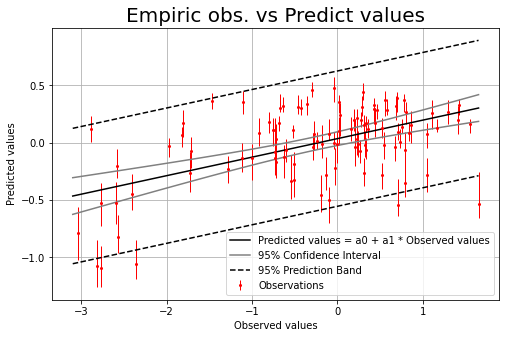

In [26]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-3.1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [27]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [28]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: b_STD: mean - 0.049, median - 0.048, CI - [0.034-0.062]

SHAP-values for: contr_r_STD: mean - 0.13, median - 0.133, CI - [0.108-0.155]

SHAP-values for: corr_r_MIN: mean - 0.067, median - 0.064, CI - [0.049-0.087]

SHAP-values for: corr_r_Q25: mean - 0.084, median - 0.084, CI - [0.067-0.102]

SHAP-values for: mf_chm_MIN: mean - 0.062, median - 0.064, CI - [0.047-0.077]

SHAP-values for: r_MIN: mean - 0.084, median - 0.084, CI - [0.059-0.108]



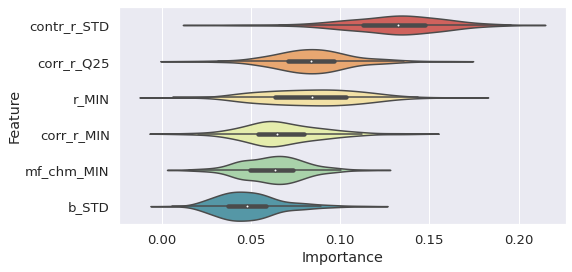

In [30]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['contr_r_STD', 'corr_r_Q25', 'r_MIN', 'corr_r_MIN', 'mf_chm_MIN', 'b_STD'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [31]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [32]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 54.385, median: 58.0,
 pred. interval (P(0.025)-P(0.975)): 29.775-58.0, 
 conf. interval (p-value=0.95): 54.388-58.0 
***
Aggregate bias statistic: 
 mean: 0.26, median: 0.222,
 pred. interval (P(0.025)-P(0.975)): -0.075-0.641, 
 conf. interval (p-value=0.95): 0.086-0.464 
***
Aggregate RMSE statistic: 
 mean: 0.995, median: 0.996, pred. interval (P(0.025)-P(0.975)): 0.673-1.298, 
 conf. interval (p-value=0.95): 0.842-1.137 
***
Aggregate MSE statistic: 
 mean: 1.016, median: 0.993, pred. interval (P(0.025)-P(0.975)): 0.453-1.684, 
 conf. interval (p-value=0.95): 0.711-1.294 
***
Aggregate R^2 statistic: 
 mean: 0.13, median: 0.144, pred. interval (P(0.025)-P(0.975)): -0.148-0.354, 
 conf. interval (p-value=0.95): 0.016-0.257 
***
Aggregate bias(%) statistic: 
 mean: -73.403, median: -92.069, pred. interval (P(0.025)-P(0.975)): -255.135-242.489, 
 conf. interval (p-value=0.95): -120

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

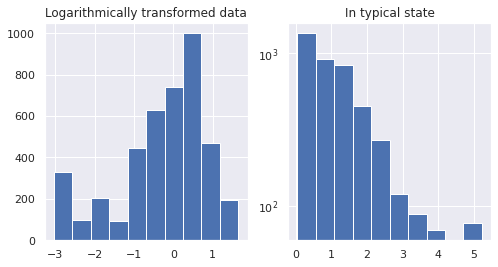

In [33]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [34]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-3, -2, -1, 0, 1, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.5, 1, 2, 3, 5])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

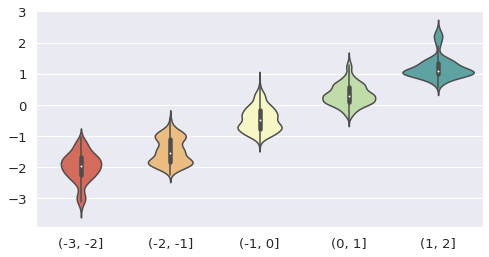

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

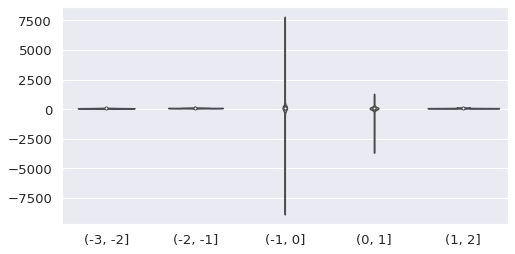

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

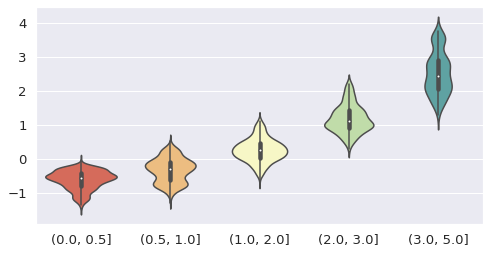

In [37]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

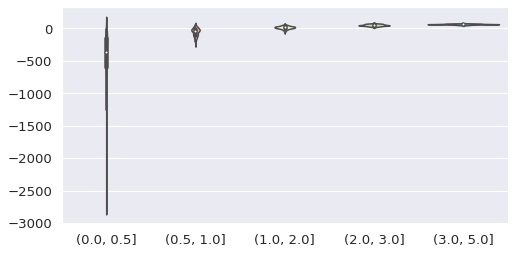

In [38]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.31819
[1]	validation_0-rmse:1.30393
[2]	validation_0-rmse:1.29660
[3]	validation_0-rmse:1.28220
[4]	validation_0-rmse:1.26558
[5]	validation_0-rmse:1.25172
[6]	validation_0-rmse:1.23600
[7]	validation_0-rmse:1.22670
[8]	validation_0-rmse:1.21523


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.20134
[10]	validation_0-rmse:1.18977
[11]	validation_0-rmse:1.17893
[12]	validation_0-rmse:1.16783
[13]	validation_0-rmse:1.15225
[14]	validation_0-rmse:1.13888
[15]	validation_0-rmse:1.12660
[16]	validation_0-rmse:1.11986
[17]	validation_0-rmse:1.11163
[18]	validation_0-rmse:1.10361
[19]	validation_0-rmse:1.09282
[20]	validation_0-rmse:1.08262
[21]	validation_0-rmse:1.07319
[22]	validation_0-rmse:1.06123
[23]	validation_0-rmse:1.05264
[24]	validation_0-rmse:1.04184
[25]	validation_0-rmse:1.03171
[26]	validation_0-rmse:1.02083
[27]	validation_0-rmse:1.01137
[28]	validation_0-rmse:0.99933
[29]	validation_0-rmse:0.98693
[30]	validation_0-rmse:0.98354
[31]	validation_0-rmse:0.97938
[32]	validation_0-rmse:0.97090
[33]	validation_0-rmse:0.96572
[34]	validation_0-rmse:0.95654
[35]	validation_0-rmse:0.94640
[36]	validation_0-rmse:0.93747
[37]	validation_0-rmse:0.93082
[38]	validation_0-rmse:0.92586
[39]	validation_0-rmse:0.92113
[40]	validation_0-rmse:0.91273
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 58


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

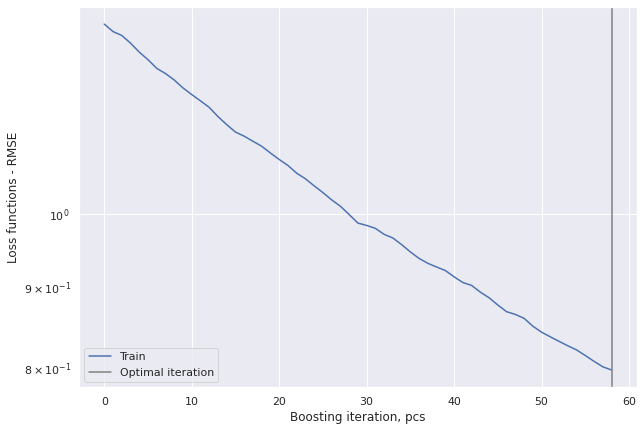

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.2
Relative bias(%):  -85.64
RMSE: 0.8
Relative RMSE(%):  -315.591
MSE: 0.6
R square: 47.4%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.711
Uncertainty
a0: 0.049+/-0.024
a1: 0.336+/-0.021


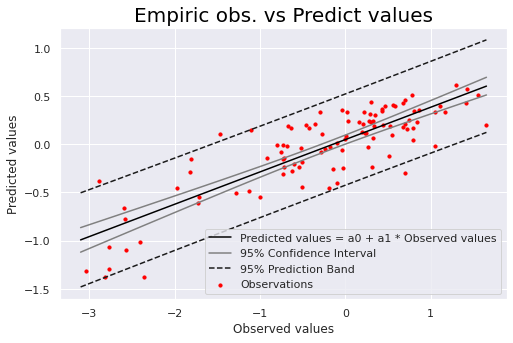

In [48]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3.1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

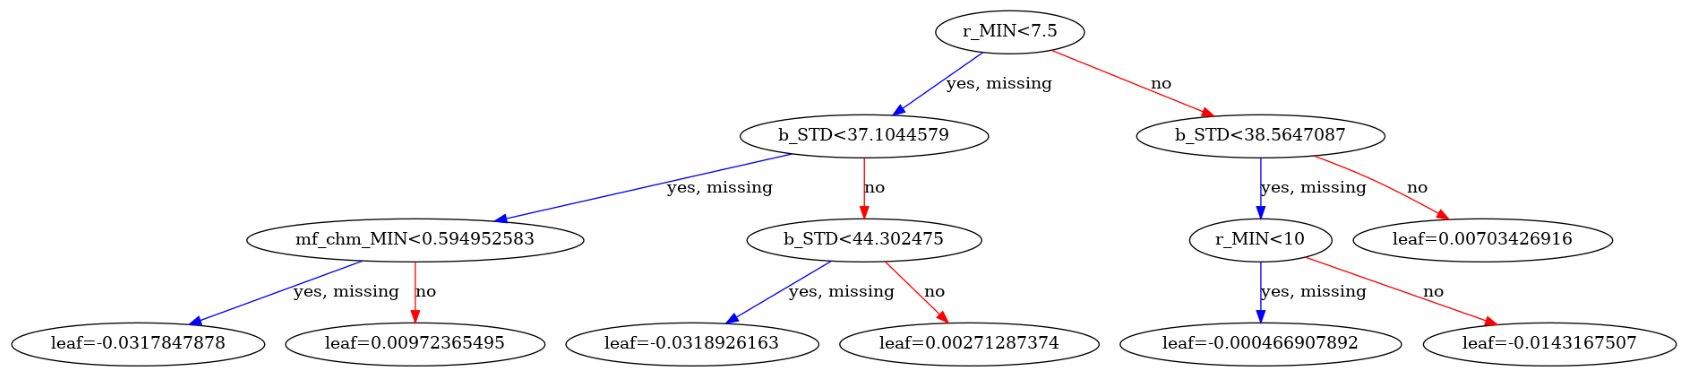

In [50]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

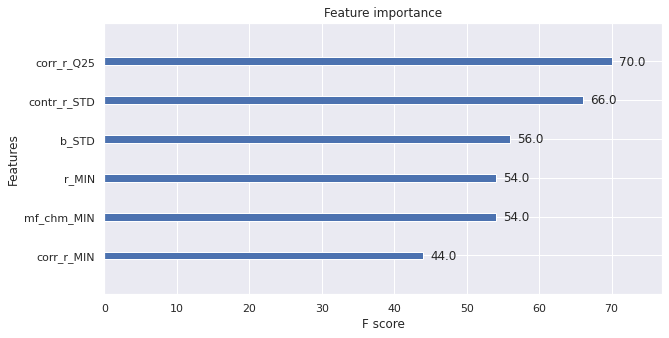

In [52]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

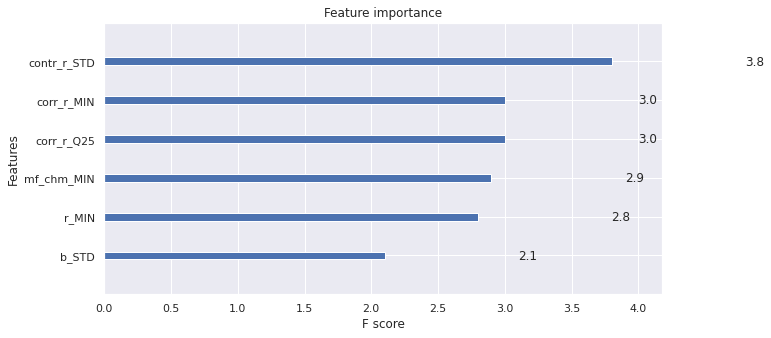

In [53]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

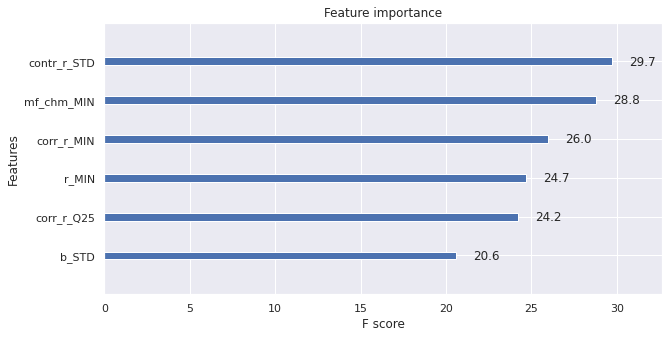

In [54]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [55]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


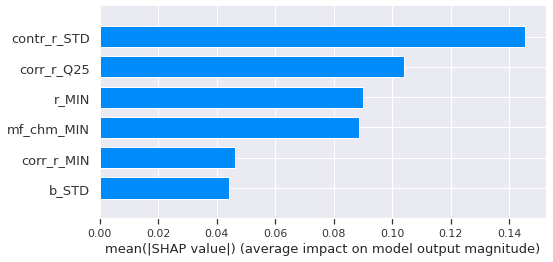

In [56]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

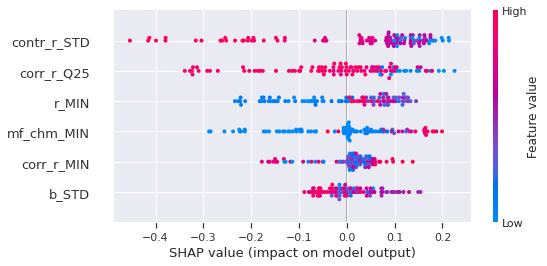

In [57]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

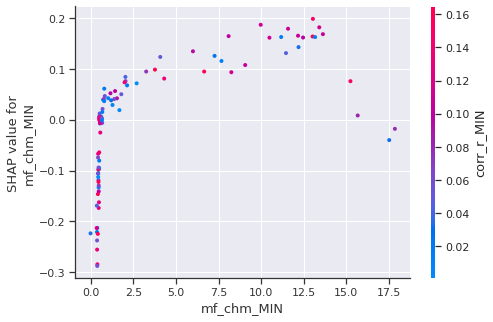

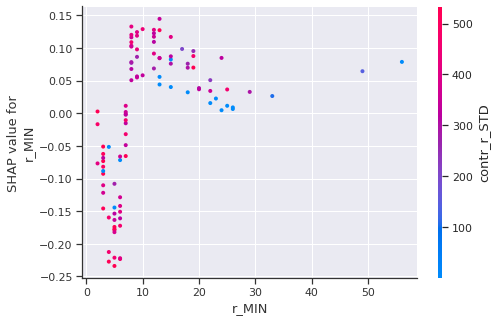

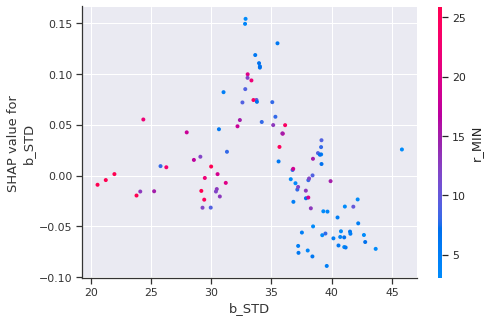

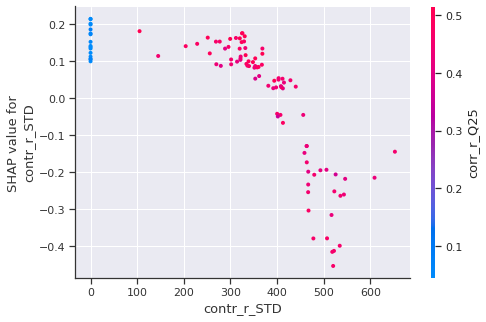

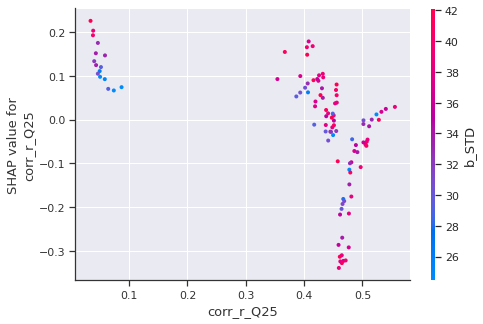

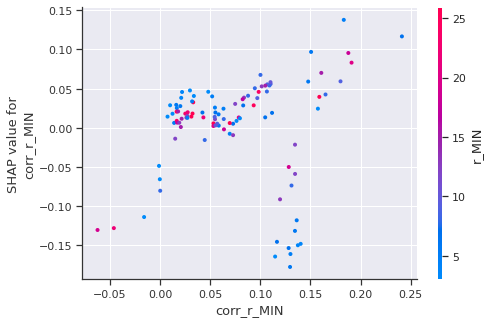

In [58]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [59]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Tag_Cs_vs_CHM_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Tag_Cs_vs_CHM_RGB_XGB_model.txt")